In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

def get_median(a):
    a.sort()
    centerIndex = len(a) // 2 
    if len(a)% 2 == 1:
        return a[centerIndex ]
    return ((a[centerIndex - 1] + a[centerIndex]) / 2)

import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import math

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Main

In [4]:
# #########################################
# ## axis 0.0 ##
# #########################################
day = '230731'

simulation_type = 'MRS'

#simulations = ['1D','2D','3D']
simulations = ['1D']
iteration_num = 5

clone_numbers = ['0', '1']
FP_rates = ['0','0.1']
axis_rates = ['0']
variant_numbers = ['100', '500']
depth_of_coverages = ['125', '30']

# #########################################
# ## axis 0.05, 0.1 ##
# #########################################
# day = '230426'

# simulation_type = 'MRS'

# simulations = ['2D','3D']
# iteration_num = 30

# clone_numbers = ['0', '1']
# FP_rates = ['0.0','0.1']
# axis_rates = ['0.1']
# #########################################

### Supple

In [93]:
#########################################
## axis 0.0 ##
#########################################
# day = '230427'

# simulation_type = 'MRS'

# simulations = ['1D','2D','3D']
# iteration_num = 30

# clone_numbers = ['0', '1']
# # FP_rates = ['0.0','0.05','0.1']
# FP_rates = ['0.0','0.05', '0.1']
# axis_rates = ['0.0']

#########################################
## axis 0.05, 0.1 ##
#########################################
# day = '230427'

# simulation_type = 'MRS'

# simulations = ['2D','3D']
# iteration_num = 30

# clone_numbers = ['0', '1']
# FP_rates = ['0.0','0.05', '0.1']
# axis_rates = ['0.05','0.1']
#########################################

In [5]:
def MS_benchmarking(tool, clone_number, _color, simulation_type, simulations, FP_rate, axis_rate, iteration_num, variant_number, depth_of_coverage):
    x_axis = []
    y_axis = []
    mean_dic = {}
    
    for simulation in simulations:
        mean_dic[simulation] = []
        input_dir = '/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_' + simulation
        input_dir += '/n' + variant_number + '_' + depth_of_coverage + 'x/parent_' + clone_number + '/fp_' + FP_rate + '/axis_' + axis_rate
        
        MRS_set = [i for i in os.listdir(input_dir) if 'bm' not in i and 'jpg' not in i]
        MRS_set.sort()
        MRS_set.sort(key = lambda x: int(x.rstrip().split('_')[0].rstrip().split('-')[1]))
        MRS_set.sort(key = lambda x: int(x.rstrip().split('_')[0].rstrip().split('-')[0][1:]))
        #############################################################################################################
        error = 0

        median_value_list = []
        for sample in MRS_set:
            for_median_value = []
            for iteration in range(0,iteration_num):
                if os.path.isfile(input_dir + '/'+ sample + '/' + str(iteration)+ '/'+tool+'.results.txt'):
                    f = open(input_dir + '/' + sample + '/' + str(iteration)+ '/'+tool+'.results.txt','r')
                    for fline in f:
                        if fline.startswith('score'):
                            score = float(fline.rstrip().split('\t')[1].rstrip().split('/')[0])
                            for_median_value.append(score)
                    f.close()
                else:
                    print('ERROR ==>','\t',input_dir + '/'+ sample + '/' + str(iteration)+ '/'+tool+'.results.txt')
                    error += 1
            iteration_median_value = get_median(for_median_value)
            median_value_list.append(iteration_median_value)
            
            x_axis.append(simulation)
            y_axis.append(iteration_median_value)
            mean_dic[simulation].append(iteration_median_value)
        fo.write(tool + '\t' + simulation + '\t' + str(sum(median_value_list)/len(median_value_list)) + '\t'+ str(np.std(median_value_list)) + '\n')

    if axis_rate == '0':
        fig = plt.figure(figsize = (25,15))
        if clone_number == '0':
            ax = sns.lineplot(data = mean_dic, x = x_axis, y= y_axis, marker = 's', markersize = 40, color = _color, linewidth = 15, linestyle = 'solid')
        else:
            ax = sns.lineplot(data = mean_dic, x = x_axis, y= y_axis, marker = '^', markersize = 50, color = _color, linewidth = 15, linestyle = 'dotted')
        plt.tick_params(axis = 'x', labelsize = 15)
        plt.tick_params(axis = 'y', labelsize = 15)
        ax.set_xlabel('clone', fontsize = 20)
        ax.set_ylabel('membership score', fontsize = 20)
        ax.set_title(tool, fontsize=30)
        if variant_number == '100':
            sc = ax.set_ylim(0, 100)
        else:
            sc = ax.set_ylim(0, 500)        
        ax.figure.savefig(output_dir +'/pdf/MS.' + tool + '.' + simulation_type + '.' + simulation + '.' + clone_number + '.' + FP_rate + '.' + axis_rate +  '.pdf')
    else:
        fig = plt.figure(figsize = (12,15))
        if clone_number == '0':
            ax = sns.lineplot(data = mean_dic, x = x_axis, y= y_axis, marker = 's', markersize = 40, color = _color, linewidth = 15, linestyle = 'solid')
        else:
            ax = sns.lineplot(data = mean_dic, x = x_axis, y= y_axis, marker = '^', markersize = 50, color = _color, linewidth = 15, linestyle = 'dotted')
        plt.tick_params(axis = 'x', labelsize = 15)
        plt.tick_params(axis = 'y', labelsize = 15)
        ax.set_xlabel('clone', fontsize = 20)
        ax.set_ylabel('membership score', fontsize = 20)
        ax.set_title(tool, fontsize=30)
        if variant_number == '100':
            sc = ax.set_ylim(0, 100)
        else:
            sc = ax.set_ylim(0, 500)
        ax.figure.savefig(output_dir +'/pdf/MS.' + tool + '.' + simulation_type + '.' + simulation + '.' + clone_number + '.' + FP_rate + '.' + axis_rate +  '.pdf')        

In [7]:
def EC_benchmarking(tool, clone_number, _color, simulation_type, simulations, FP_rate, axis_rate, iteration_num, variant_number, depth_of_coverage):
    x_axis = []
    y_axis = []
    mean_dic = {}
    for simulation in simulations:
        mean_dic[simulation[0]] = []
        simulation_y_value = []
        
        input_dir = '/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_' + simulation
        input_dir += '/n' + variant_number + '_' + depth_of_coverage + 'x/parent_' + clone_number + '/fp_' + FP_rate + '/axis_' + axis_rate

        MRS_set = [i for i in os.listdir(input_dir) if 'bm' not in i and 'jpg' not in i]

        MRS_set.sort()
        MRS_set.sort(key = lambda x: int(x.rstrip().split('_')[0].rstrip().split('-')[1]))
        MRS_set.sort(key = lambda x: int(x.rstrip().split('_')[0].rstrip().split('-')[0][1:]))
        #############################################################################################################
        error = 0
        RMSE_Answer = []
        RMSE_Predict = []
        for sample in MRS_set:
            if 'M1' in sample:
                clone_number_answer = 3 + int(clone_number)  ### S0, V1, V2   + parent
            elif 'M2' in sample:
                clone_number_answer = 4 + int(clone_number)  ### S0, V1, V3, V4  + parent
            
            for_median_value = []
            for iteration in range(0,iteration_num):
                if os.path.isfile(input_dir + '/'+ sample + '/' + str(iteration)+ '/'+tool+'.results.txt'):
                    f = open(input_dir + '/' + sample + '/' + str(iteration)+ '/'+tool+'.results.txt','r')
                    for fline in f:
                        if fline.startswith('NUM_CLONE'):
                            number_of_clone = int(fline.rstrip().split('\t')[1])
                            x_axis.append(simulation[0])
                            y_axis.append(number_of_clone)
                            
                            simulation_y_value.append(number_of_clone)
                            mean_dic[simulation[0]].append(number_of_clone)
                            RMSE_Answer.append(clone_number_answer) ### 
                            RMSE_Predict.append(number_of_clone)
                    f.close()
                else:
                    print('ERROR ==>','\t',input_dir + '/'+ sample + '/' + str(iteration)+ '/'+tool+'.results.txt')
                    error += 1
                
        fo.write(tool + '\t' + simulation + '\t' + str(sum(simulation_y_value)/len(simulation_y_value)) + '\t'+ str(np.std(simulation_y_value)) + '\t' +str(mean_squared_error(RMSE_Answer , RMSE_Predict) ** 0.5)+ '\n')
        
    fig = plt.figure(figsize = (15,15))
    if 'M1' in sample:
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 's', markersize = 40, color = _color, linewidth = 10, linestyle = 'solid')
    elif 'M2' in sample:
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = '^', markersize = 50, color = _color, linewidth = 10, linestyle = 'dotted')
    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    ax.set_xlabel('clone', fontsize = 20)
    ax.set_ylabel('estimated clone number', fontsize = 20)
    ax.set_title(tool, fontsize=30)
    sc = ax.set_ylim(2,8)
    ax.figure.savefig(output_dir +'/pdf/EC.' + tool + '.' + simulation_type + '.' + simulation + '.' + clone_number + '.' + FP_rate + '.' + axis_rate +  '.pdf')

### Membership score


  0%|          | 0/2 [00:00<?, ?it/s]

ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M1-5/2/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M1-5/4/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M1-6/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M2-4/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M2-4/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n100_125x/parent_0/fp_0/axis_0/M2-6/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n10


  0%|          | 0/2 [00:01<?, ?it/s]

ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-5_M1-6/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-5_M1-6/4/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-6_M1-7/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-6_M1-7/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-6_M1-8/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n100_30x/parent_0/fp_0/axis_0/M1-6_M1-8/2/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.

IndexError: list index out of range

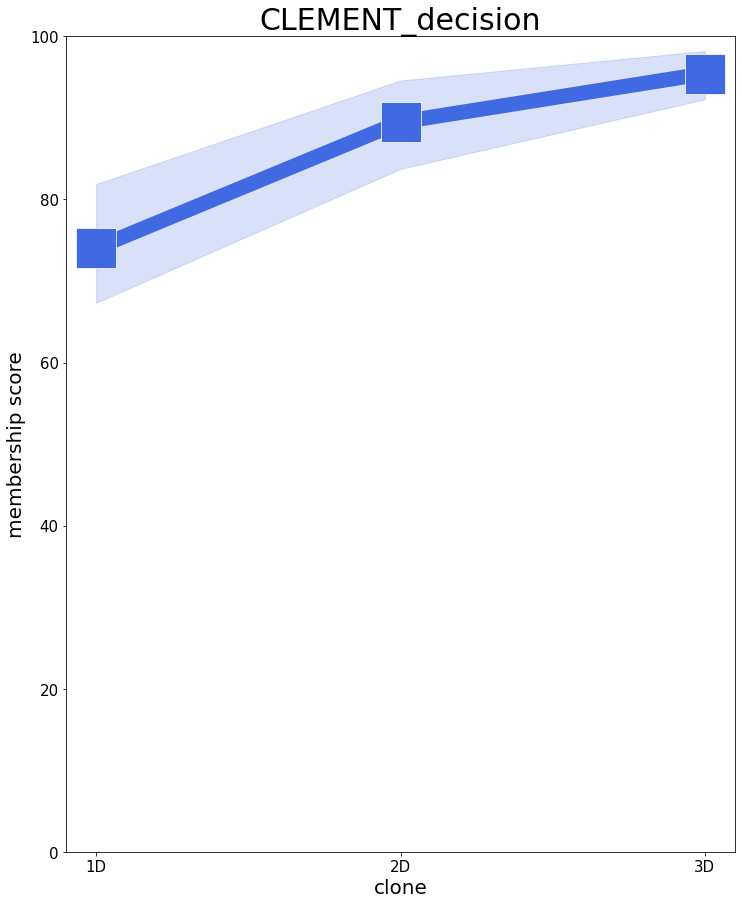

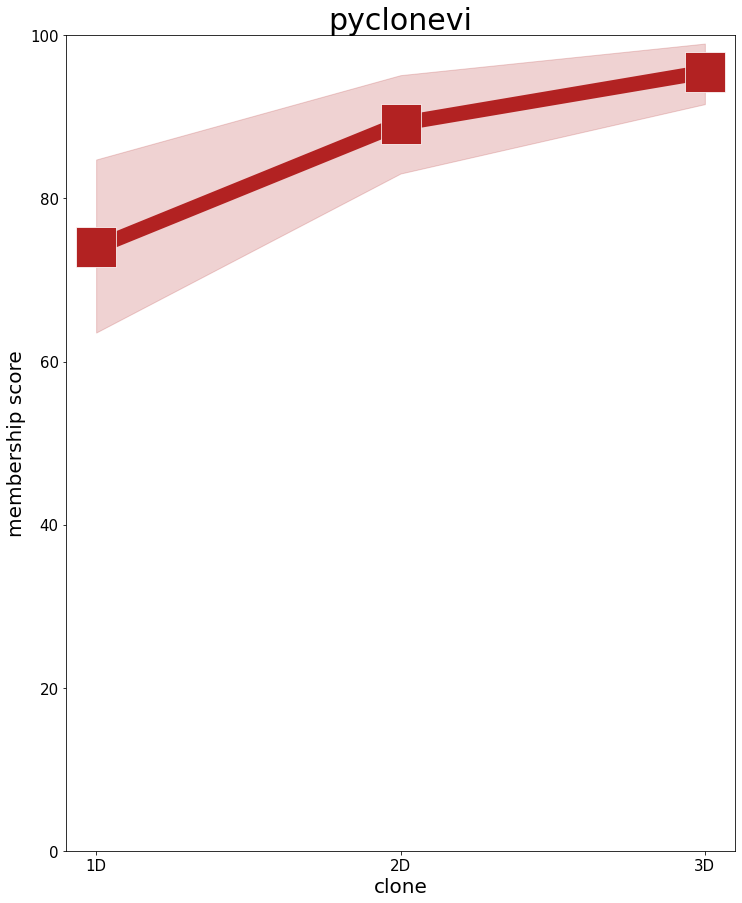

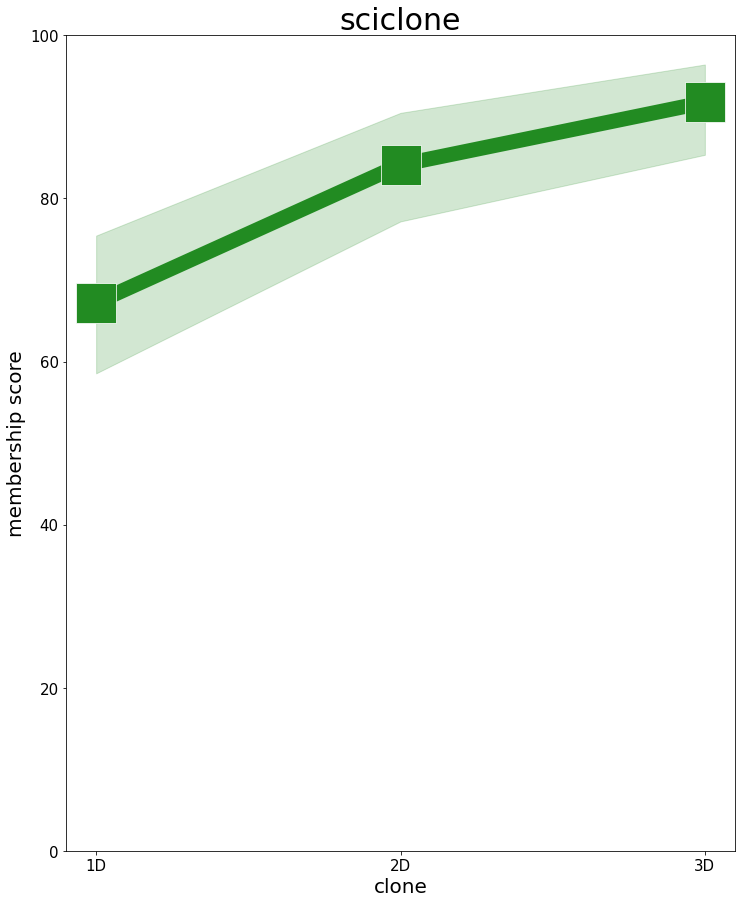

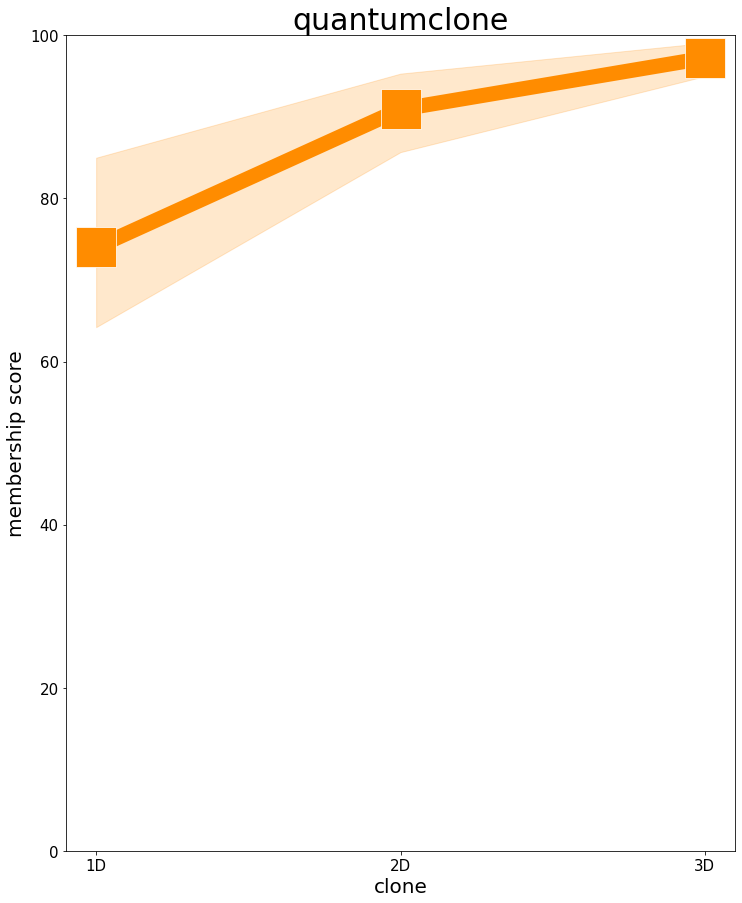

In [11]:
for clone_number in tqdm(clone_numbers):
    for FP_rate in FP_rates:
        for axis_rate in axis_rates:
            for variant_number in variant_numbers:
                for depth_of_coverage in depth_of_coverages:
                    
                    output_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/01.cellData/'+'n'+variant_number+'_'+depth_of_coverage+'x/' + clone_number
                    os.makedirs(output_dir, exist_ok= True)
                    os.makedirs(output_dir + '/pdf', exist_ok= True)

                    fo = open(output_dir + '/MS.'+ simulation_type + '_' + clone_number + '_' + FP_rate + '_' + axis_rate + '.txt','w')
                    fo.write('tool' + '\t' + 'simulation' + '\t' + 'mean of median value' + '\t' + 'standard deviation' + '\n')

                    MS_benchmarking('CLEMENT_decision', clone_number, 'royalblue', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    MS_benchmarking('pyclonevi', clone_number, 'firebrick', simulation_type, simulations, FP_rate,axis_rate, iteration_num, variant_number, depth_of_coverage)
                    MS_benchmarking('sciclone', clone_number, 'forestgreen', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    MS_benchmarking('quantumclone', clone_number, 'darkorange', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)

                    MS_benchmarking(input_dir, 'SIMPLE_KMEANS_elbow', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    MS_benchmarking(input_dir, 'SIMPLE_KMEANS_gap*', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    MS_benchmarking(input_dir, 'SIMPLE_KMEANS_silhouette', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
   
                    fo.close()

### Estimated clone number

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-90-9a9c953cbab6>:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (15,15))
 50%|█████     | 1/2 [00:38<00:38, 38.31s/it]

CLEMENT_decision MRS 2D 1 0.1 0.1 M2-2_M2-4_input 0
pyclonevi MRS 2D 1 0.1 0.1 M2-2_M2-4_input 0
sciclone MRS 2D 1 0.1 0.1 M2-2_M2-4_input 0
quantumclone MRS 2D 1 0.1 0.1 M2-2_M2-4_input 0
quantumclone MRS 3D 1 0.1 0.1 M1-5_M1-7_M1-8_input 17


100%|██████████| 2/2 [00:57<00:00, 28.87s/it]


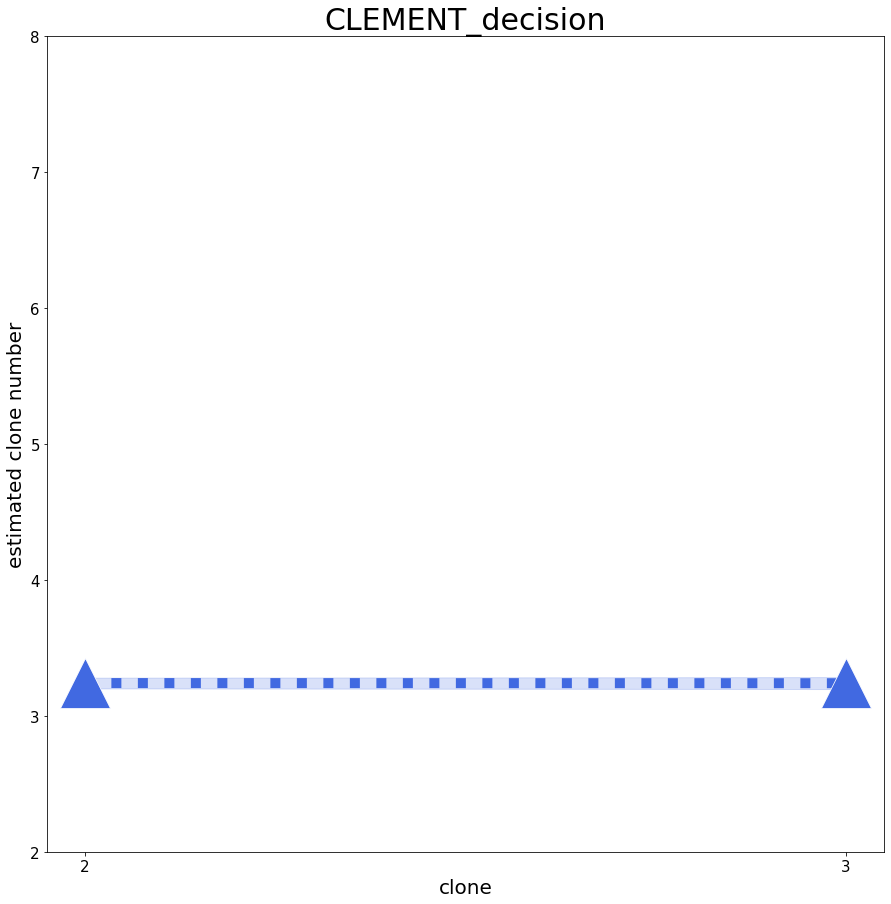

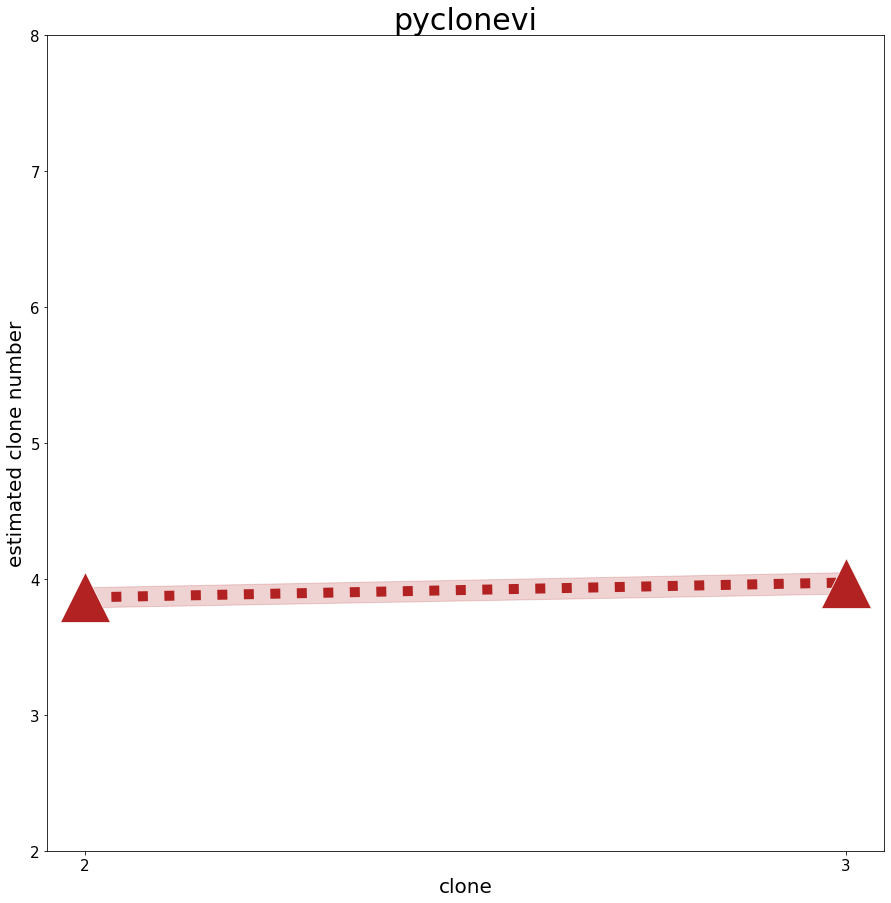

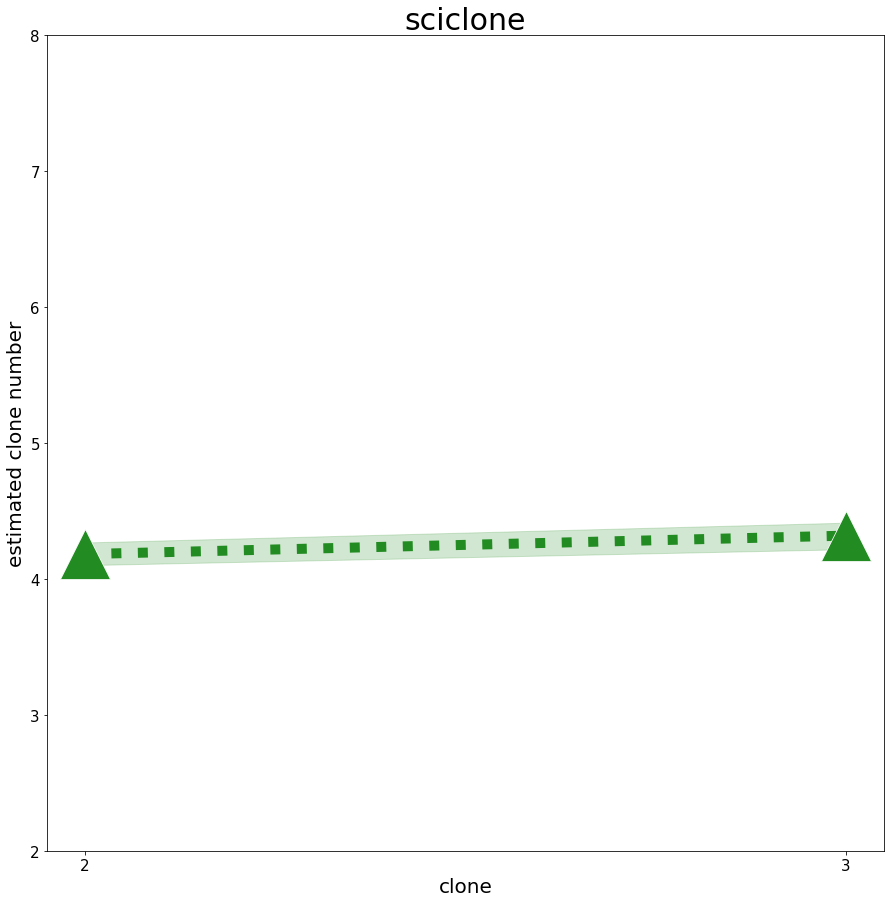

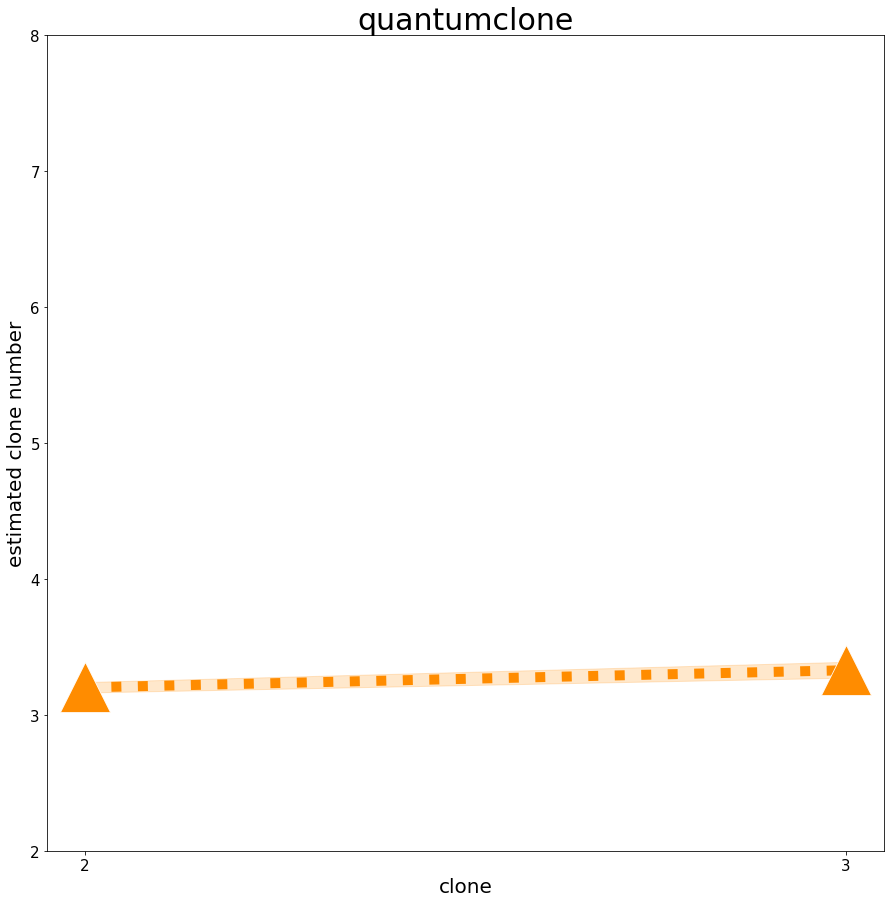

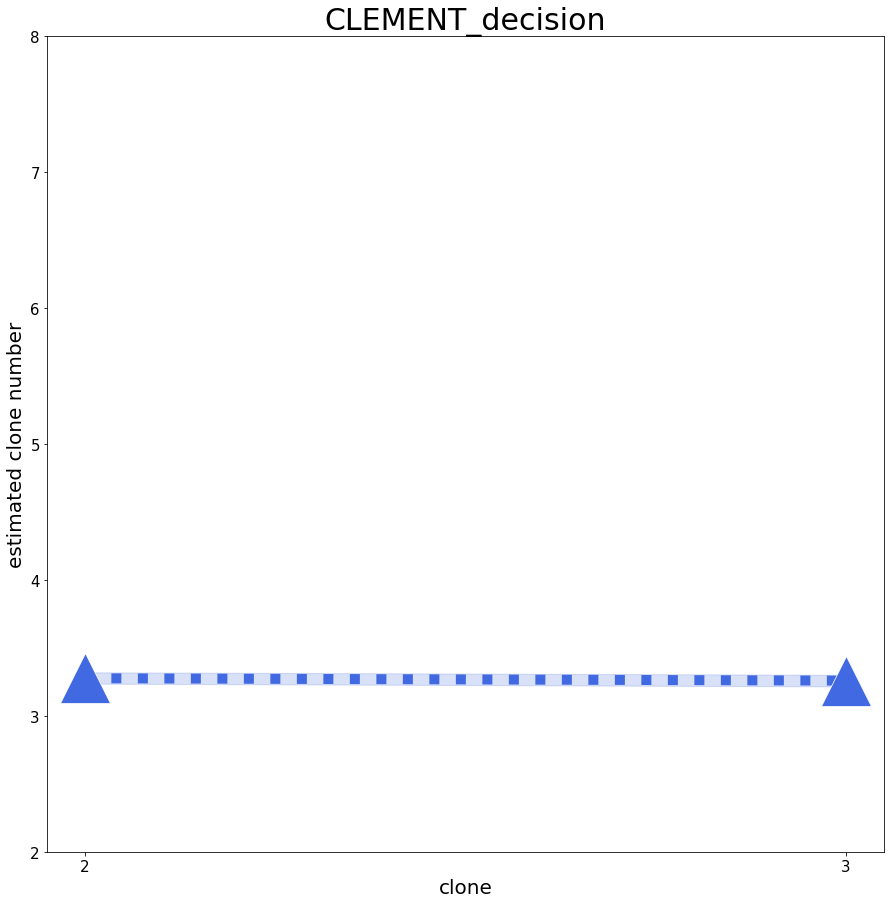

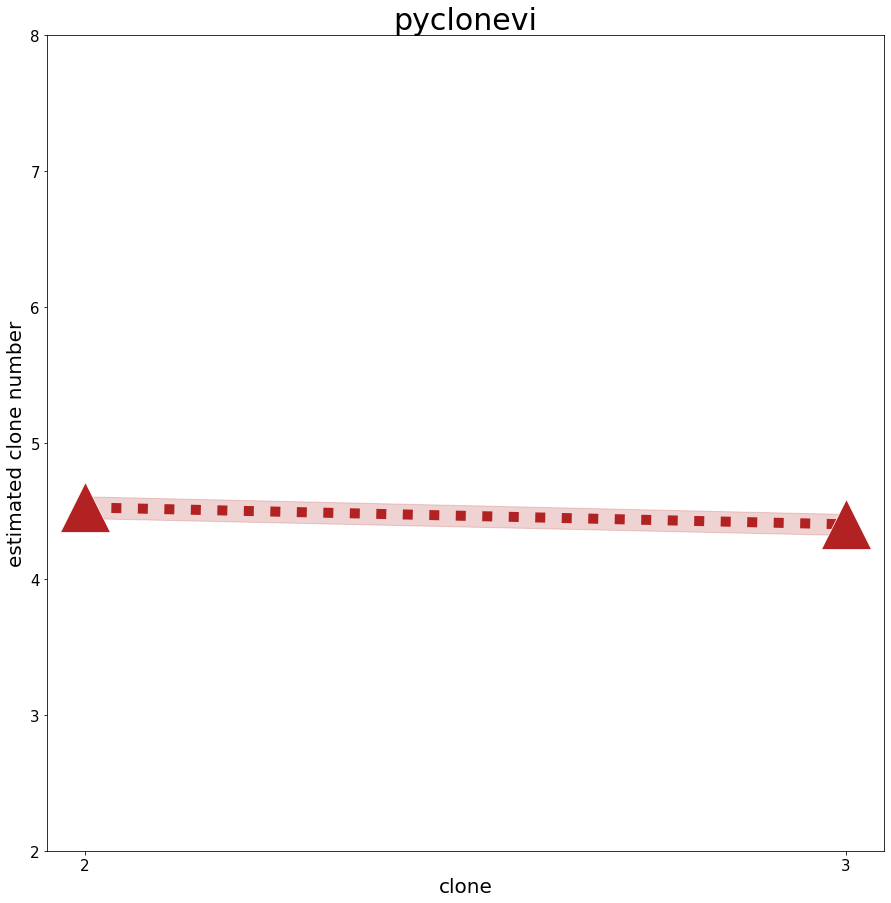

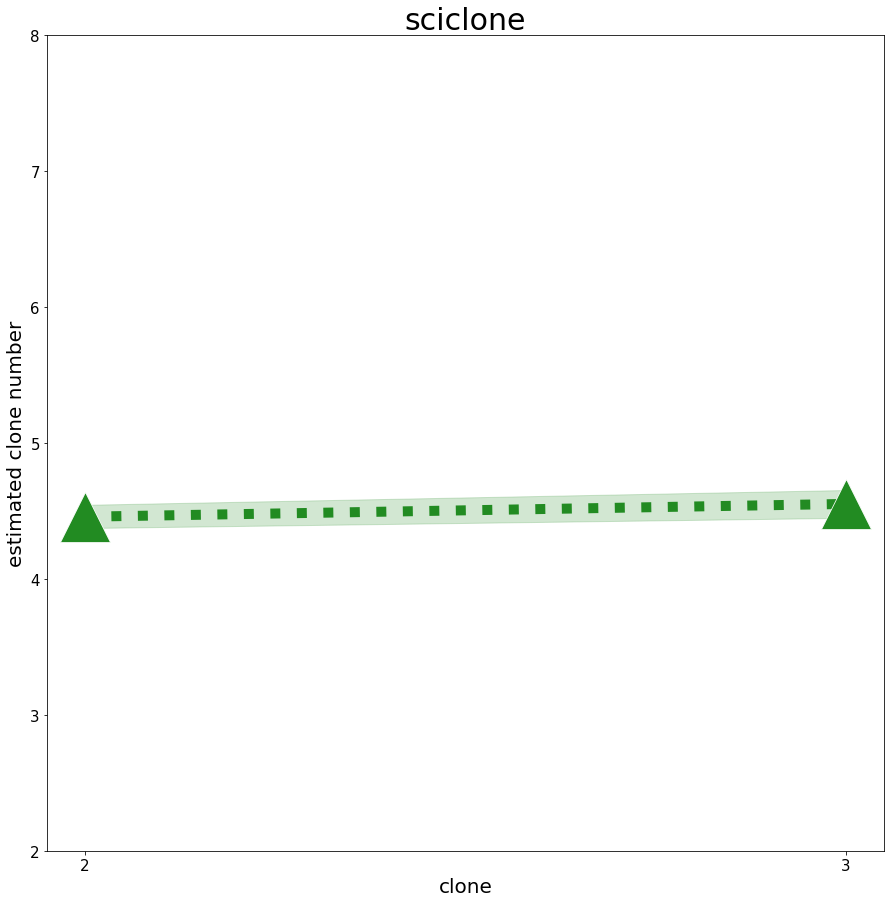

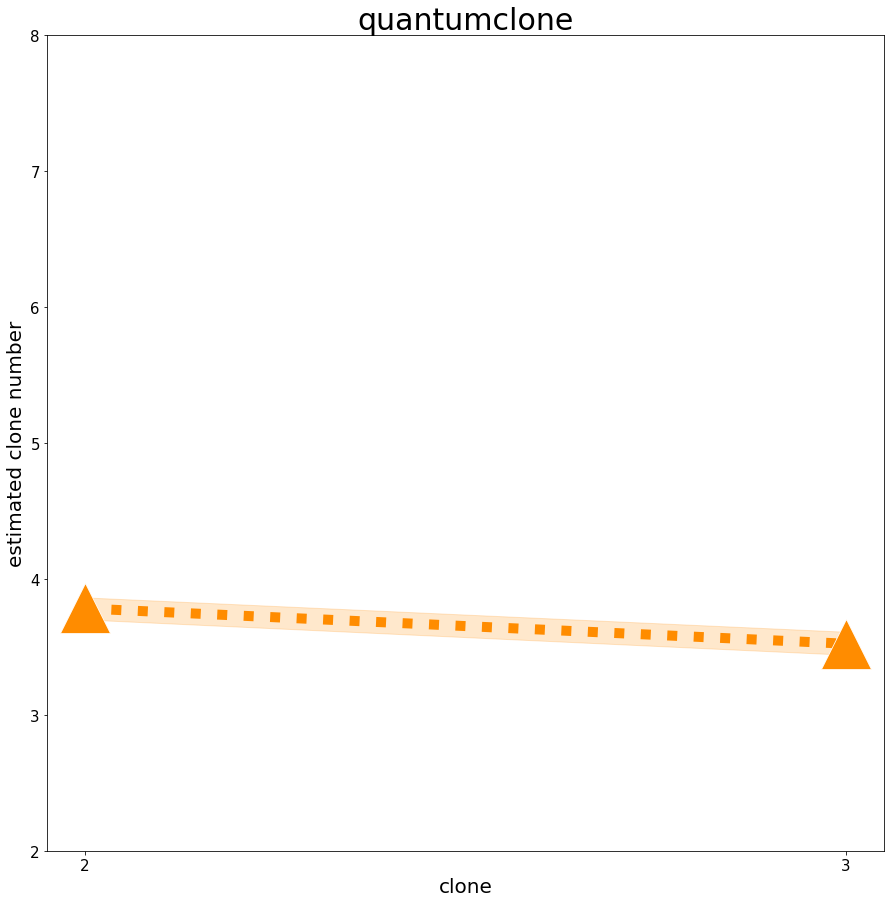

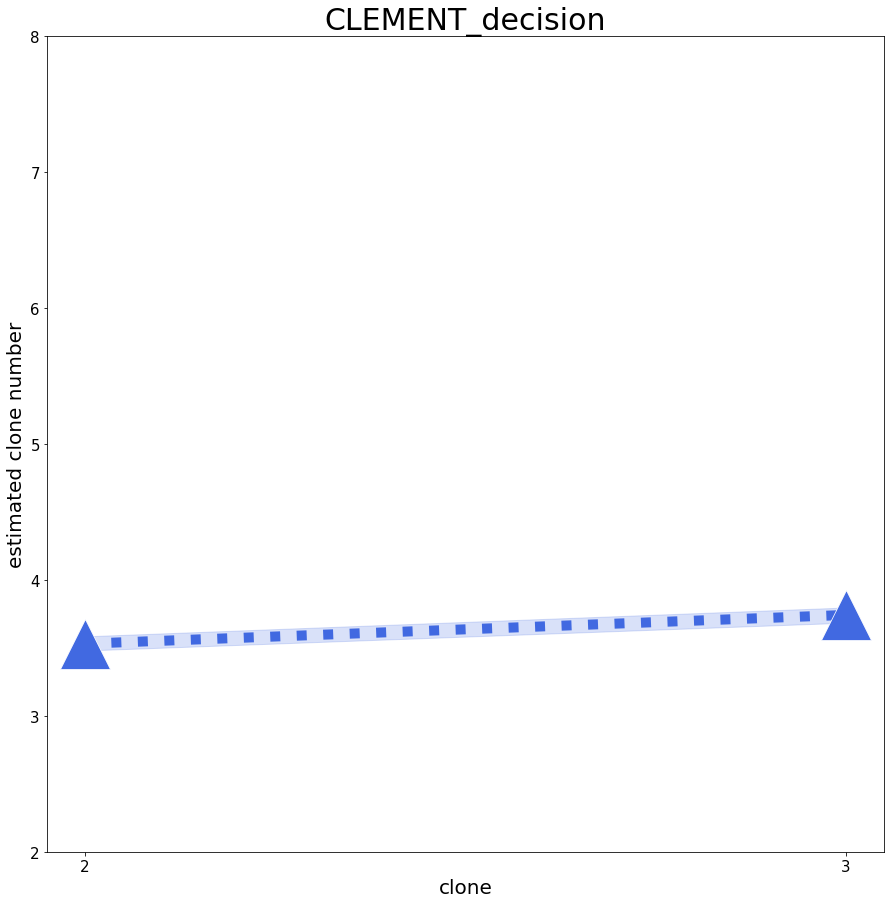

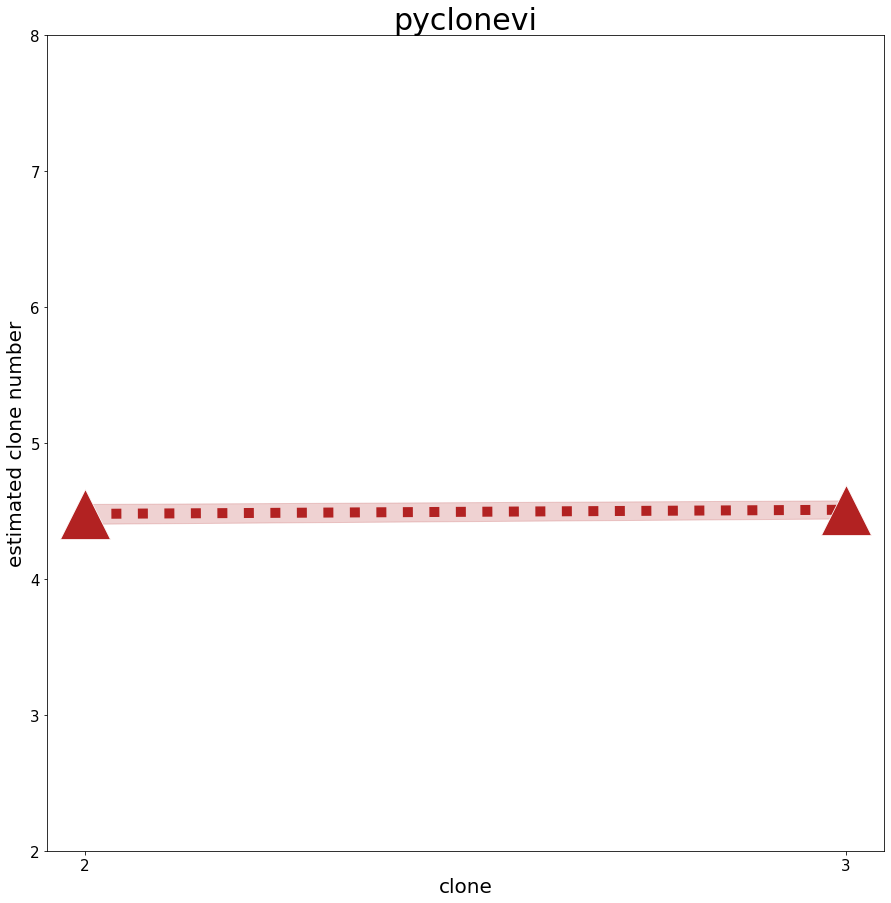

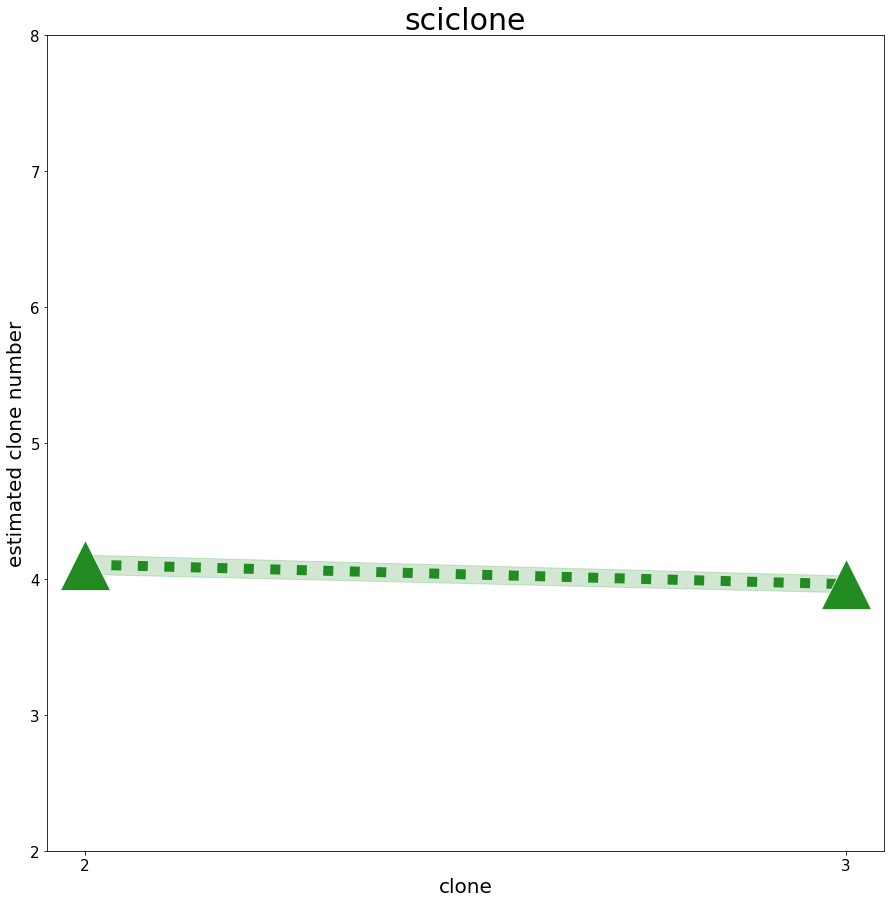

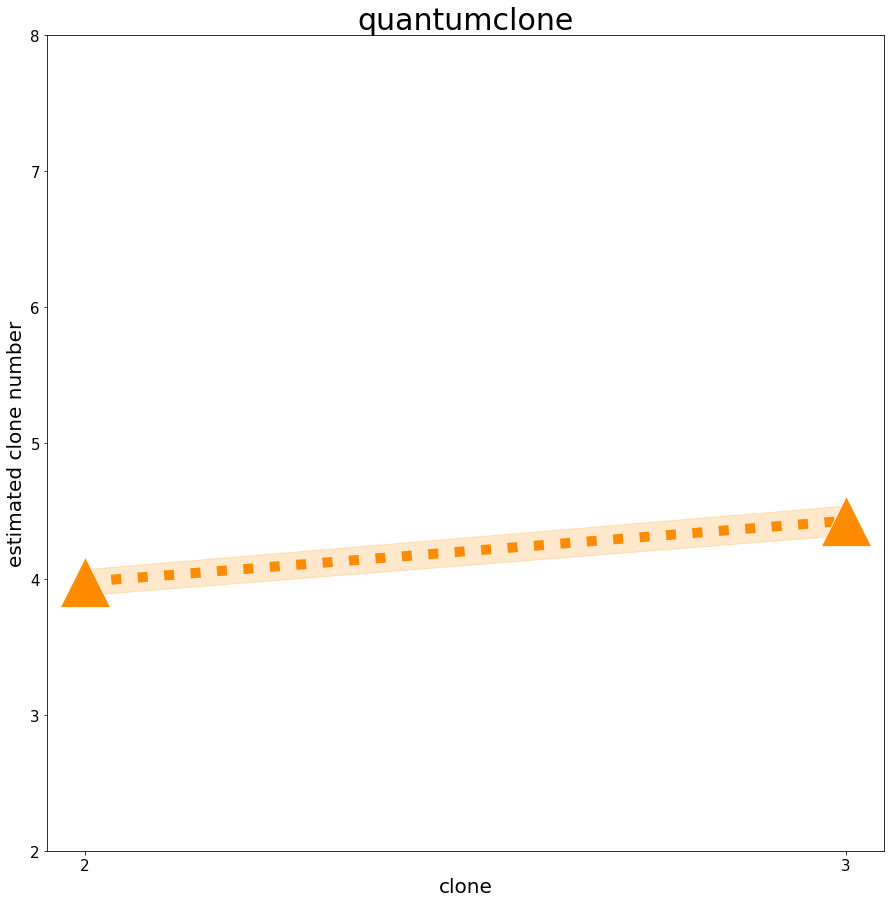

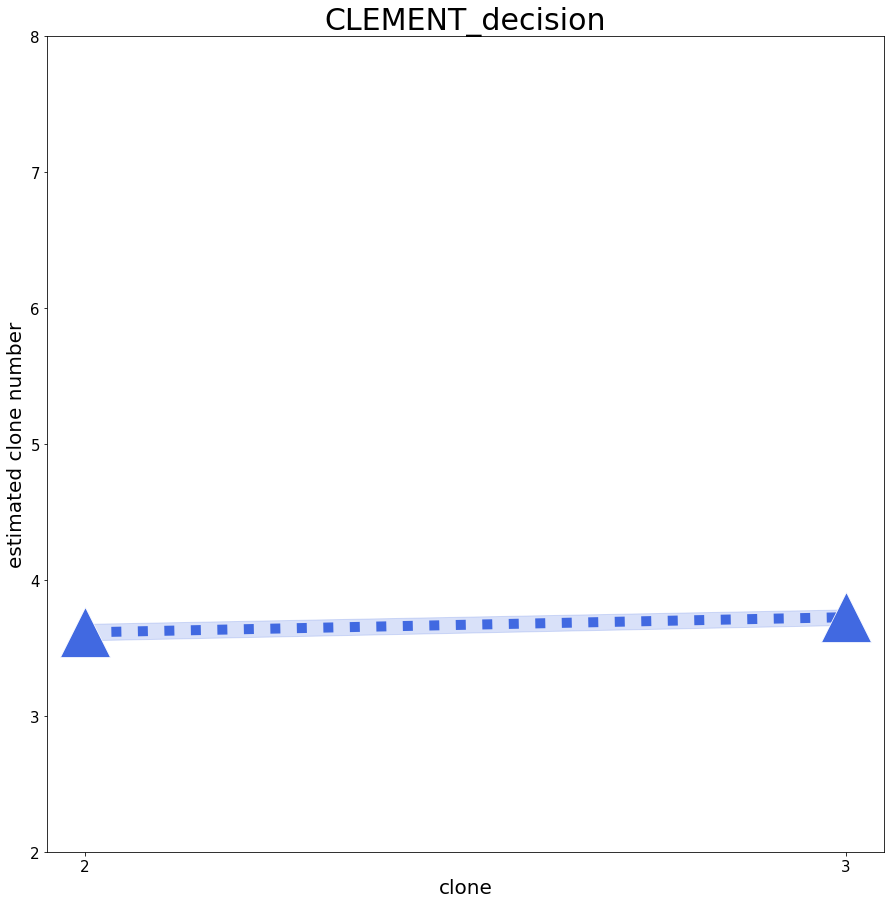

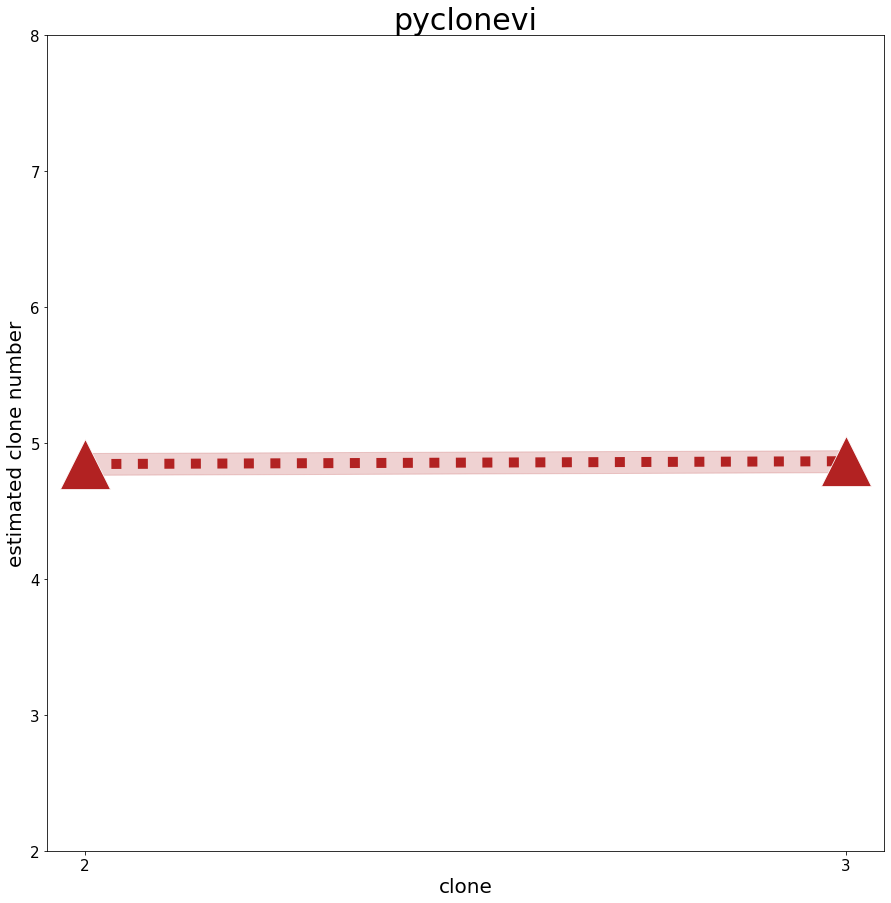

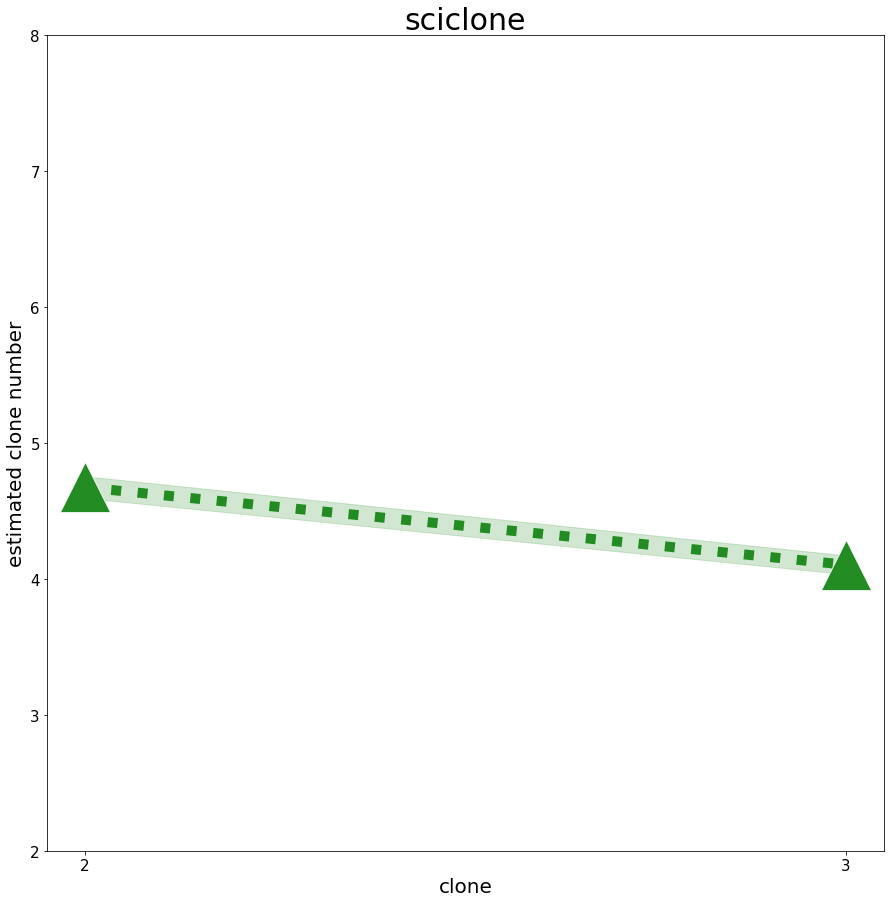

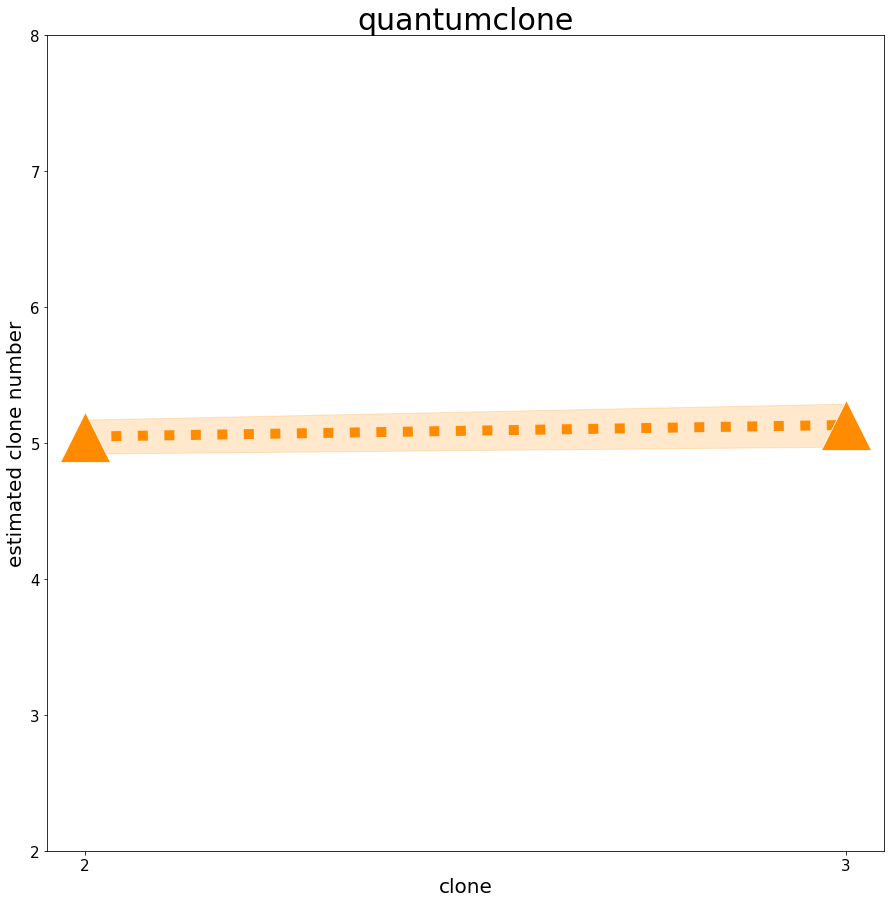

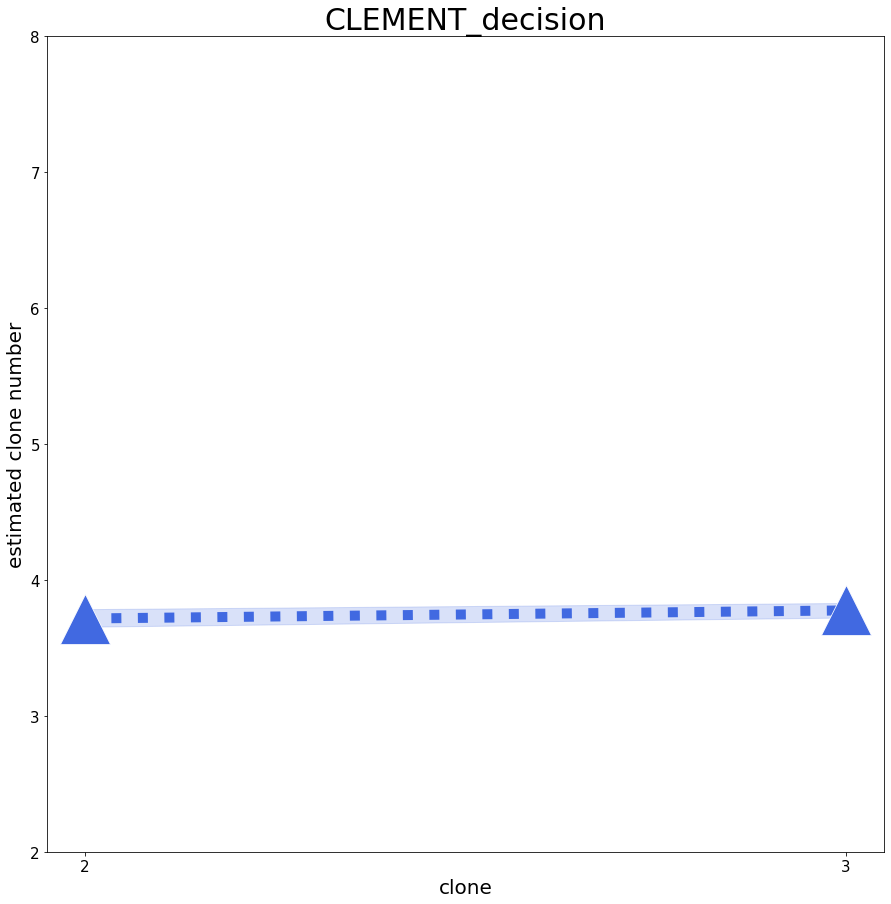

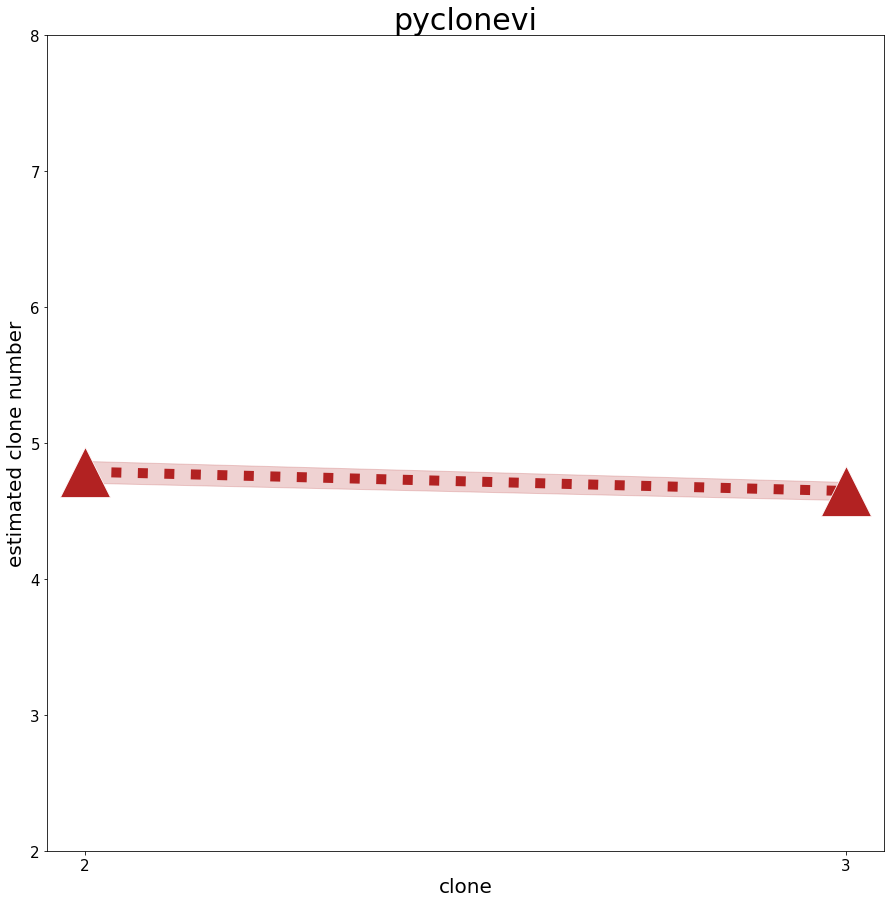

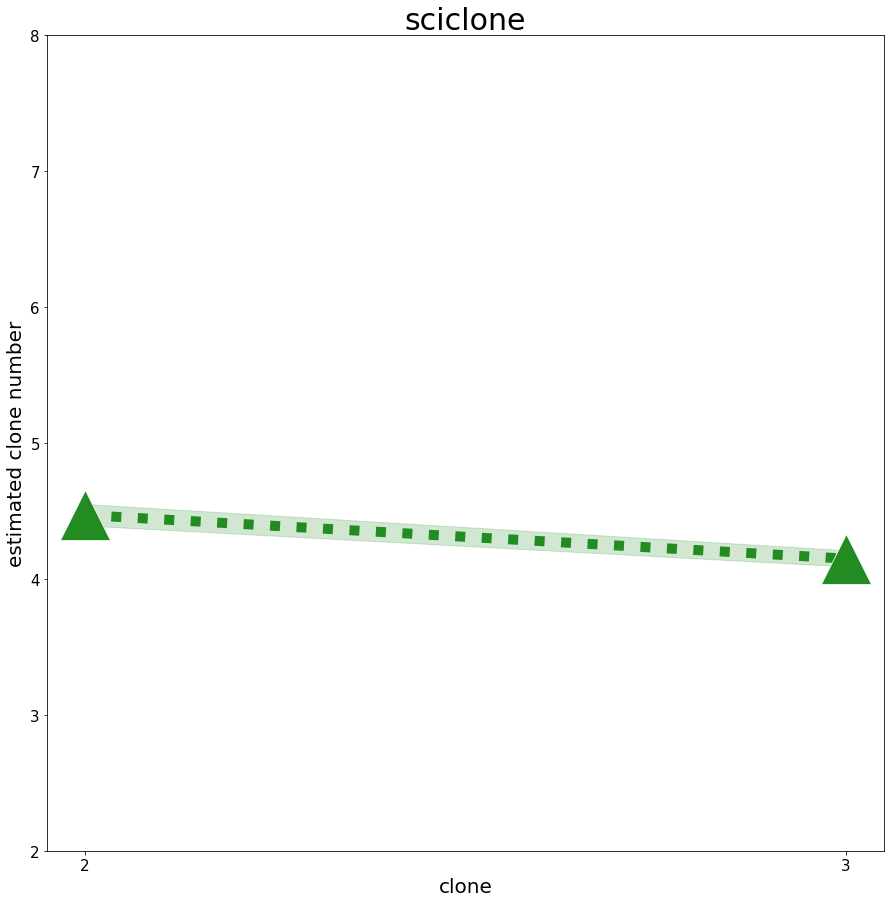

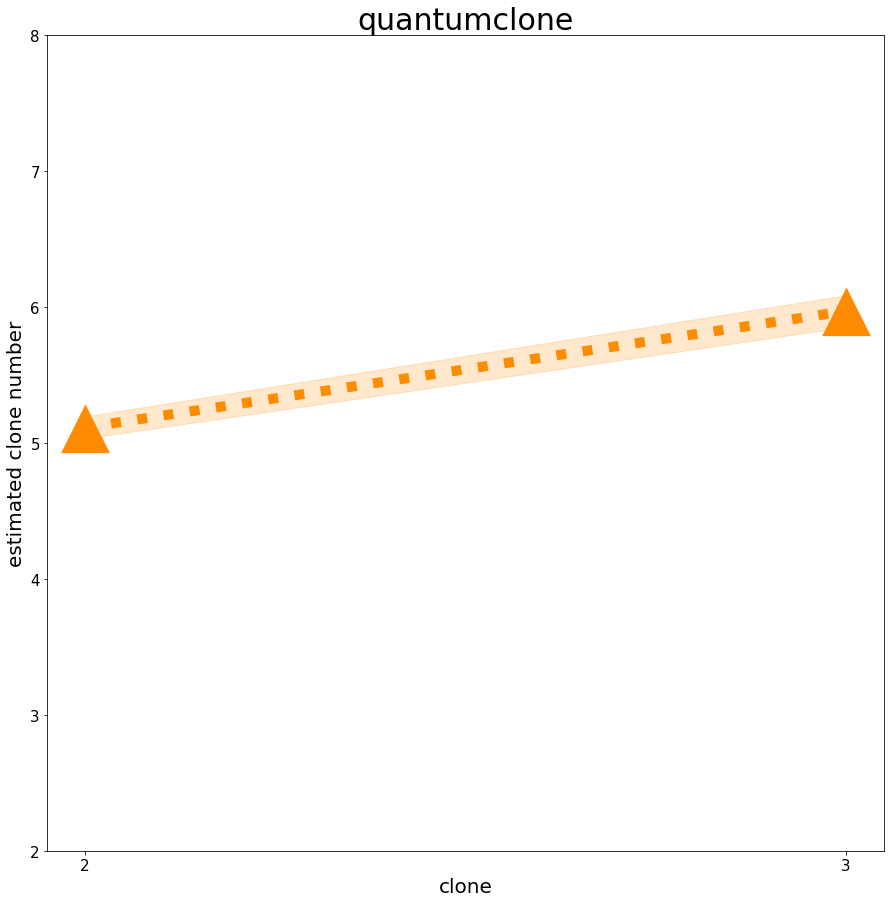

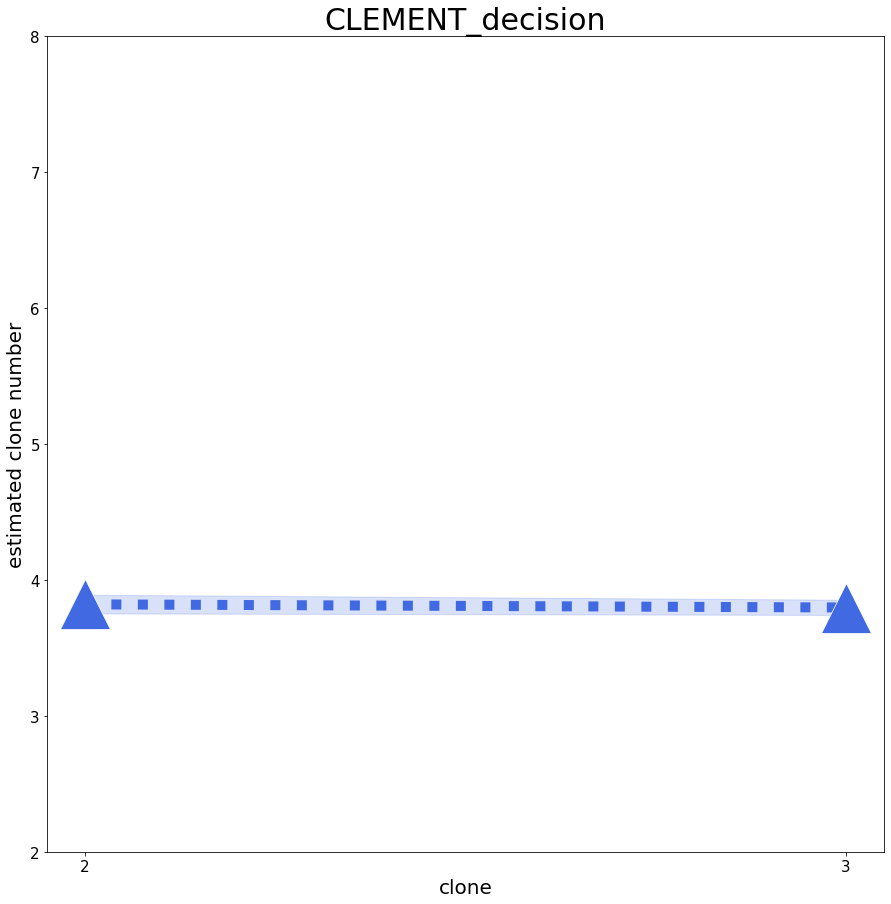

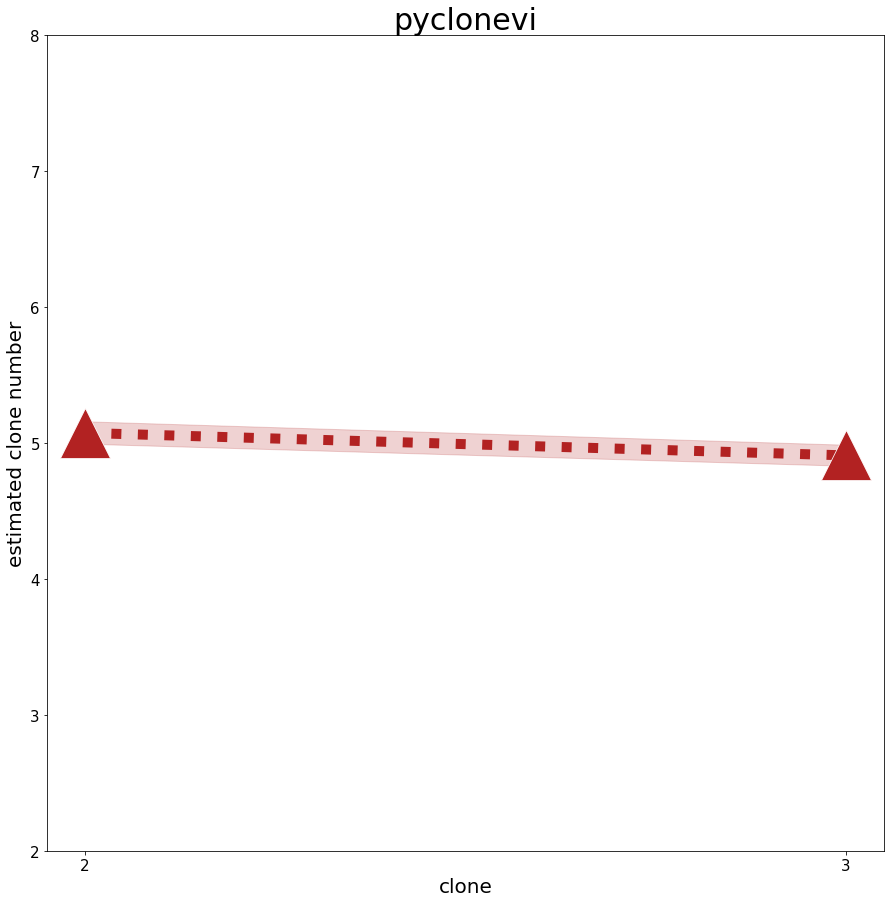

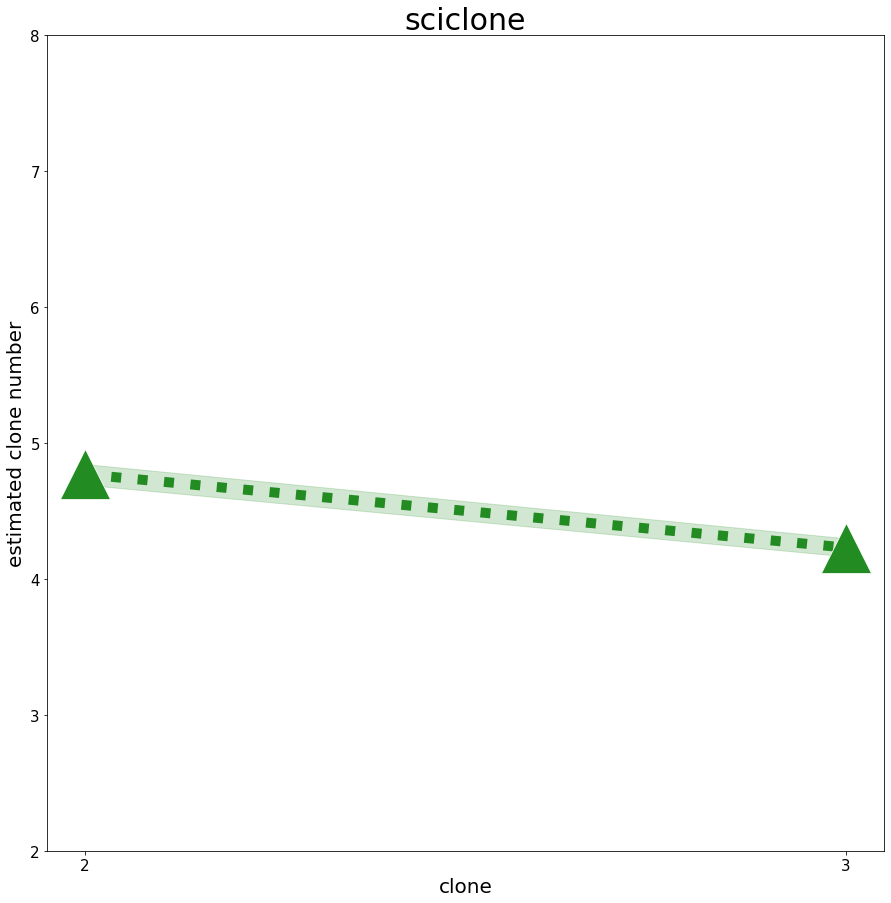

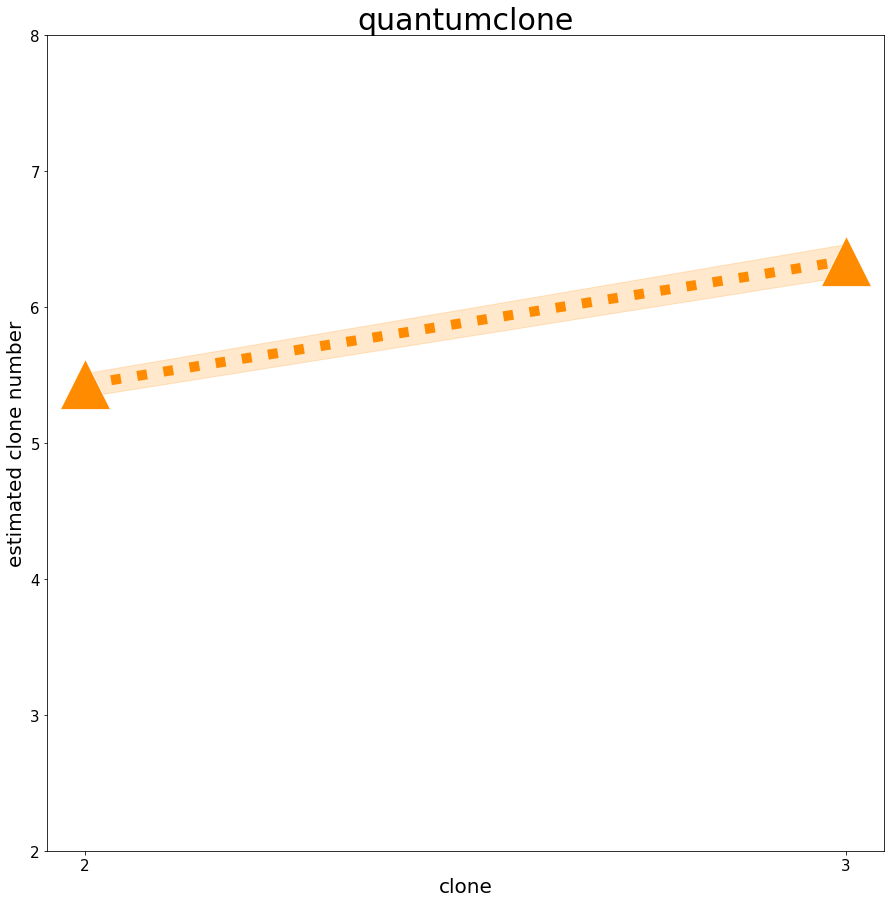

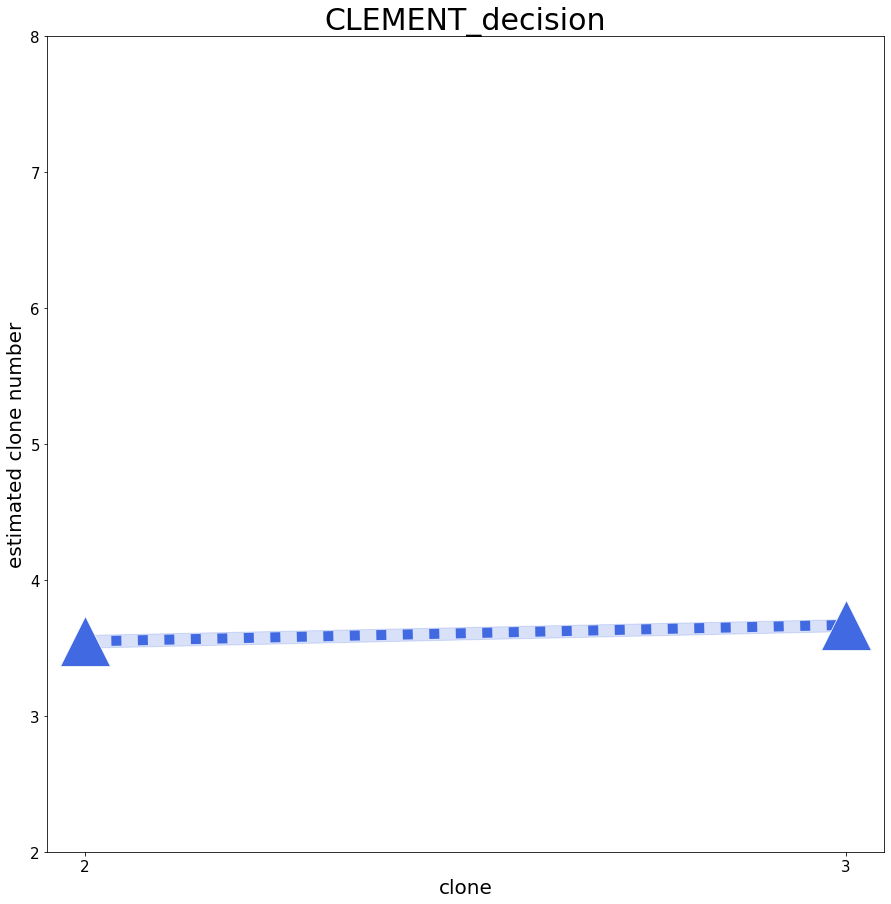

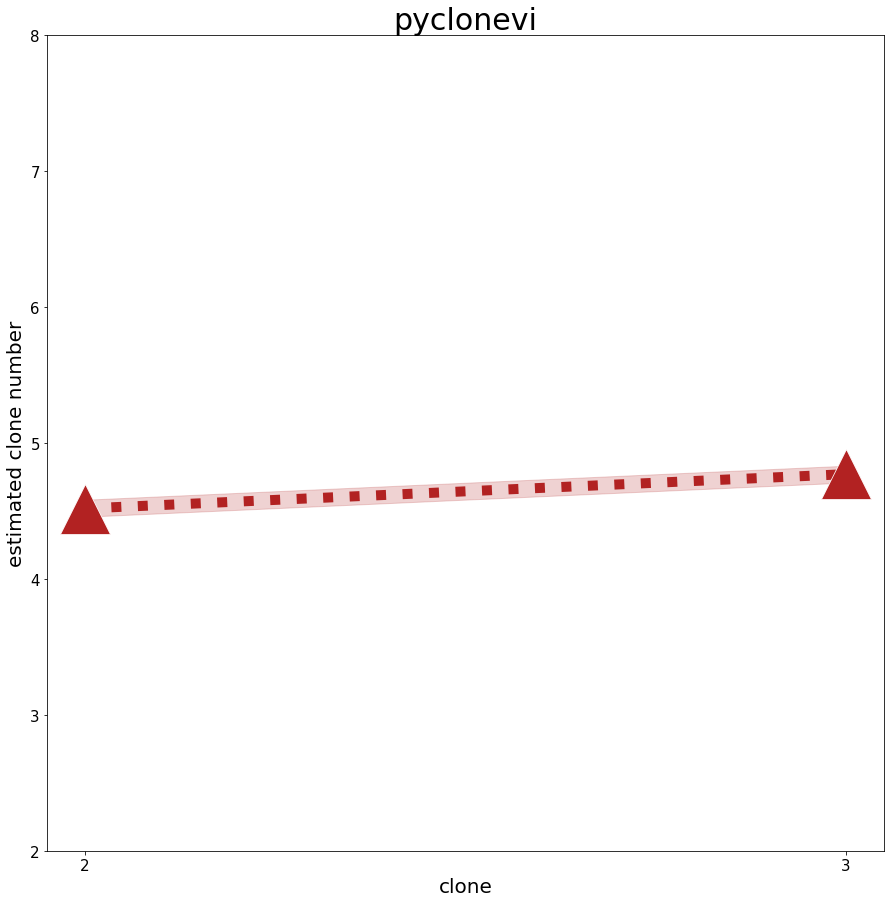

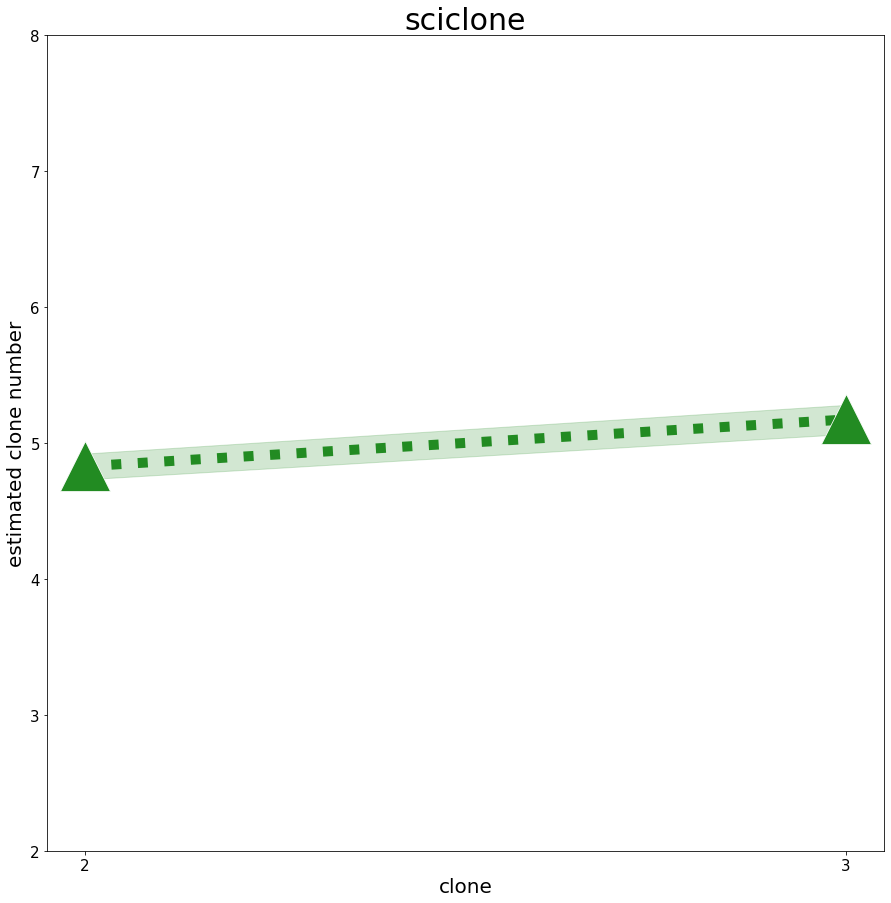

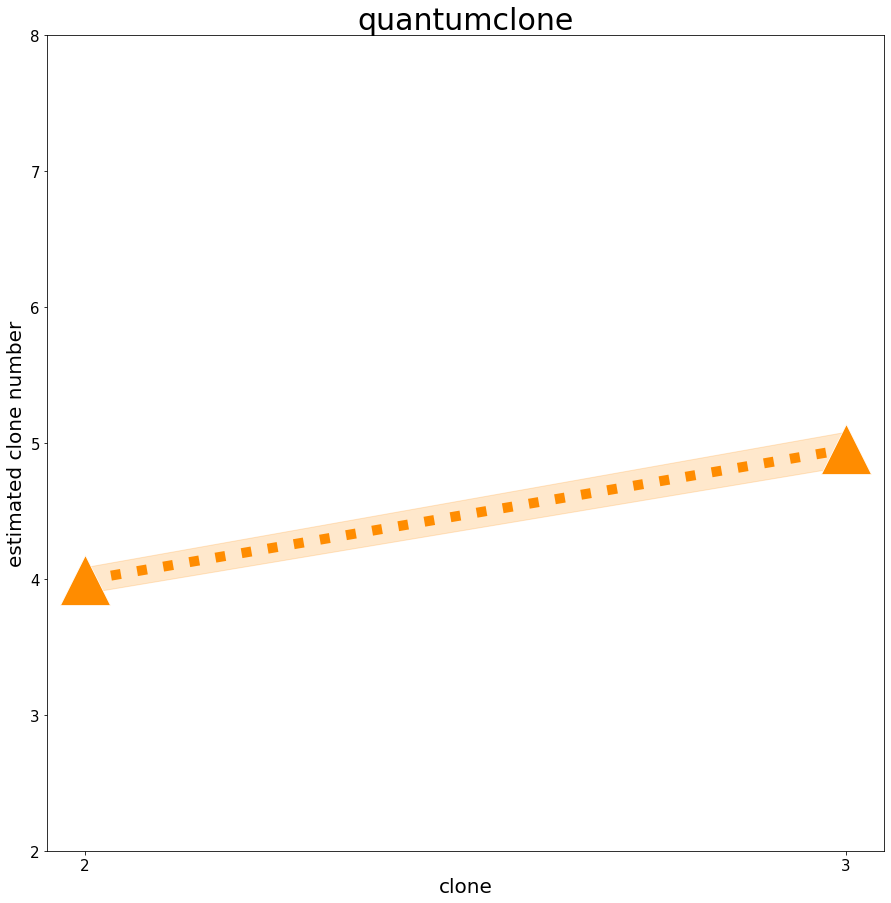

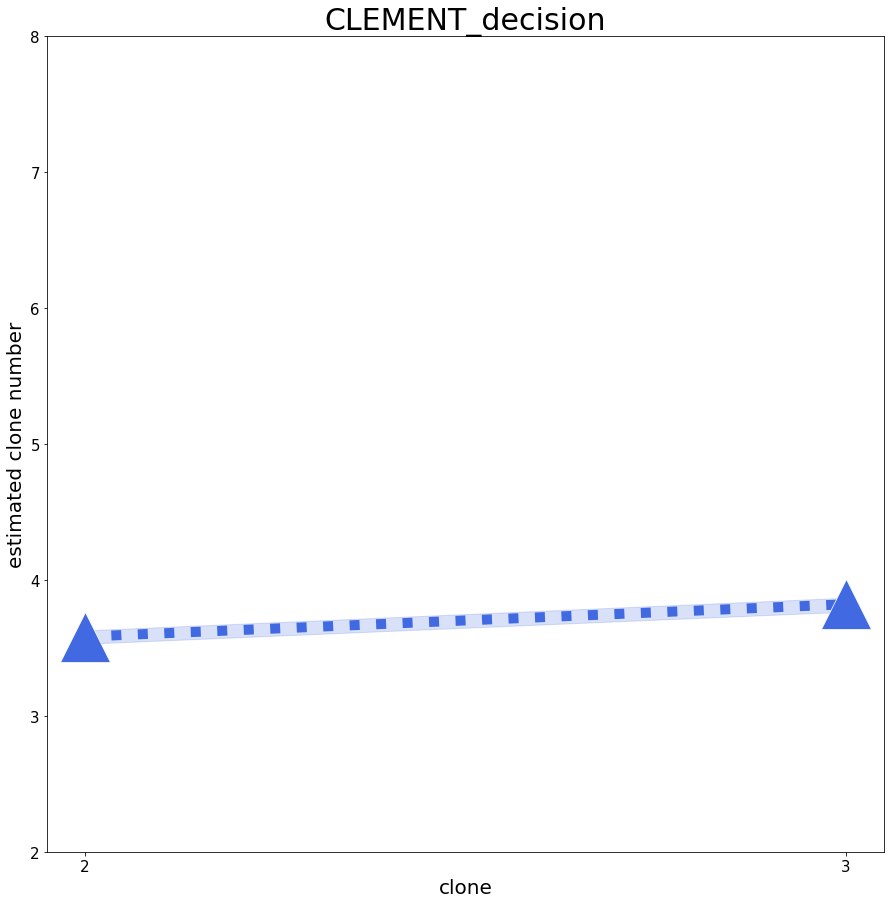

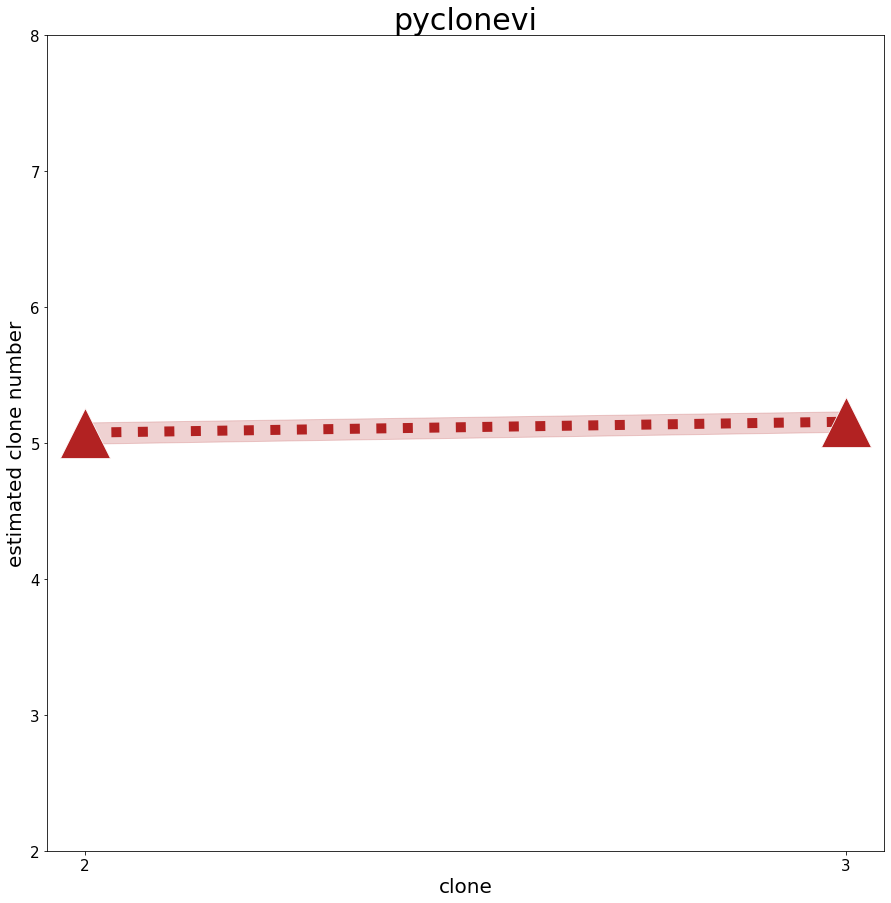

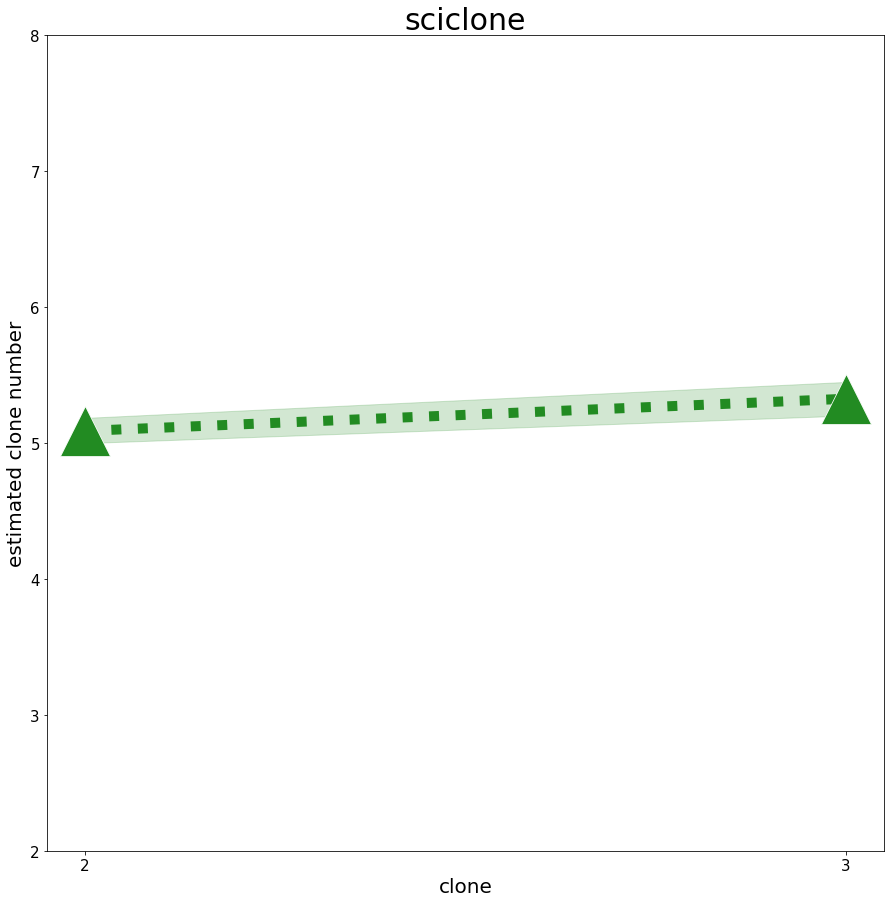

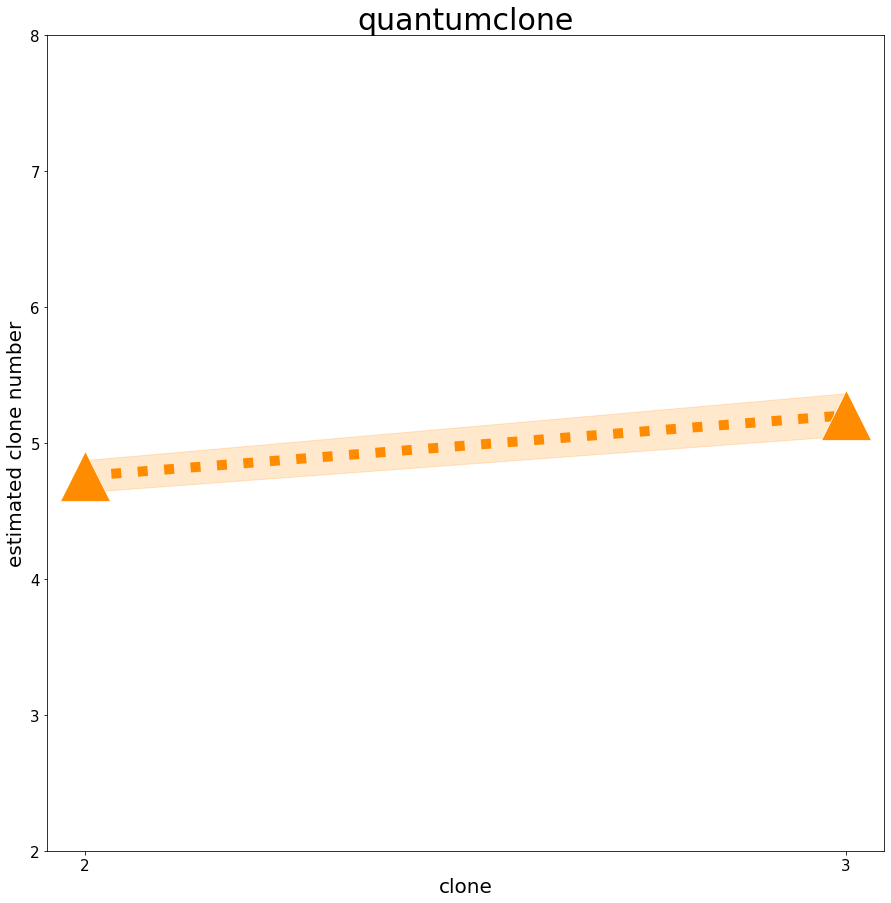

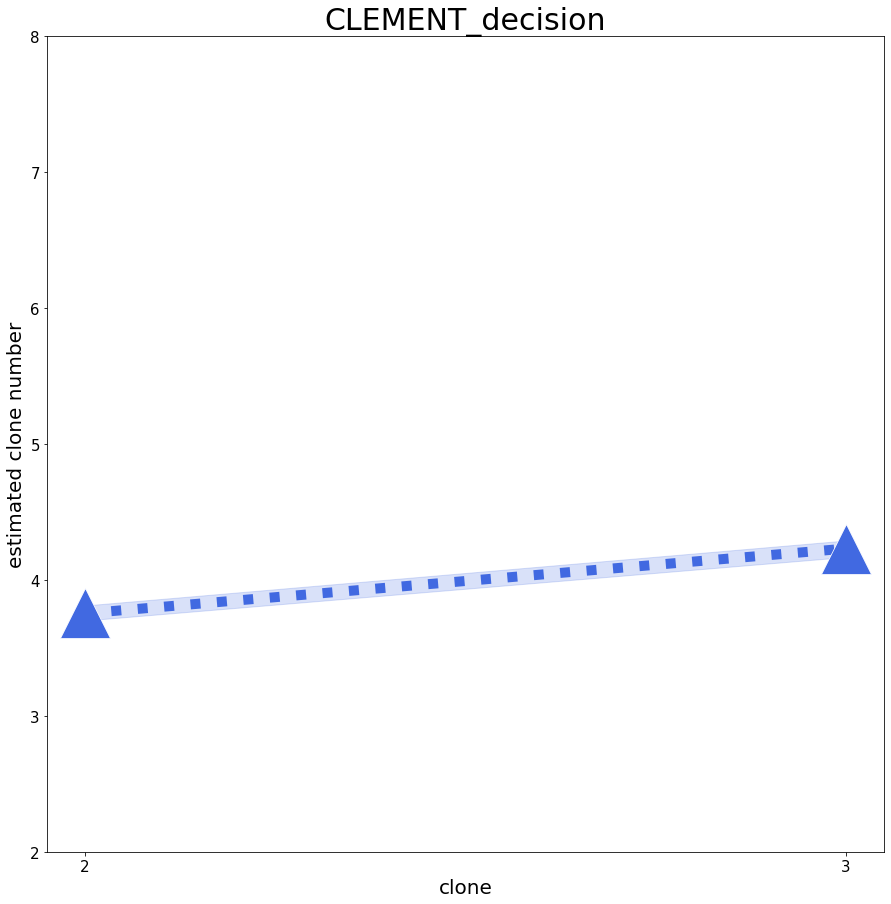

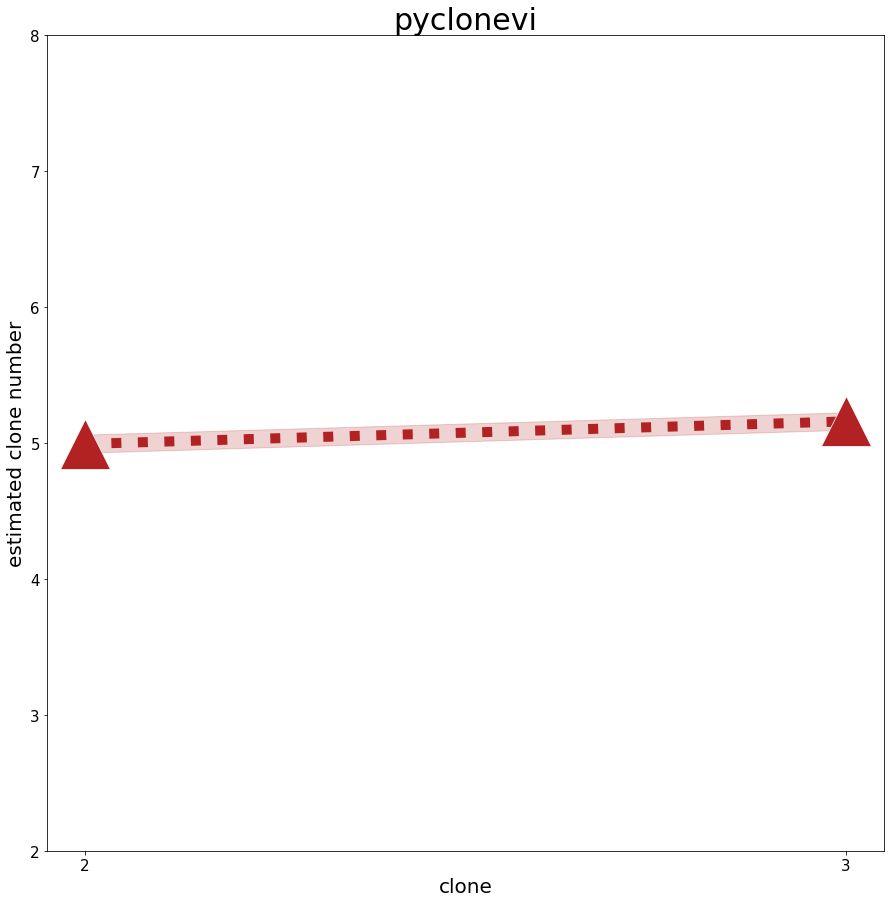

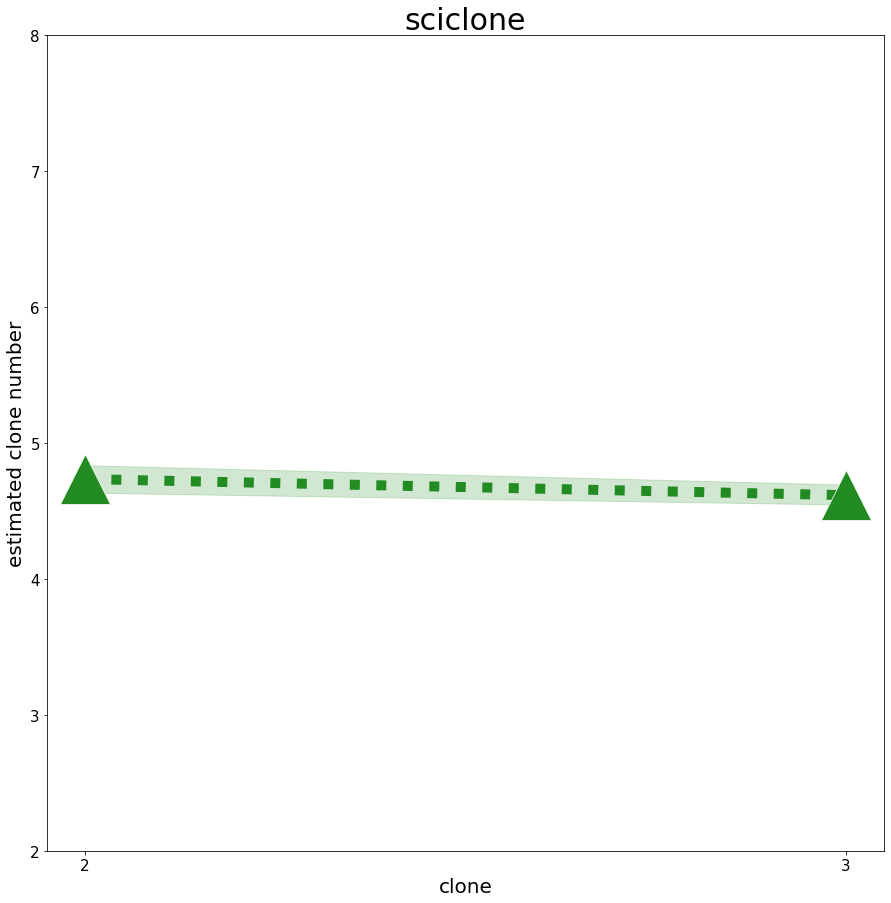

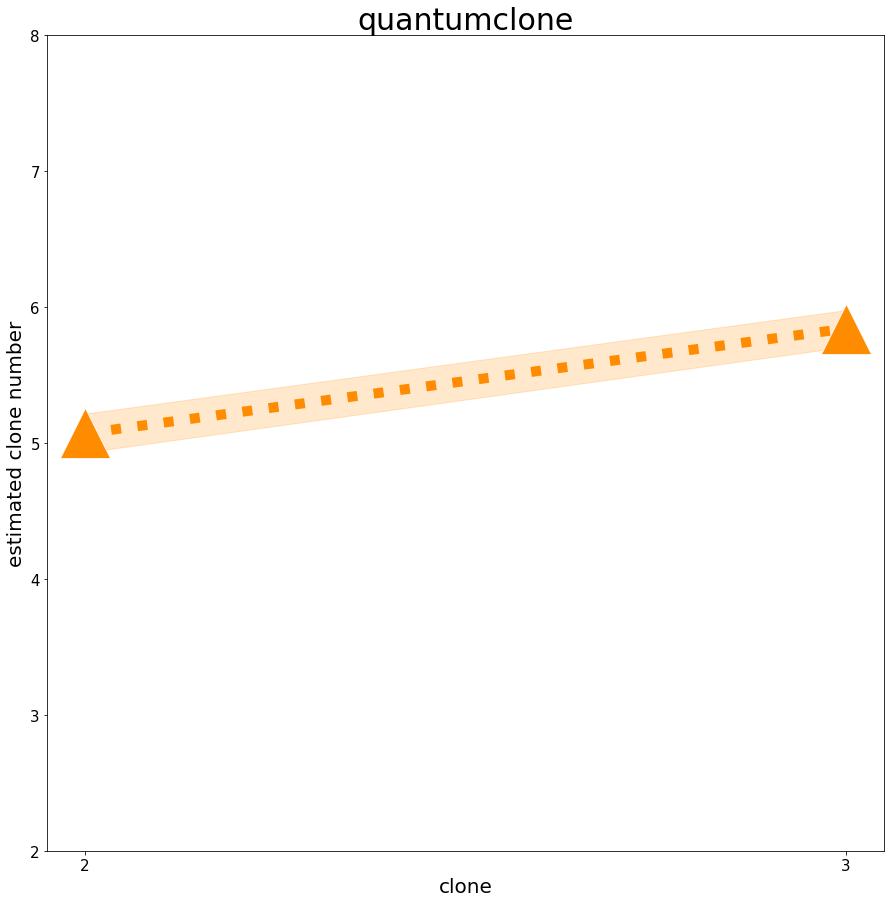

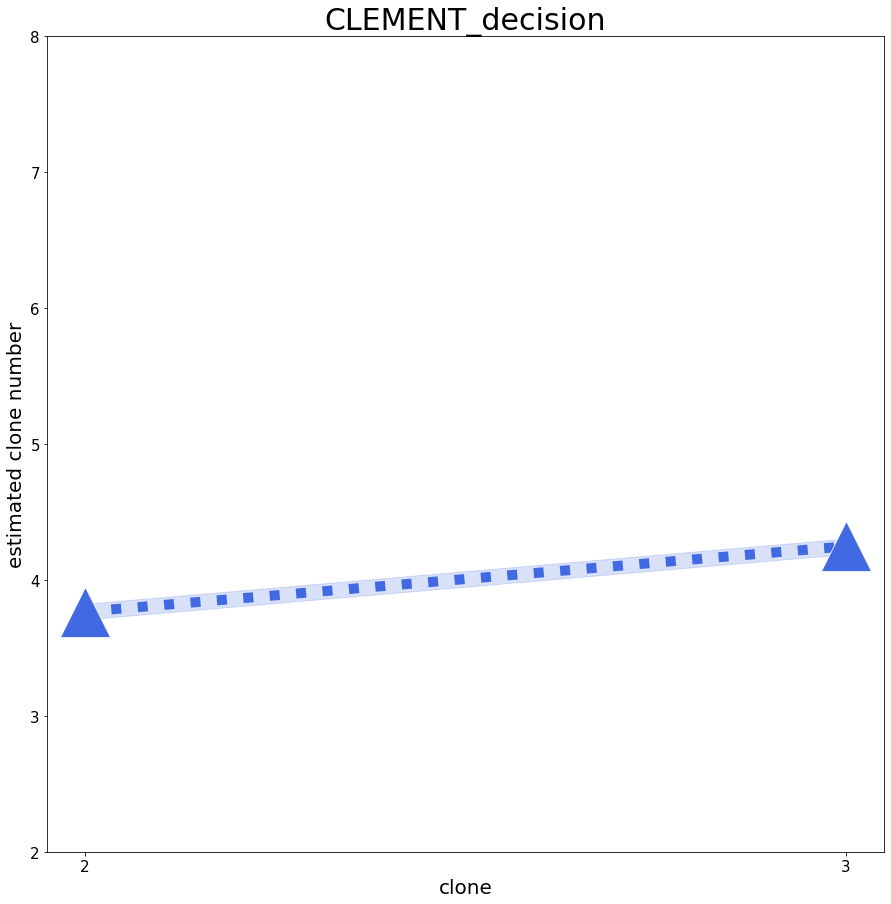

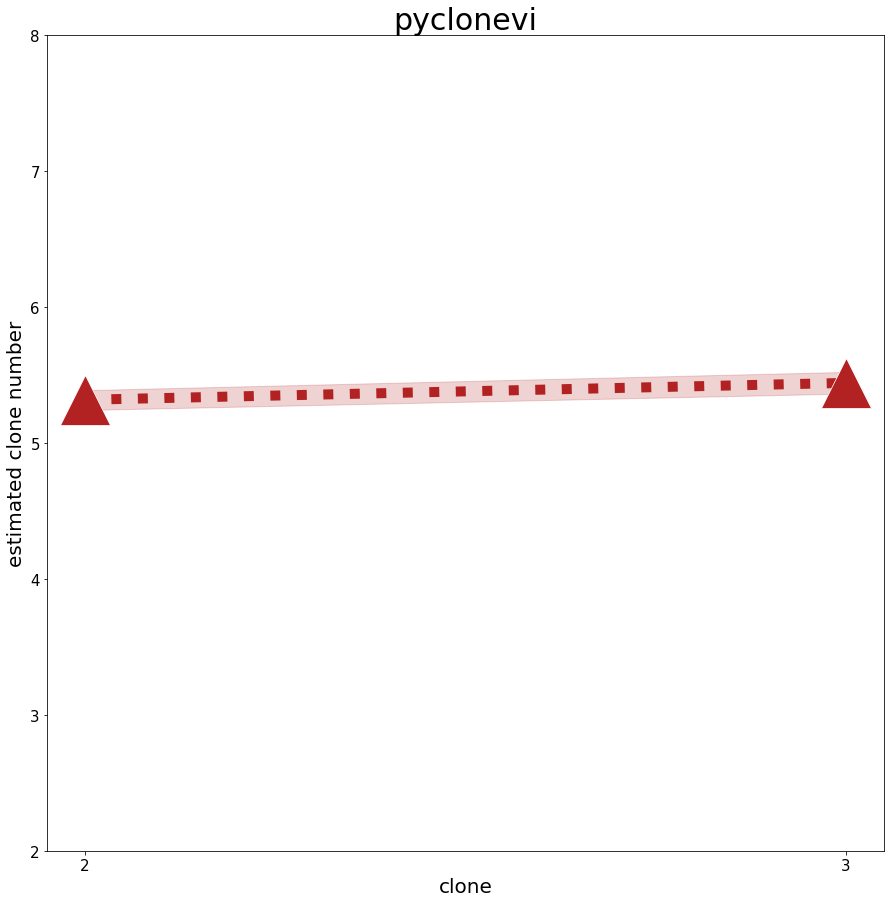

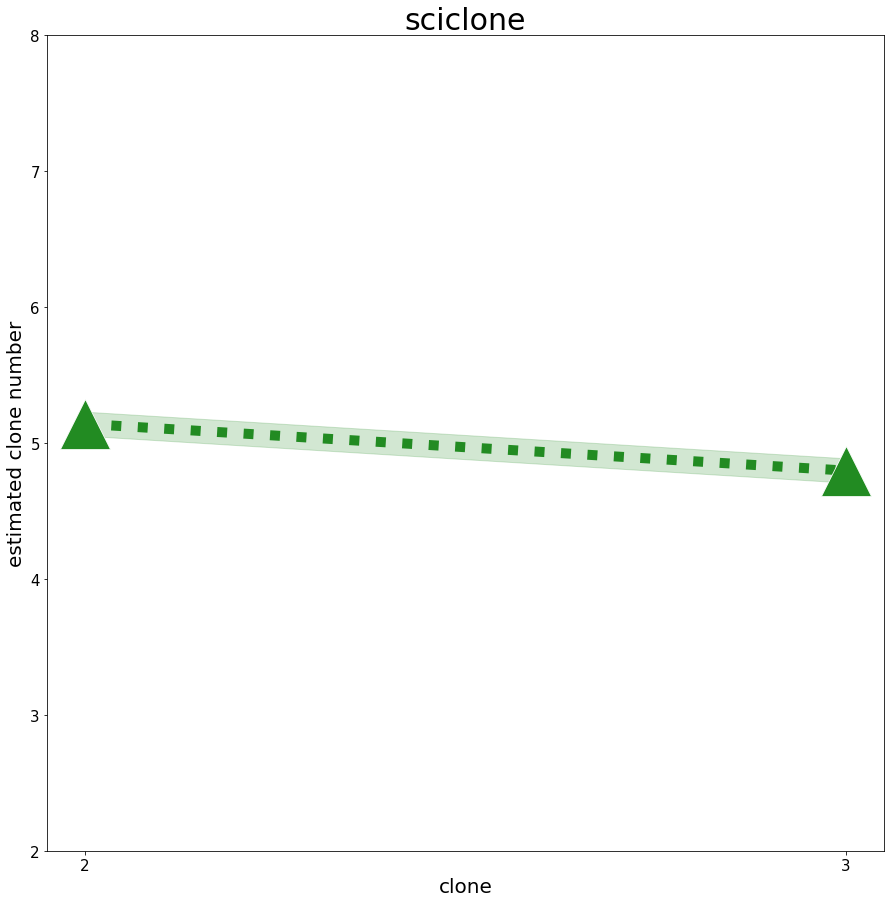

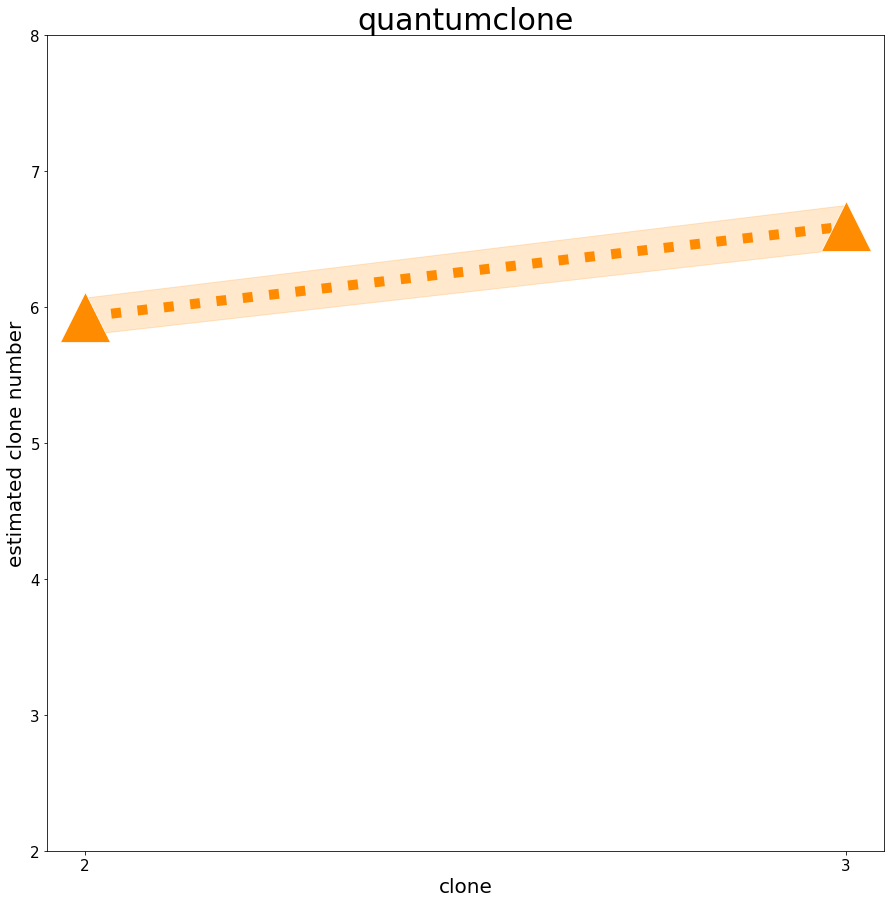

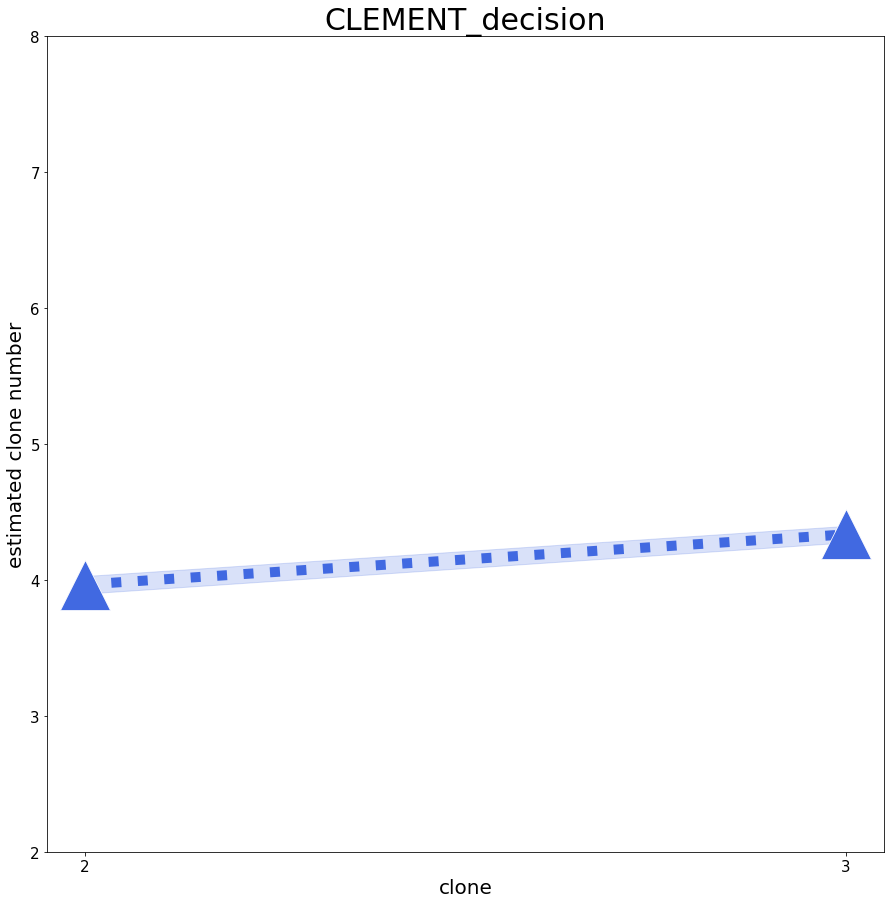

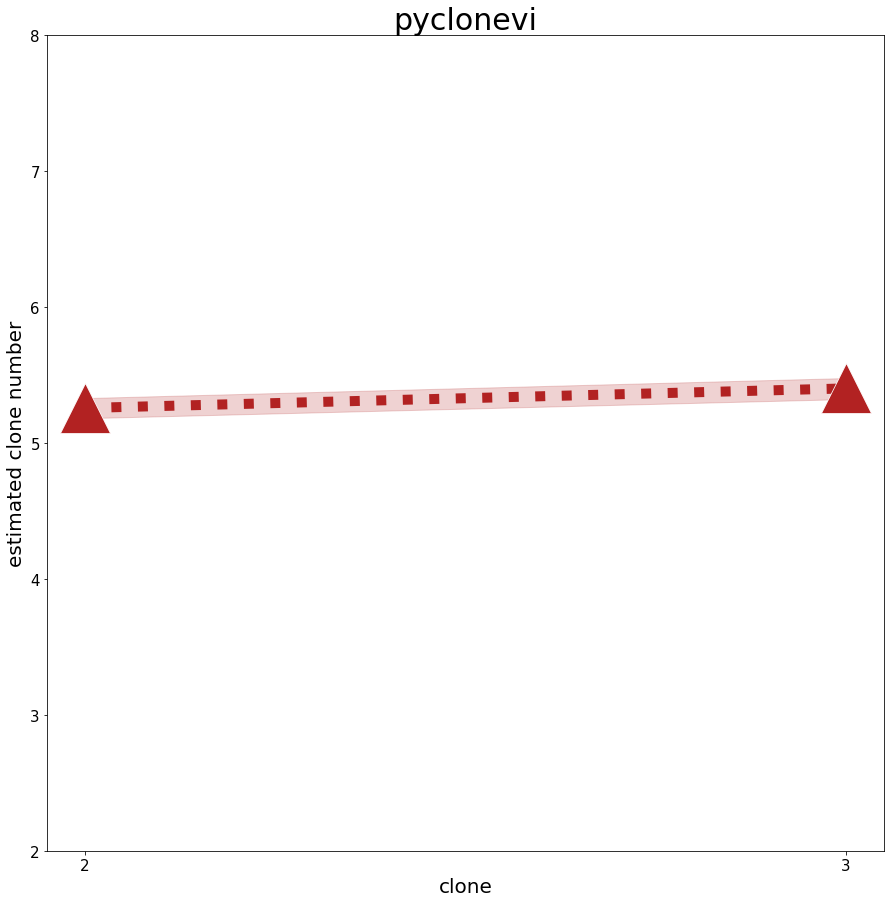

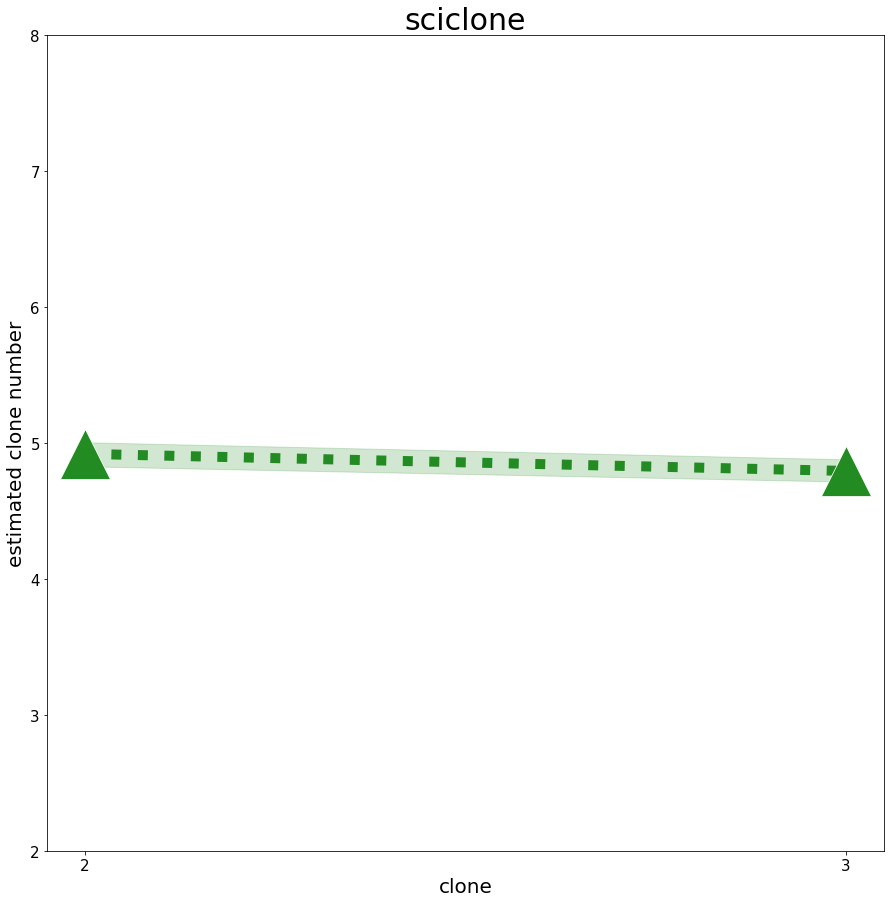

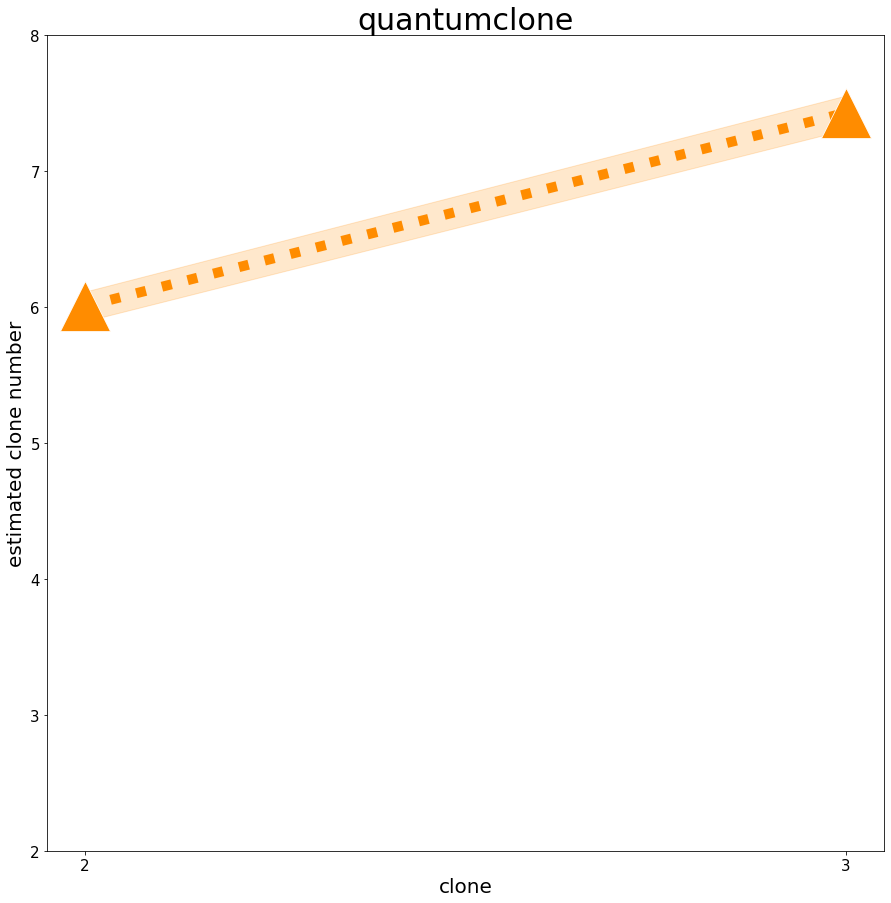

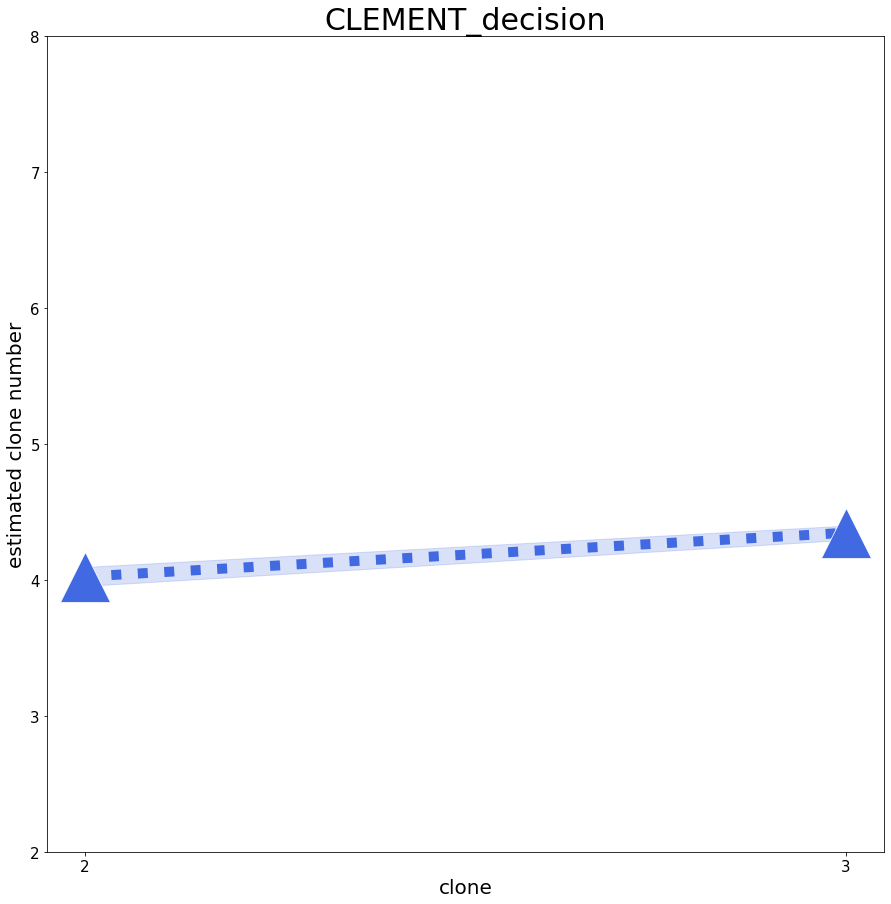

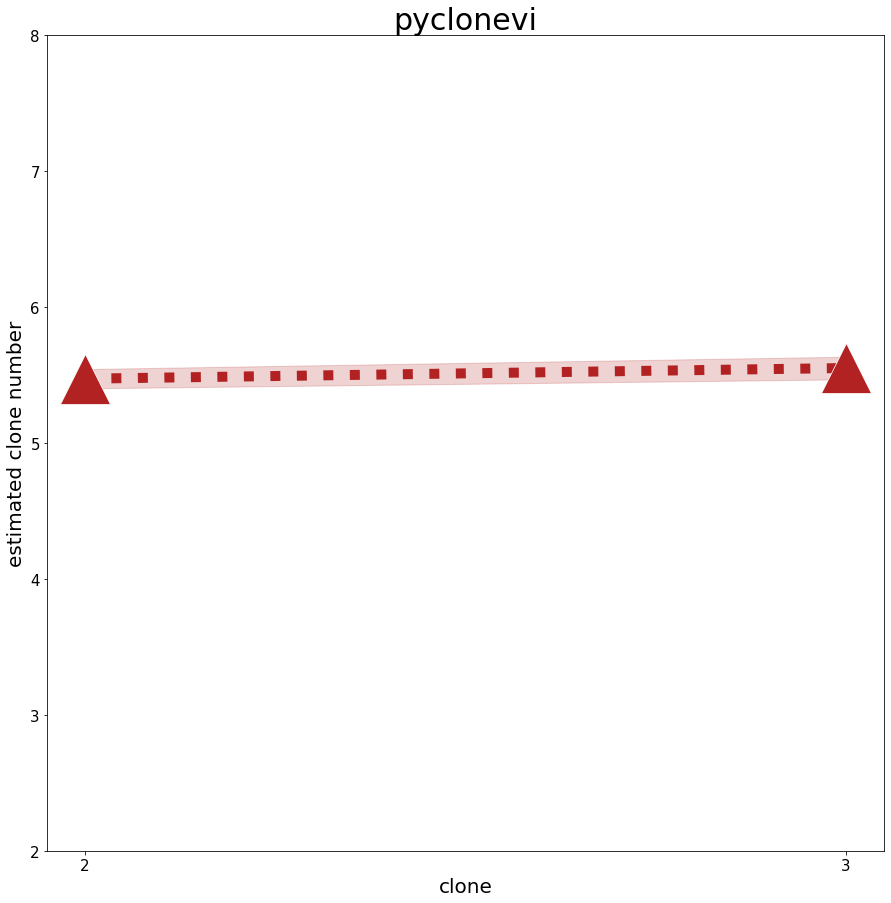

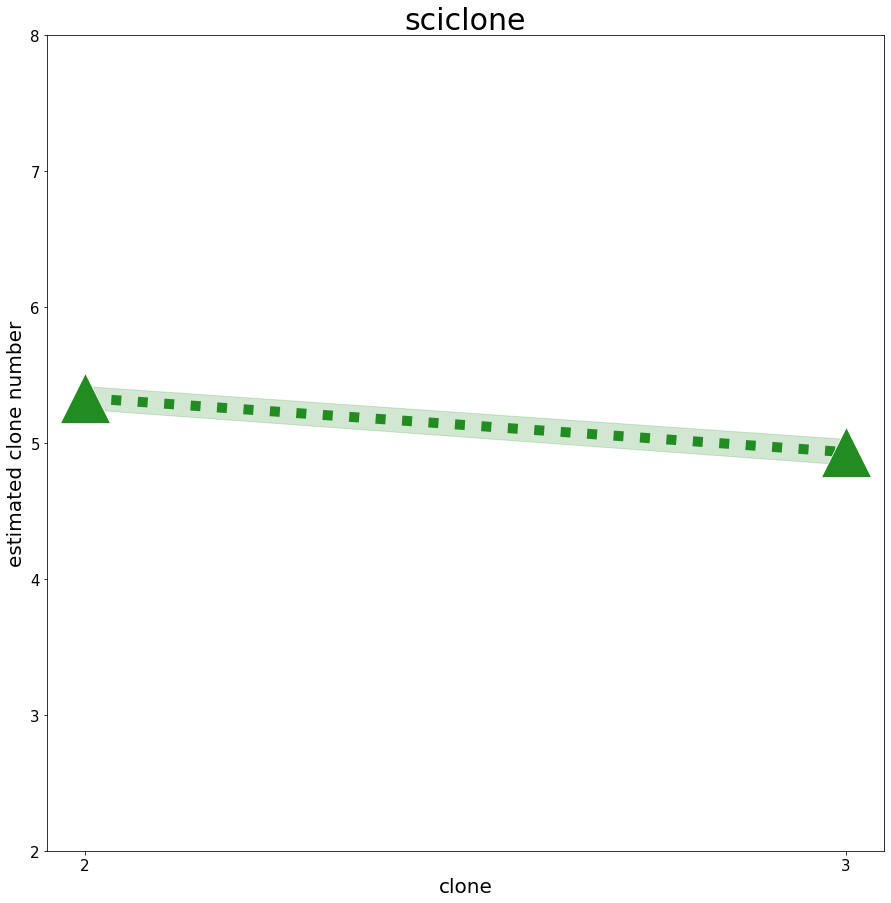

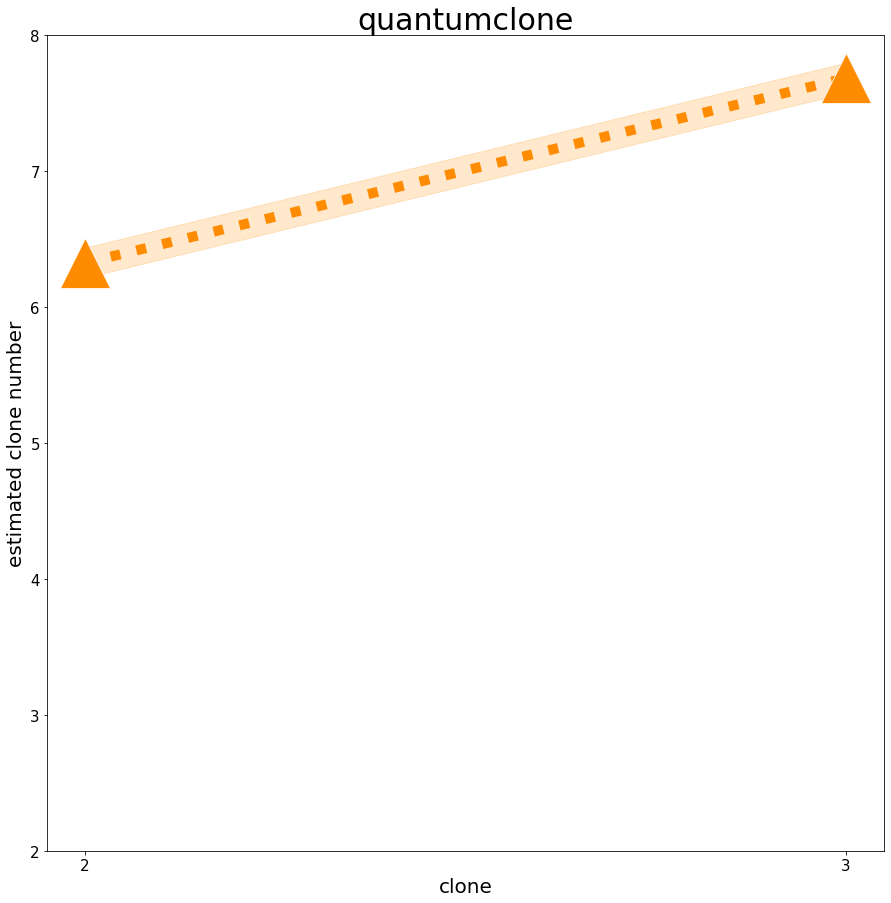

In [95]:
for clone_number in tqdm(clone_numbers):
    for FP_rate in FP_rates:
        for axis_rate in axis_rates:
            for variant_number in variant_numbers:
                for depth_of_coverage in depth_of_coverages:
                    
                    output_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/01.cellData/'+'n'+variant_number+'_'+depth_of_coverage+'x/' + clone_number
                    os.makedirs(output_dir, exist_ok= True)
                    os.makedirs(output_dir + '/pdf', exist_ok= True)
            
                    fo = open(output_dir + '/EC.'+ simulation_type + '_' + clone_number + '_' + FP_rate + '_' + axis_rate + '.txt','w')
                    fo.write("tool" + '\t' + "simulation" + '\t' + "mean_EC" + '\t' + "std_EC" + '\t' + "RMSE_EC" + '\n')

                    EC_benchmarking('CLEMENT_decision', clone_number, 'royalblue', simulation_type, simulations, FP_rate,axis_rate, iteration_num  , variant_number, depth_of_coverage)
                    EC_benchmarking('pyclonevi', clone_number, 'firebrick', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    EC_benchmarking('sciclone', clone_number, 'forestgreen', simulation_type, simulations, FP_rate,axis_rate, iteration_num  , variant_number, depth_of_coverage)
                    EC_benchmarking('quantumclone', clone_number, 'darkorange', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)

                    EC_benchmarking(input_dir, 'SIMPLE_KMEANS_elbow', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    EC_benchmarking(input_dir, 'SIMPLE_KMEANS_gap*', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)
                    EC_benchmarking(input_dir, 'SIMPLE_KMEANS_silhouette', clone_number, 'black', simulation_type, simulations, FP_rate,axis_rate, iteration_num , variant_number, depth_of_coverage)            

            fo.close()

### RMSE  for 문으로 한번에 돌리게 수정 필요

### Main

In [26]:
# day = '230426'

# simulation_type = 'MRS'

# clone_numbers = ['0', '1']
# FP_rates = ['0.0','0.1']
# axis_rates = ['0.0','0.1']
# #########################################

### Supple

In [96]:
day = '230427'

simulation_type = 'MRS'

clone_numbers = ['0', '1']
FP_rates = ['0.0','0.05', '0.1']
axis_rates = ['0.0','0.05', '0.1']
#########################################

In [97]:
for clone_number in tqdm(clone_numbers):
    for FP_rate in FP_rates:
        for axis_rate in axis_rates:
            FP_axis_set = FP_rate + '_' + axis_rate + '.txt'
            tool_list = ['CLEMENT_decision','pyclonevi','sciclone','quantumclone']
            RMSE_dic = {}

            if axis_rate == '0.0':
                for tool in tool_list:
                    RMSE_dic[tool] = {}
                    RMSE_dic[tool]['1D'] = []
                    RMSE_dic[tool]['2D'] = []
                    RMSE_dic[tool]['3D'] = []
            else:
                for tool in tool_list:
                    RMSE_dic[tool] = {}
                    RMSE_dic[tool]['2D'] = []
                    RMSE_dic[tool]['3D'] = []    

            input_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/01.cellData/'+clone_number
            input_file = [i for i in os.listdir(input_dir) if "EC" in i and FP_axis_set in i and 'txt' in i]
            print(input_file, FP_axis_set)
            for file in input_file:
                f = open(input_dir + '/' + file, 'r')
                for fline in f:
                    if fline.startswith('tool'):
                        continue
                    ftab = fline.rstrip().split('\t')
                    tool = ftab[0]
                    RMSE = float(ftab[-1])
                    sample_number = ftab[1]
                    RMSE_dic[tool][sample_number].append(RMSE)
                f.close()
            # print(RMSE_dic)

            fo = open(input_dir + '/' + 'RMSE.' + simulation_type + '_' + clone_number + '_' + FP_axis_set, 'w')
            for RMSE in RMSE_dic: ### tool
                print(RMSE)
                for sample in RMSE_dic[RMSE]: ### sample number
                    mean_of_RMSE = 0
                    for median_value in RMSE_dic[RMSE][sample]:
                        mean_of_RMSE += float(median_value)
                    mean_of_RMSE = mean_of_RMSE/len(RMSE_dic[RMSE][sample])
                    fo.write(RMSE + '\t' + sample + '\t' + str(mean_of_RMSE) + '\n')
            fo.close()            

100%|██████████| 2/2 [00:00<00:00, 11.47it/s]

['EC.MRS_0_0.0_0.0.txt'] 0.0_0.0.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.0_0.05.txt'] 0.0_0.05.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.0_0.1.txt'] 0.0_0.1.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.05_0.0.txt'] 0.05_0.0.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.05_0.05.txt'] 0.05_0.05.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.05_0.1.txt'] 0.05_0.1.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.1_0.0.txt'] 0.1_0.0.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.1_0.05.txt'] 0.1_0.05.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_0_0.1_0.1.txt'] 0.1_0.1.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_1_0.0_0.0.txt'] 0.0_0.0.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_1_0.0_0.05.txt'] 0.0_0.05.txt
CLEMENT_decision
pyclonevi
sciclone
quantumclone
['EC.MRS_1_0.0_0.1.txt'] 0.0_0.1.txt
CLE


  0%|          | 0/2 [00:00<?, ?it/s]

['EC.MRS_0_0.0_0.0.txt']
CLEMENT_decision
['1D', '2D', '3D']
[0.6440611887195306, 0.4056887148212695, 0.304724700110022]
['EC.MRS_0_0.0_0.0.txt']
pyclonevi
['1D', '2D', '3D']
[1.029203215725281, 0.5627314338711378, 0.5732115042211109]
['EC.MRS_0_0.0_0.0.txt']
sciclone
['1D', '2D', '3D']
[0.986951910720109, 0.9309493362512627, 0.7637626158259734]
['EC.MRS_0_0.0_0.0.txt']
quantumclone
['1D', '2D', '3D']
[1.1941214033447043, 0.4851975542669879, 0.3450327796711771]
['EC.MRS_0_0.0_0.05.txt']
CLEMENT_decision
['2D', '3D']
[0.4031128874149275, 0.2627691364061218]
['EC.MRS_0_0.0_0.05.txt']
pyclonevi
['2D', '3D']
[0.9025427044374872, 0.9940297973880049]
['EC.MRS_0_0.0_0.05.txt']
sciclone
['2D', '3D']
[1.2812754062521714, 1.4425506510872959]
['EC.MRS_0_0.0_0.05.txt']
quantumclone
['2D', '3D']
[0.47653261518319323, 0.3236694374850748]
['EC.MRS_0_0.0_0.1.txt']
CLEMENT_decision
['2D', '3D']
[0.362284418654736, 0.1889822365046136]
['EC.MRS_0_0.0_0.1.txt']
pyclonevi
['2D', '3D']
[1.3941843493598687, 

<ipython-input-98-80d9b62f7454>:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (8,12))


['EC.MRS_0_0.05_0.1.txt']
quantumclone
['2D', '3D']
[2.0941386455215105, 2.406340830072953]
['EC.MRS_0_0.1_0.0.txt']
CLEMENT_decision
['1D', '2D', '3D']
[0.6236095644623235, 0.6645800679125629, 0.7928249671720918]
['EC.MRS_0_0.1_0.0.txt']
pyclonevi
['1D', '2D', '3D']
[1.0, 1.2731195282978474, 1.2946777499402993]
['EC.MRS_0_0.1_0.0.txt']
sciclone
['1D', '2D', '3D']
[0.986951910720109, 1.1483684077855851, 1.2742878496672263]
['EC.MRS_0_0.1_0.0.txt']
quantumclone
['1D', '2D', '3D']
[1.1832159566199232, 1.6620770138594663, 2.7141603981096374]
['EC.MRS_0_0.1_0.05.txt']
CLEMENT_decision
['2D', '3D']
[0.7216878364870323, 0.7270291799999699]
['EC.MRS_0_0.1_0.05.txt']
pyclonevi
['2D', '3D']
[1.6677080080157918, 1.5383974345619102]
['EC.MRS_0_0.1_0.05.txt']
sciclone
['2D', '3D']
[1.4433756729740645, 1.1801936887041646]
['EC.MRS_0_0.1_0.05.txt']
quantumclone
['2D', '3D']
[1.9359536840189815, 2.882624465573657]
['EC.MRS_0_0.1_0.1.txt']
CLEMENT_decision
['2D', '3D']
[0.7932002689527196, 0.735170858


 50%|█████     | 1/2 [00:02<00:02,  2.94s/it]

['EC.MRS_0_0.1_0.1.txt']
sciclone
['2D', '3D']
[1.682012683265696, 1.3102162671355697]
['EC.MRS_0_0.1_0.1.txt']
quantumclone
['2D', '3D']
[2.3170563221467018, 3.2374299036353484]
['EC.MRS_1_0.0_0.0.txt']
CLEMENT_decision
['1D', '2D', '3D']
[1.4233502471022113, 1.191987136395915, 0.9167748853869147]
['EC.MRS_1_0.0_0.0.txt']
pyclonevi
['1D', '2D', '3D']
[1.4832396974191326, 0.9519716382329886, 0.9561828874675149]
['EC.MRS_1_0.0_0.0.txt']
sciclone
['1D', '2D', '3D']
[1.469441818943254, 1.66332999331662, 1.2535663410560174]
['EC.MRS_1_0.0_0.0.txt']
quantumclone
['1D', '2D', '3D']
[2.0294133434366, 1.590990257669732, 2.013052645208503]
['EC.MRS_1_0.0_0.05.txt']
CLEMENT_decision
['2D', '3D']
[1.0733514491224827, 0.8930952063576691]
['EC.MRS_1_0.0_0.05.txt']
pyclonevi
['2D', '3D']
[0.8815233027738594, 1.0023781246425447]
['EC.MRS_1_0.0_0.05.txt']
sciclone
['2D', '3D']
[1.3889444433333777, 1.599851183555461]
['EC.MRS_1_0.0_0.05.txt']
quantumclone
['2D', '3D']
[1.378404875209022, 1.674031347490

100%|██████████| 2/2 [00:05<00:00,  2.81s/it]


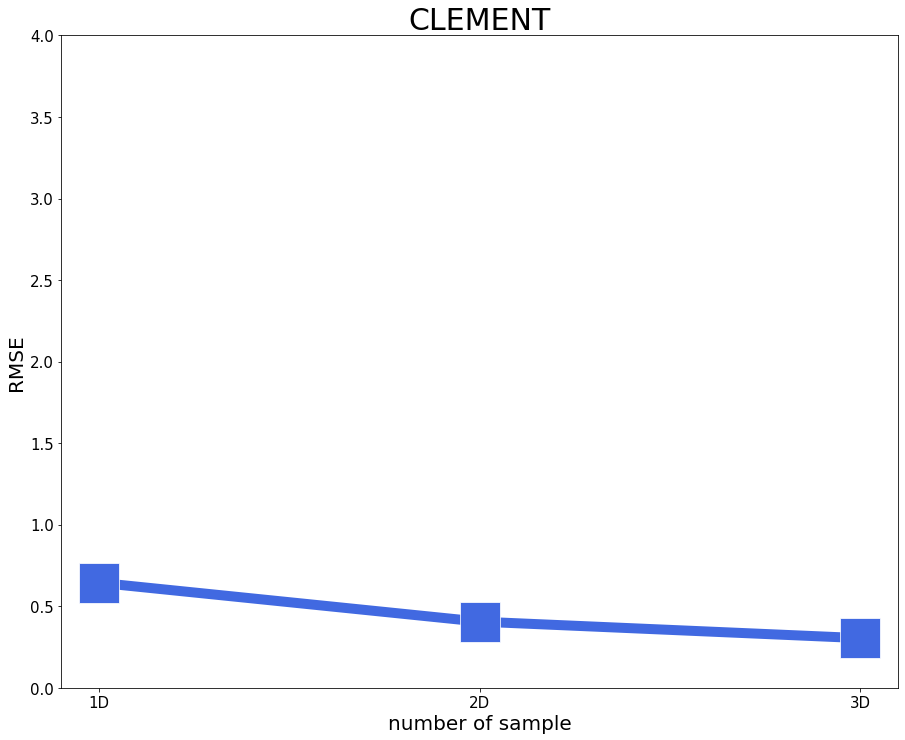

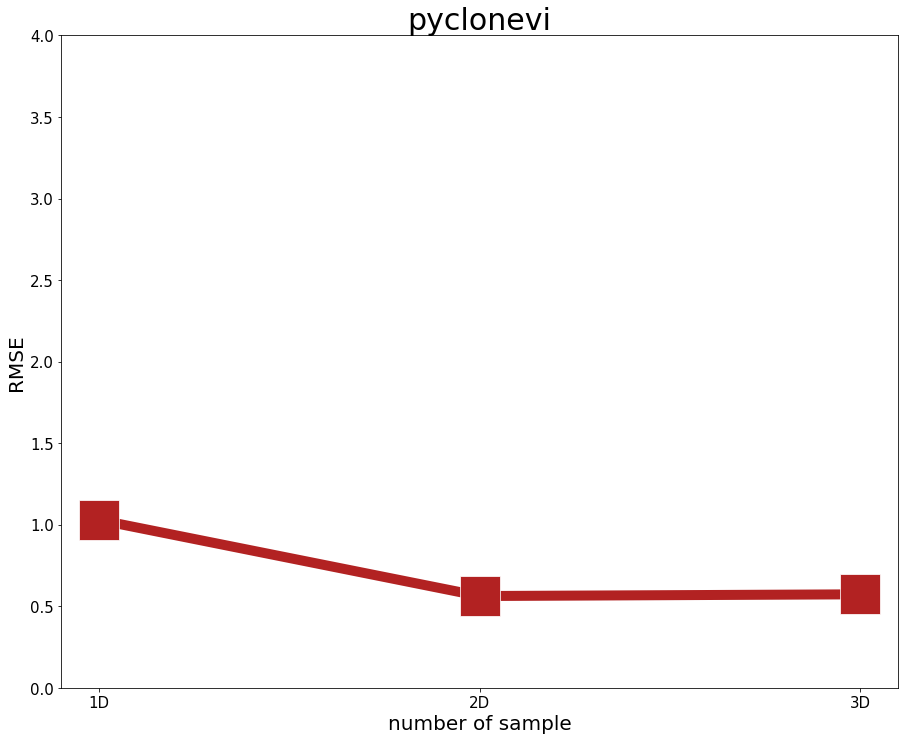

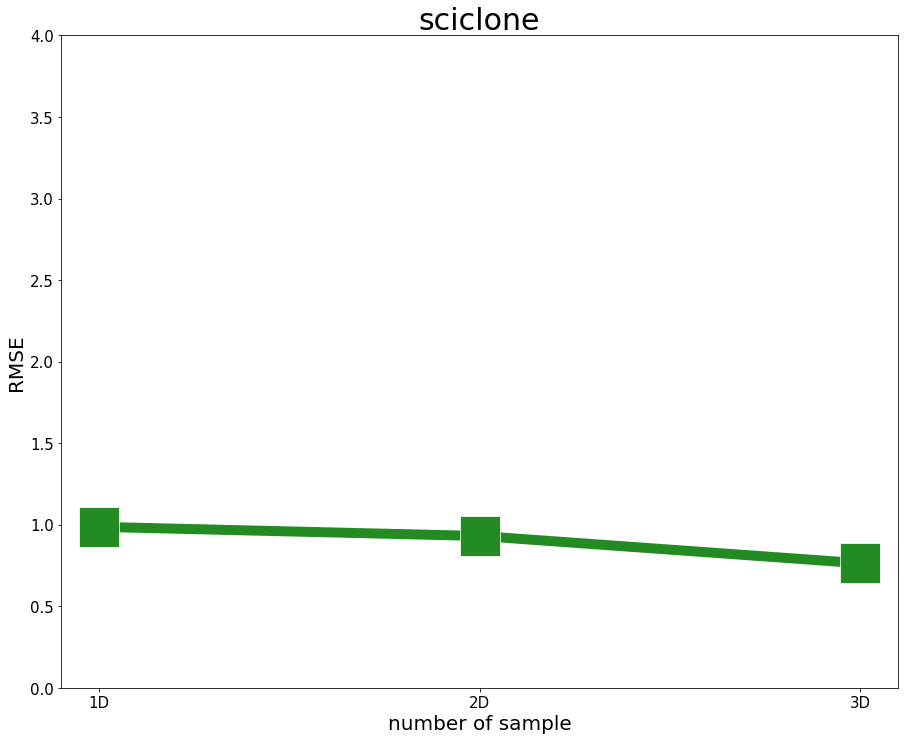

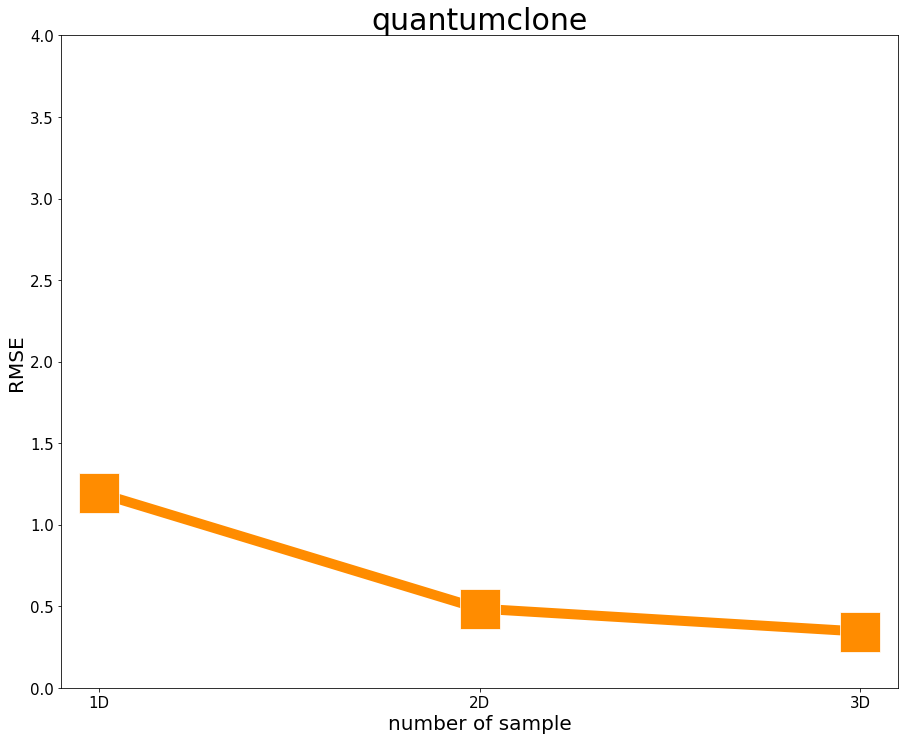

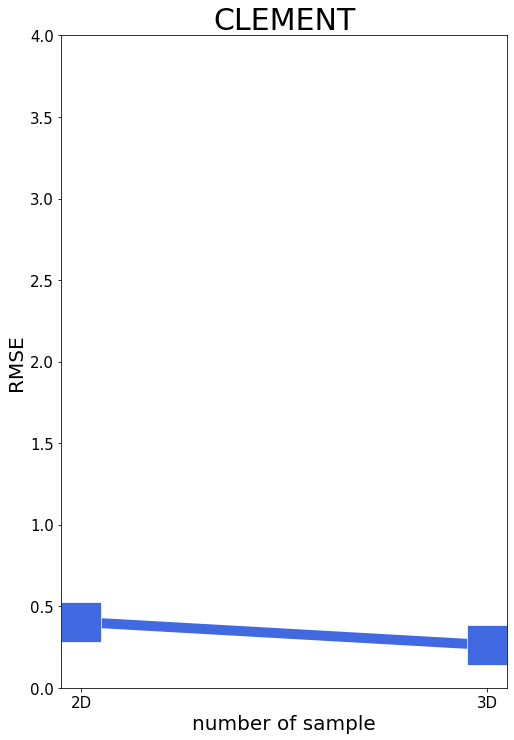

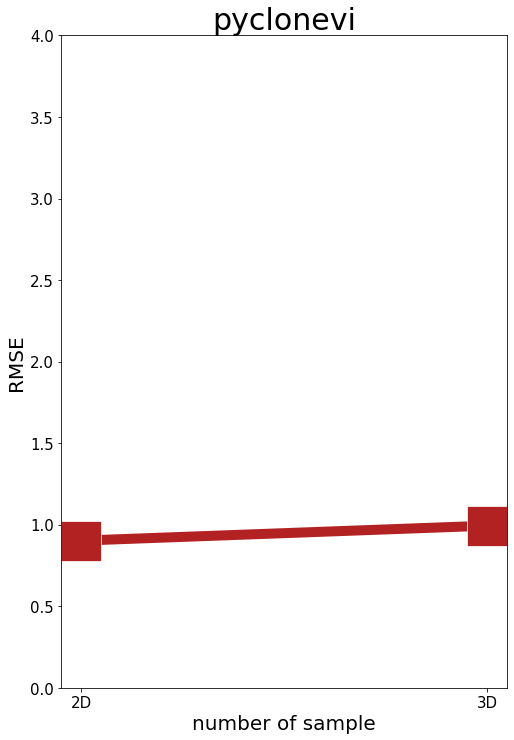

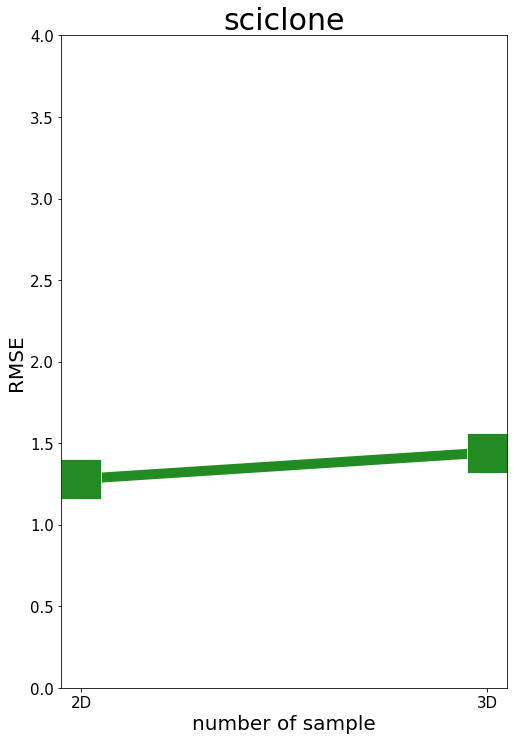

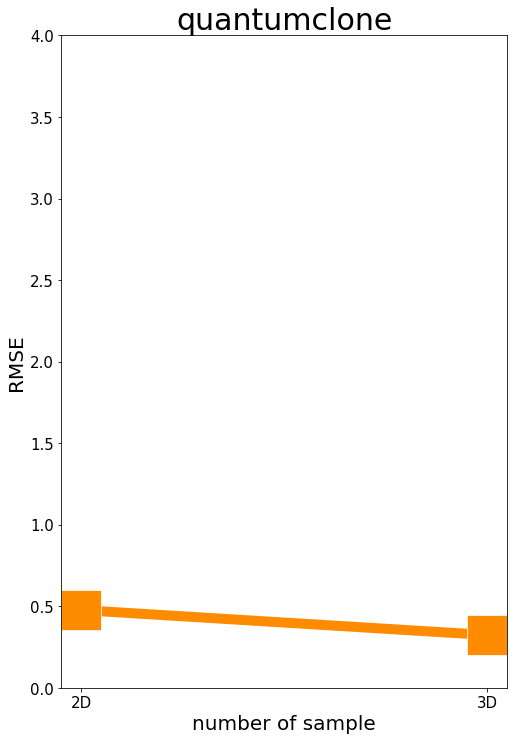

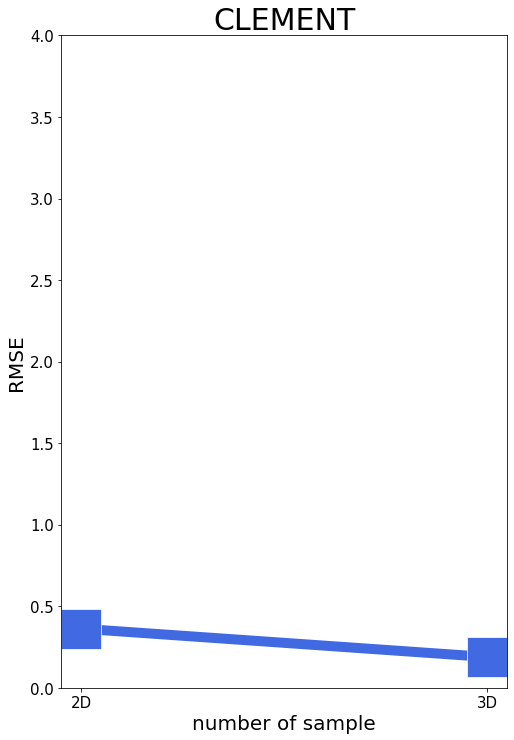

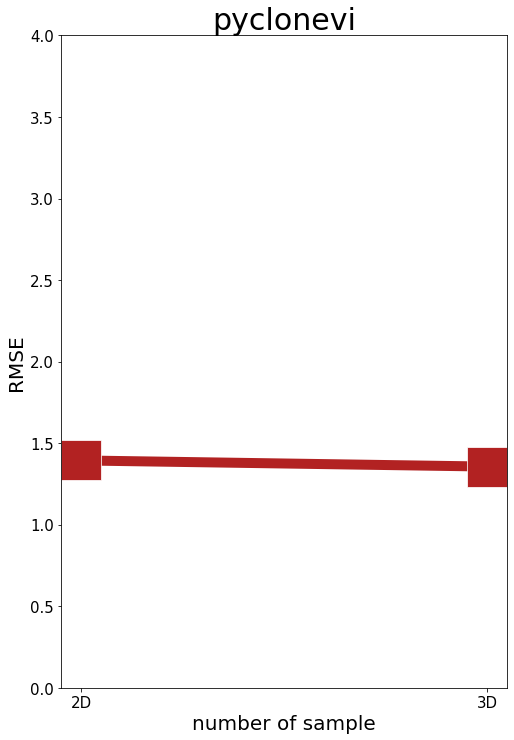

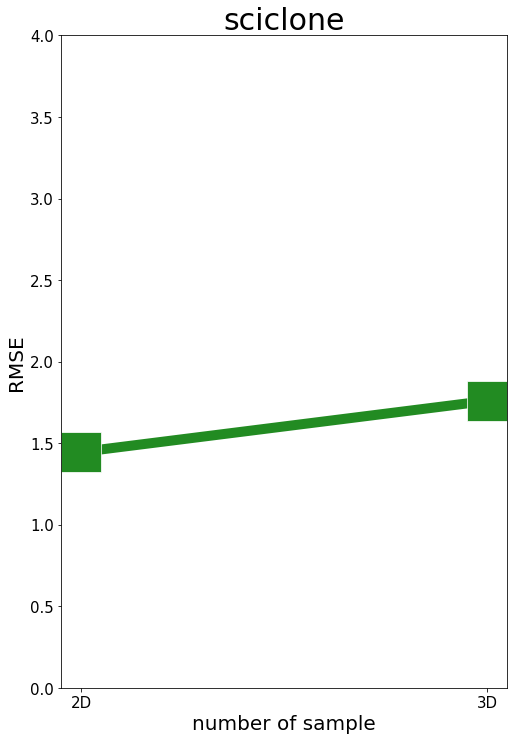

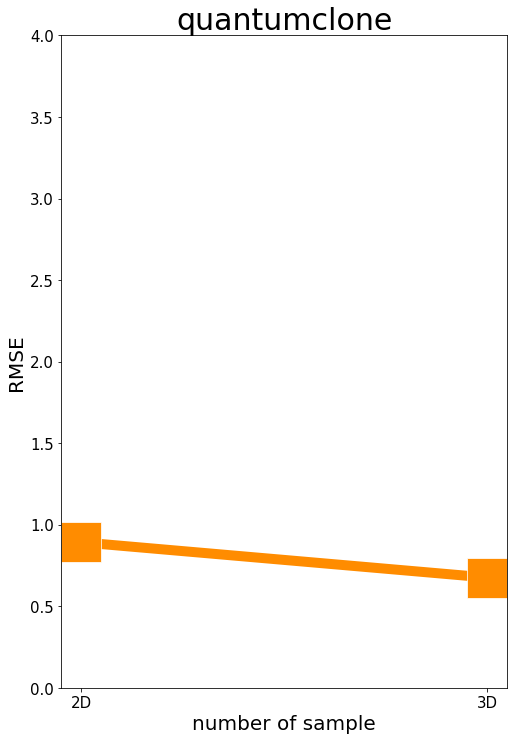

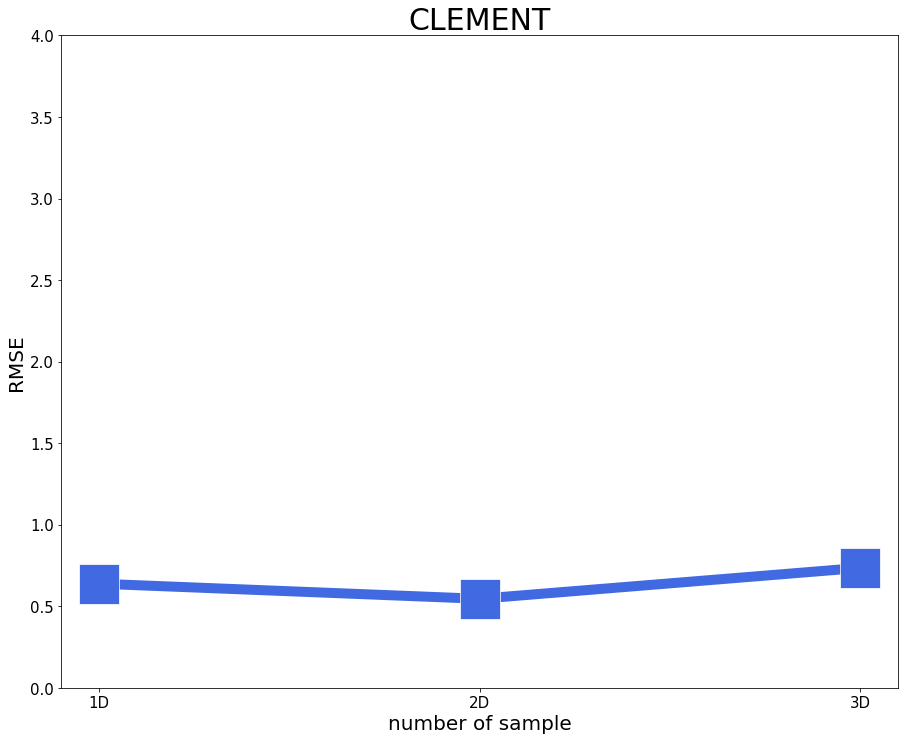

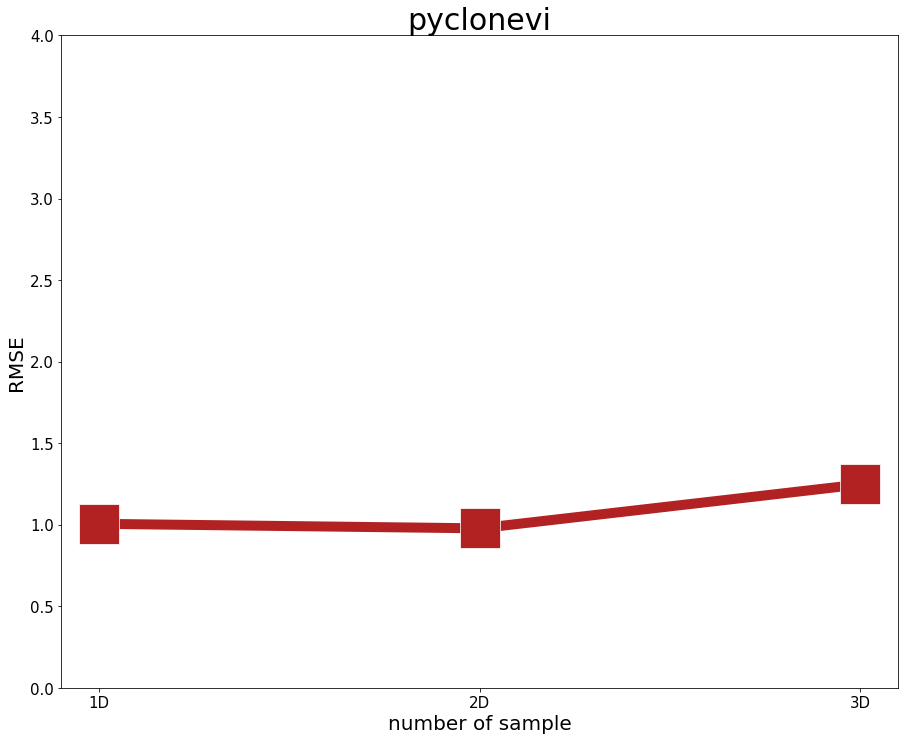

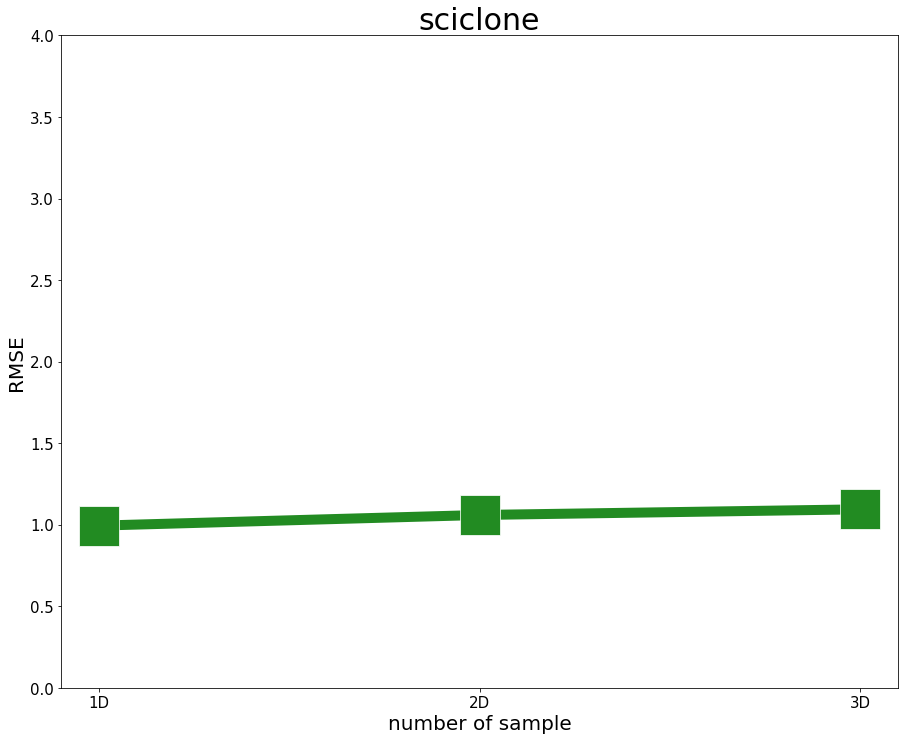

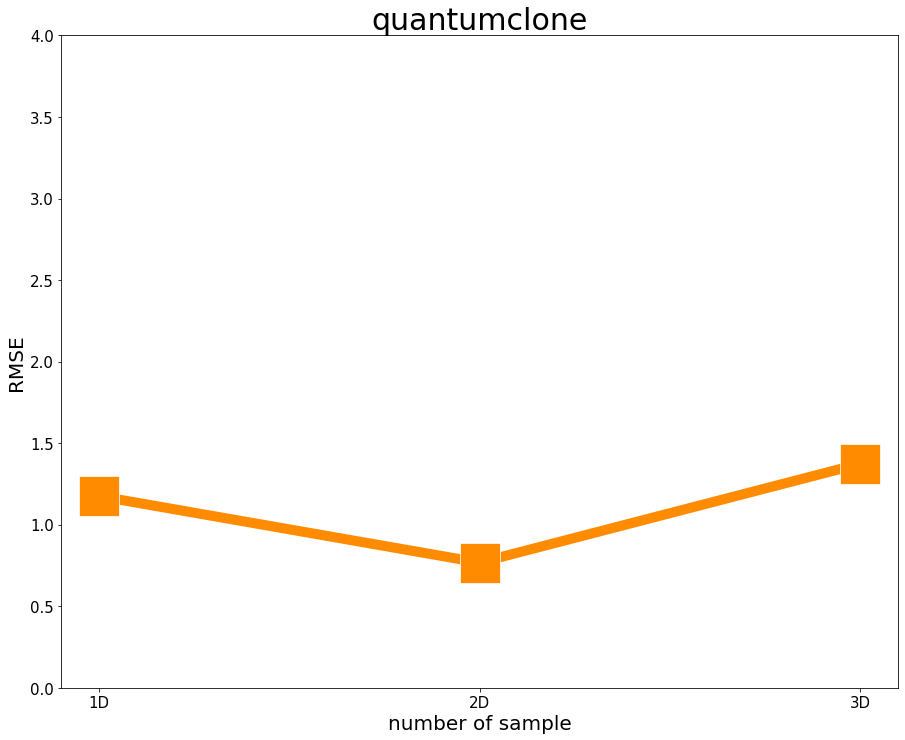

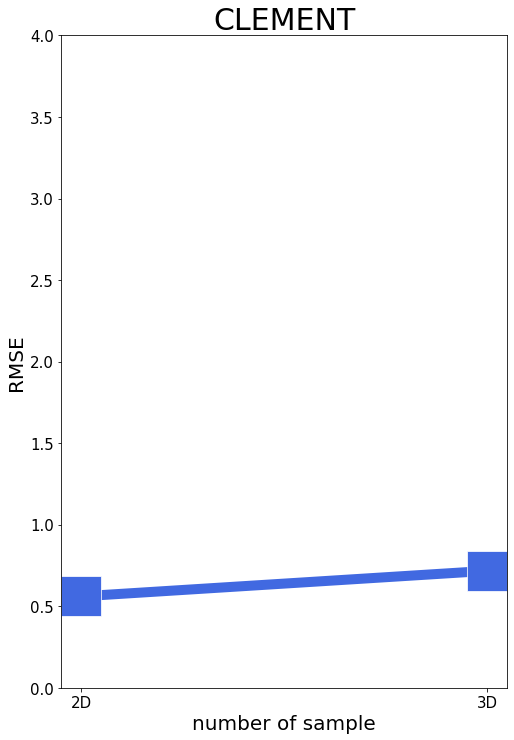

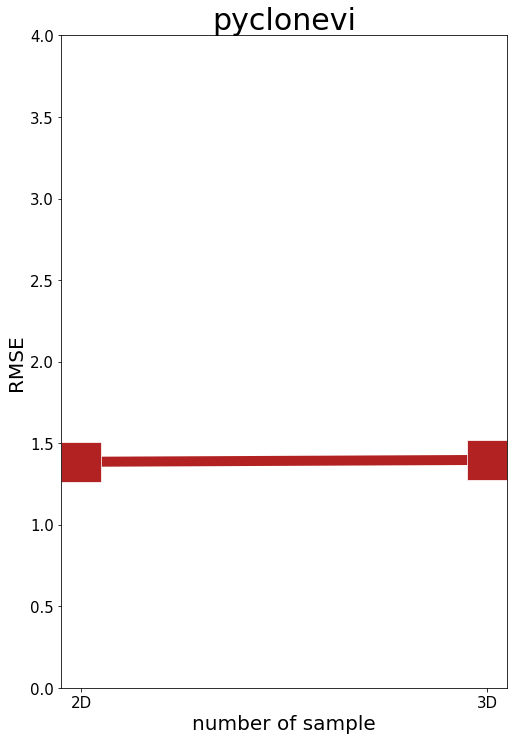

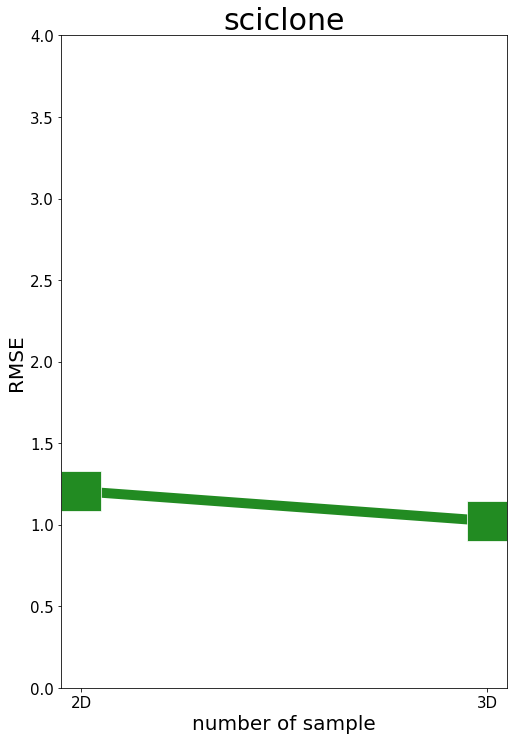

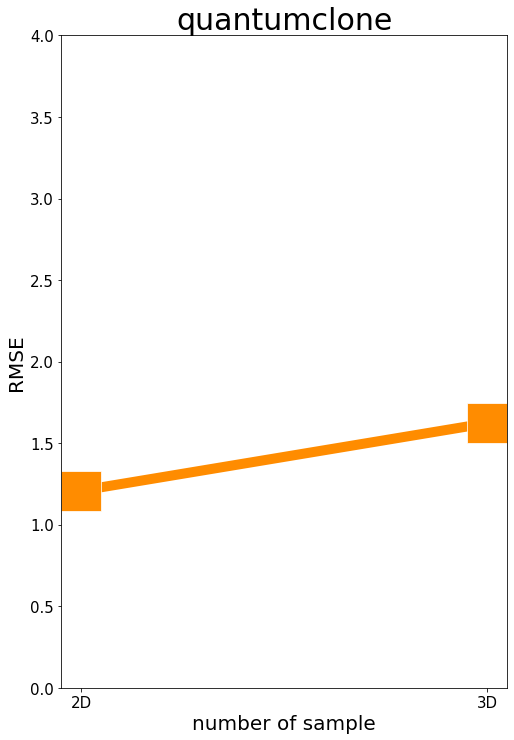

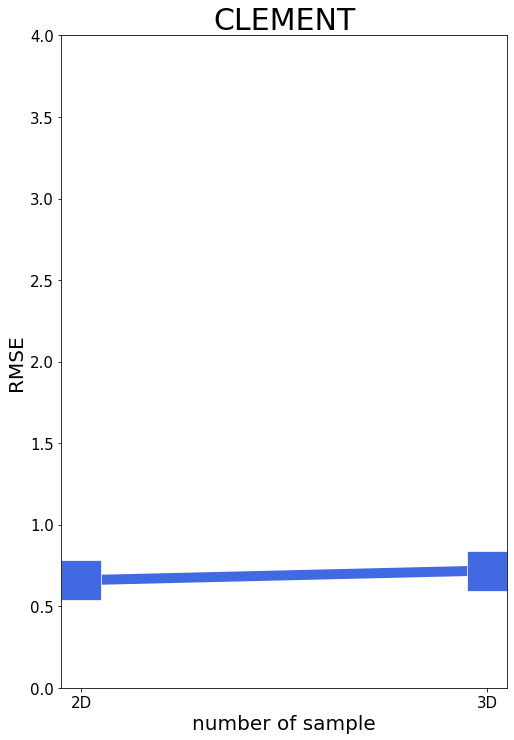

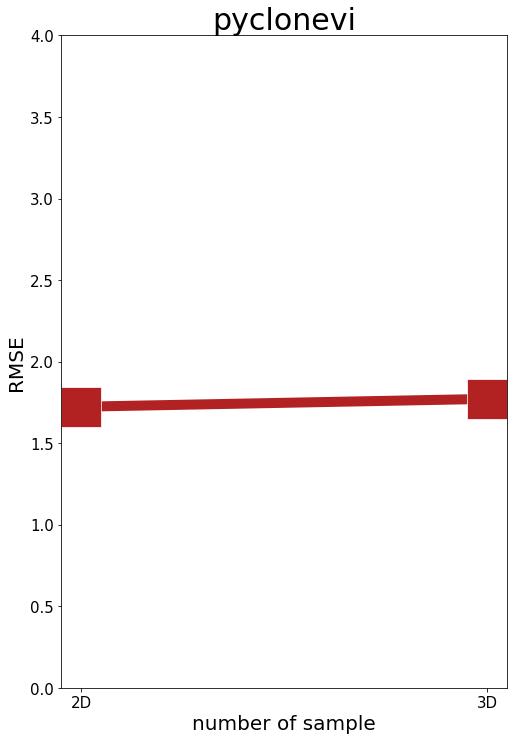

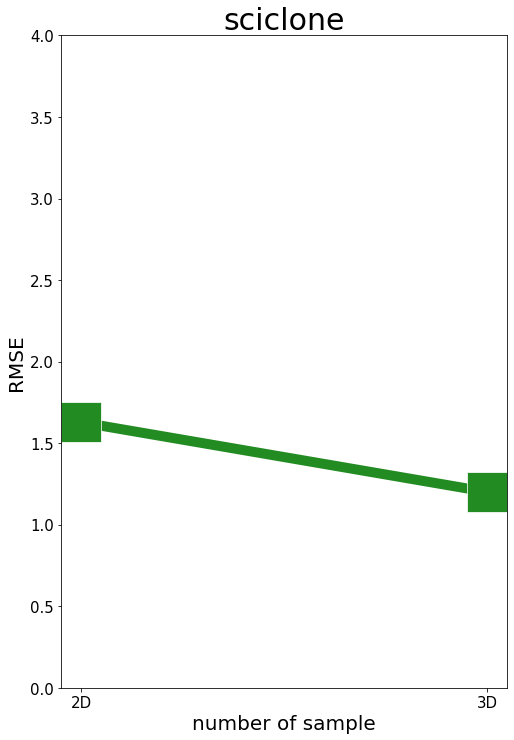

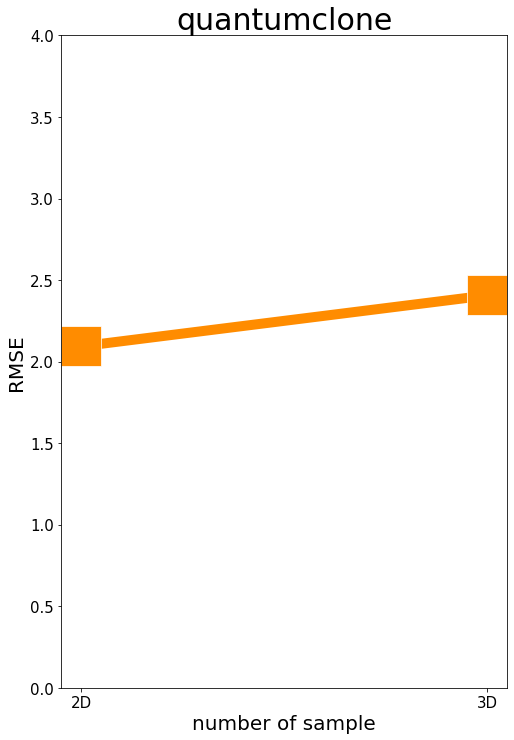

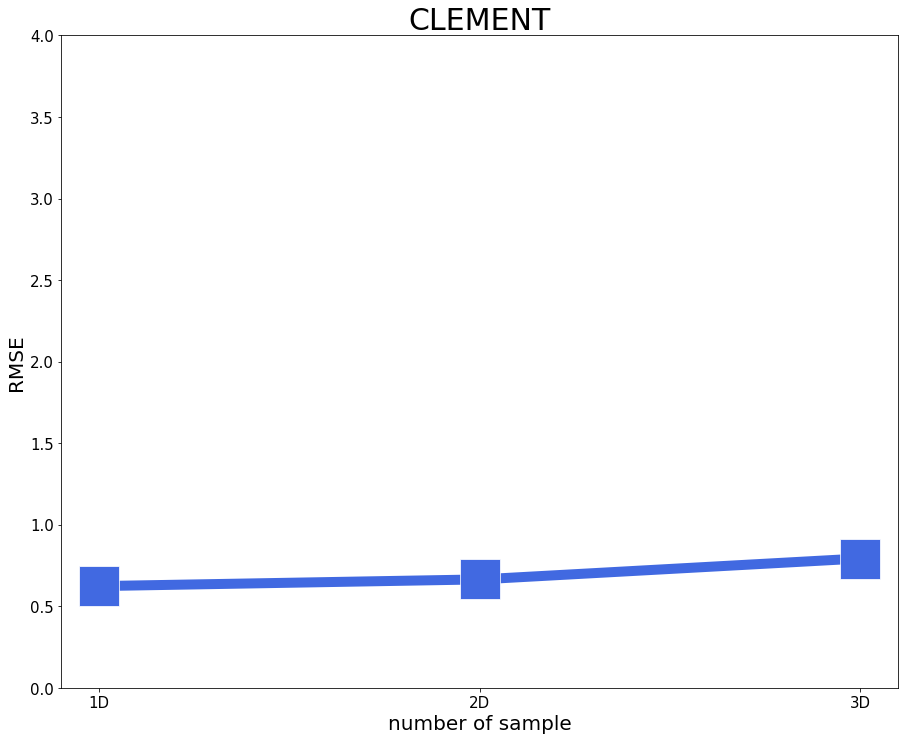

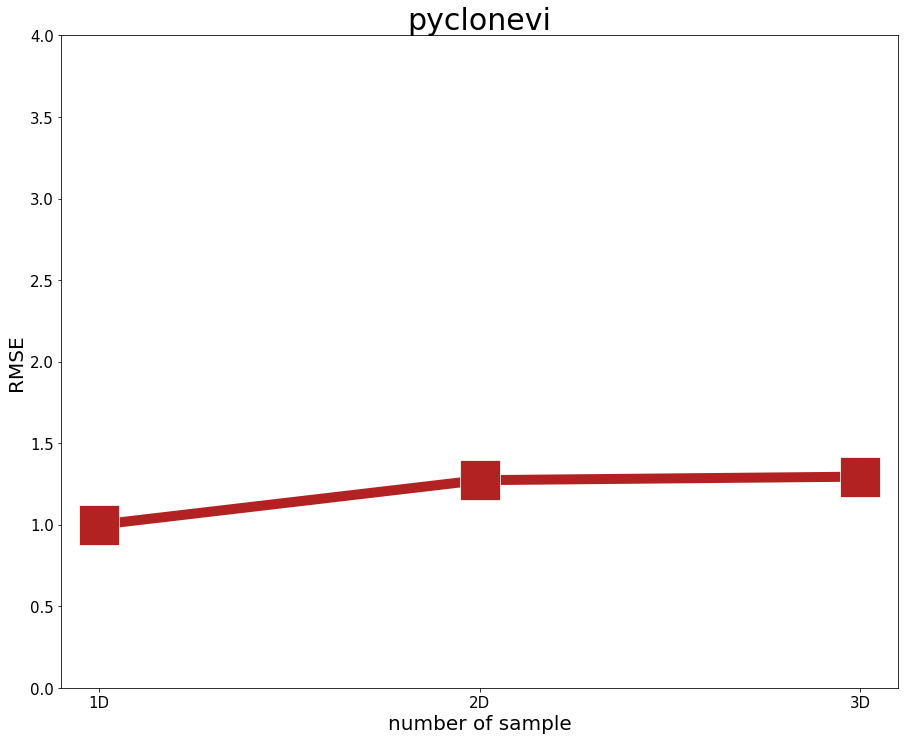

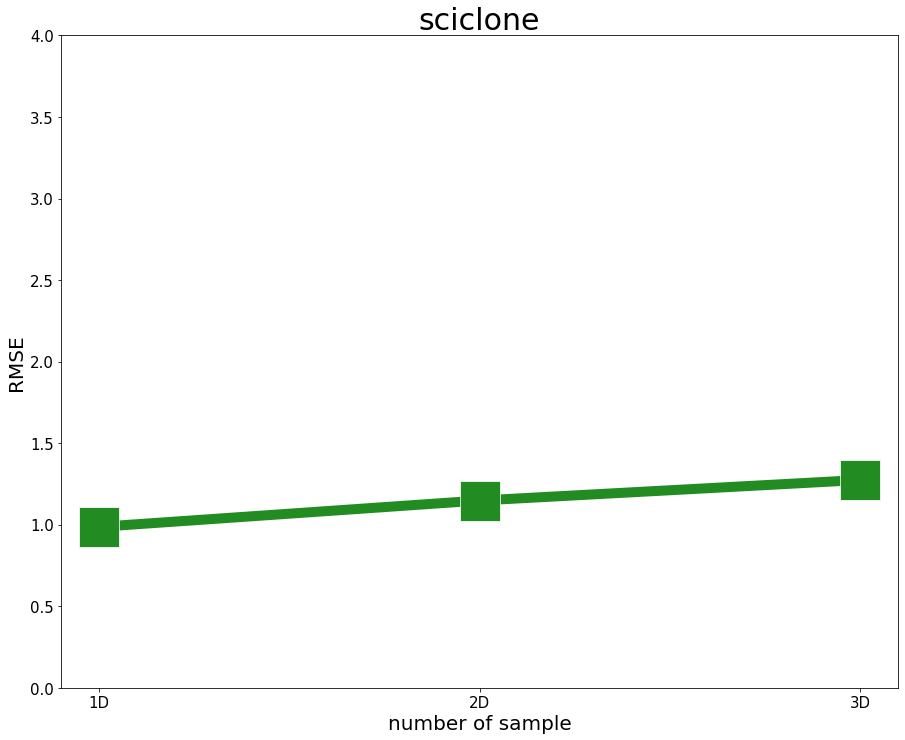

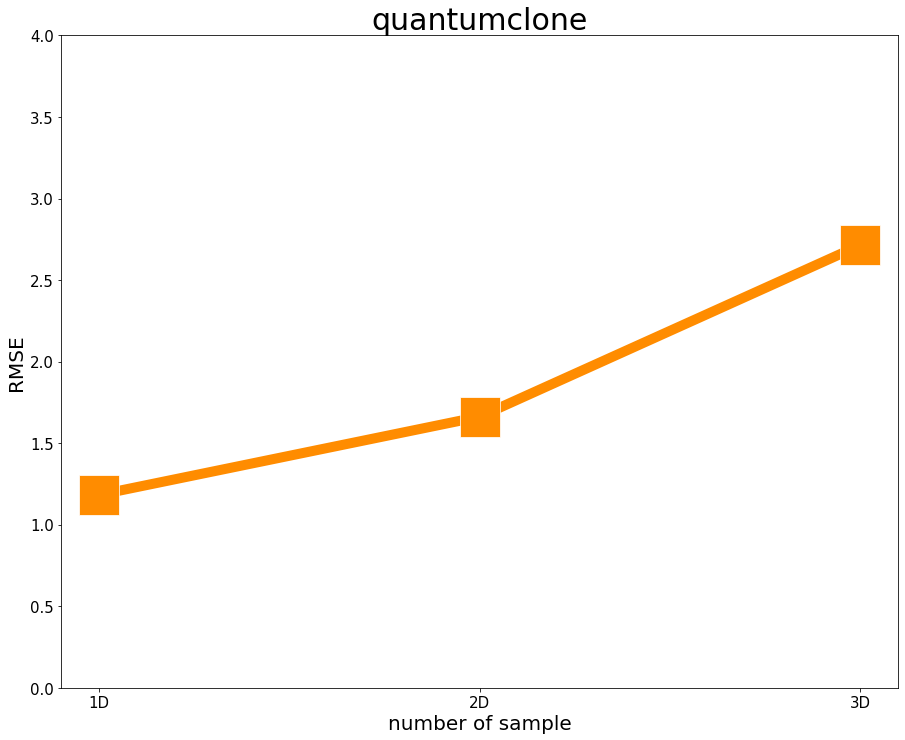

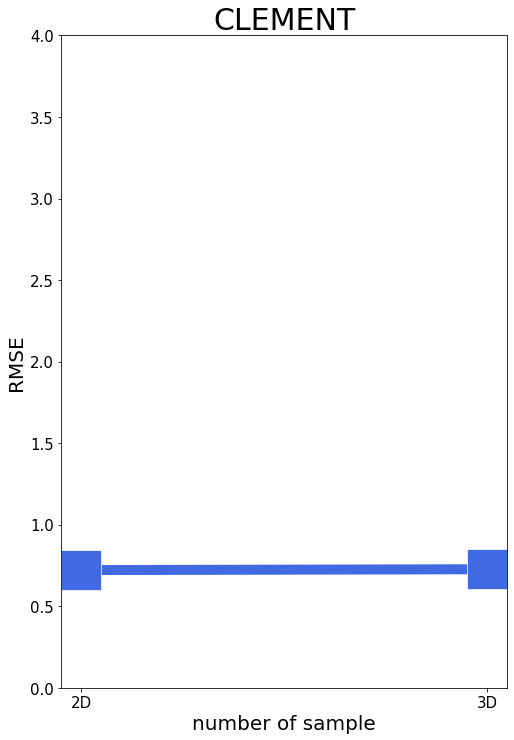

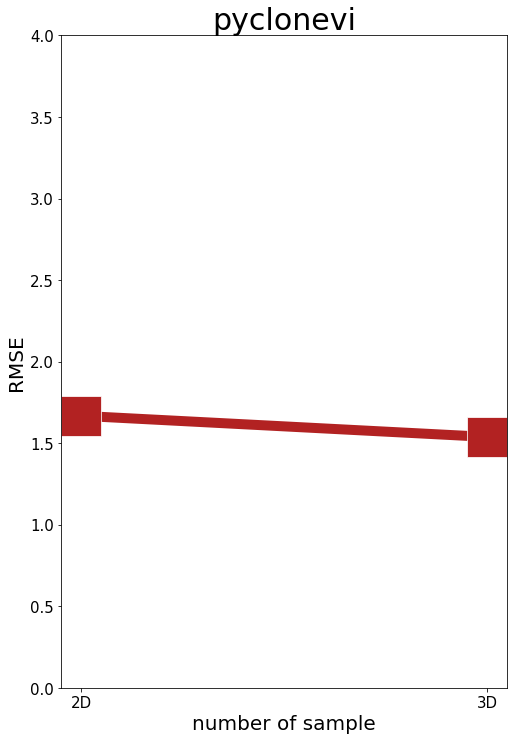

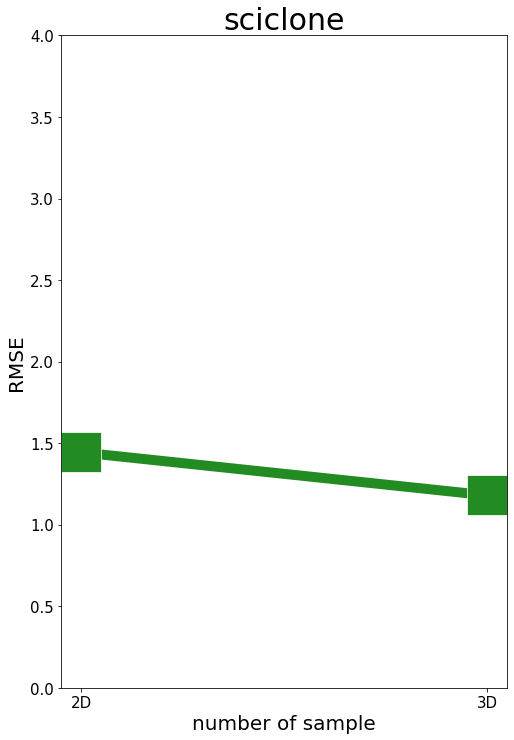

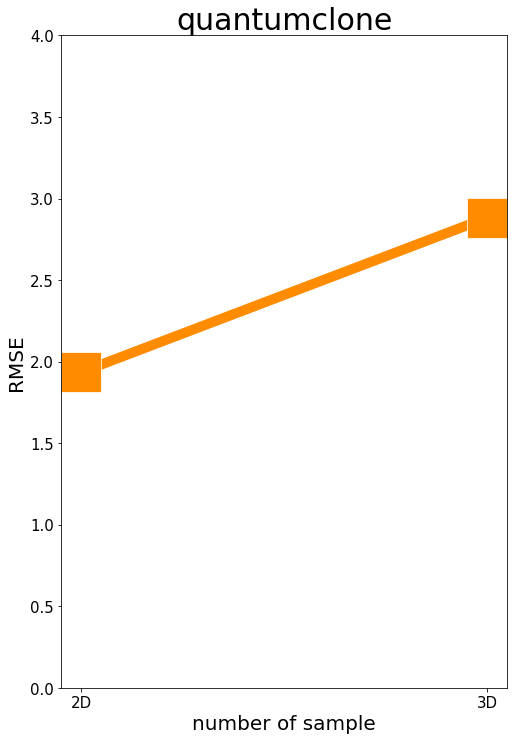

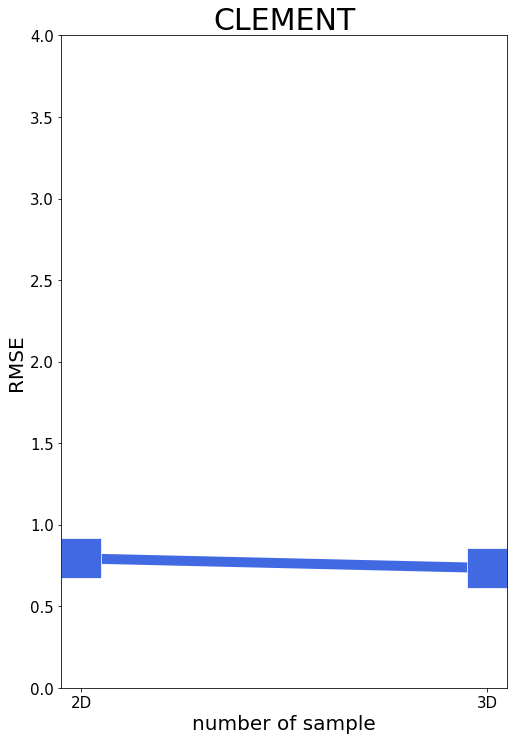

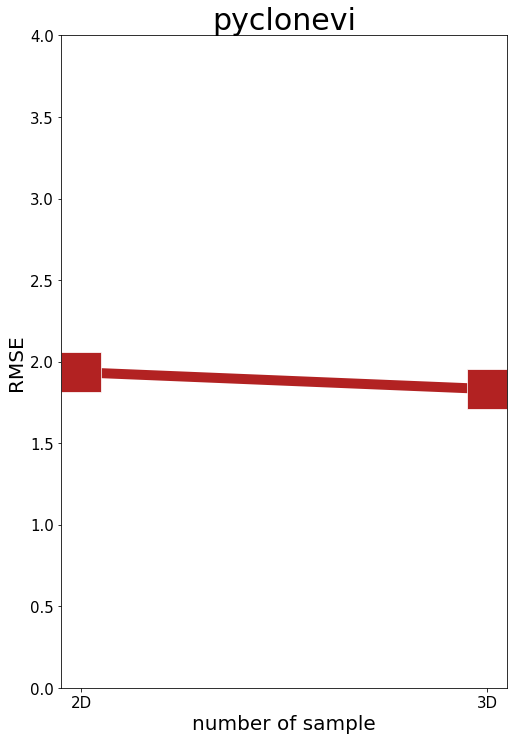

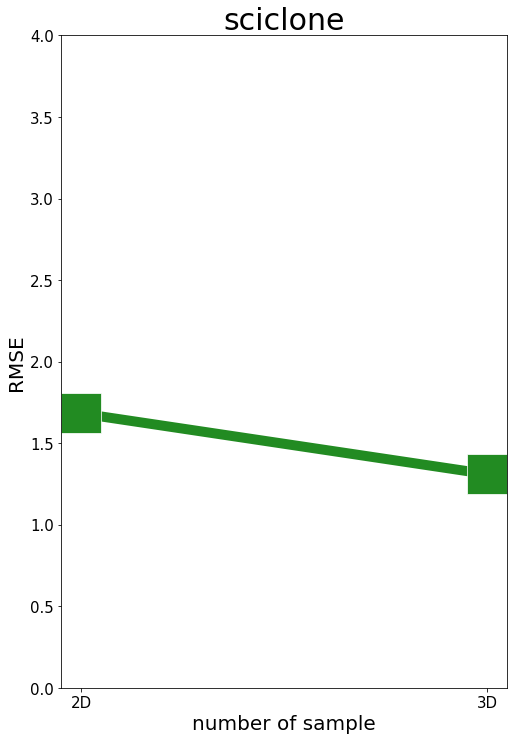

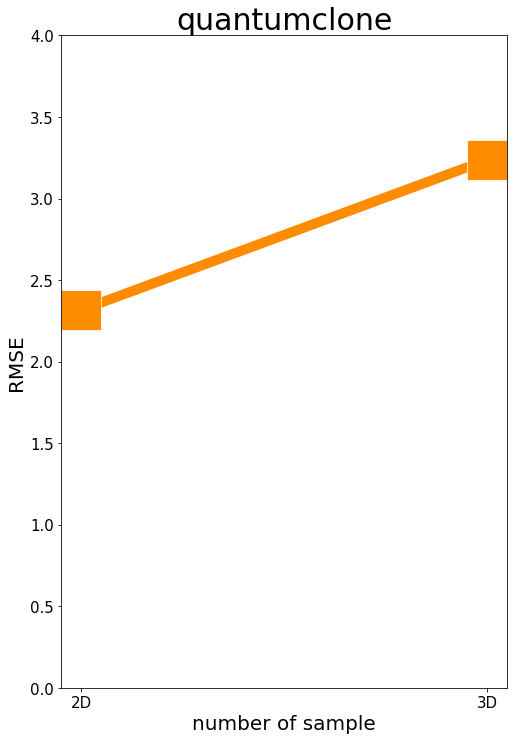

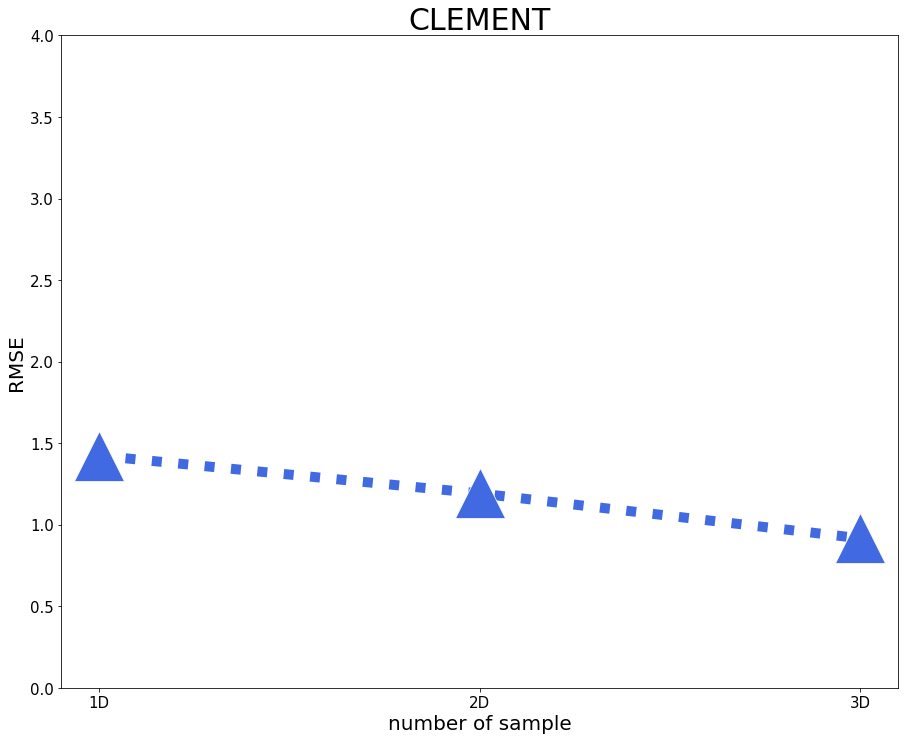

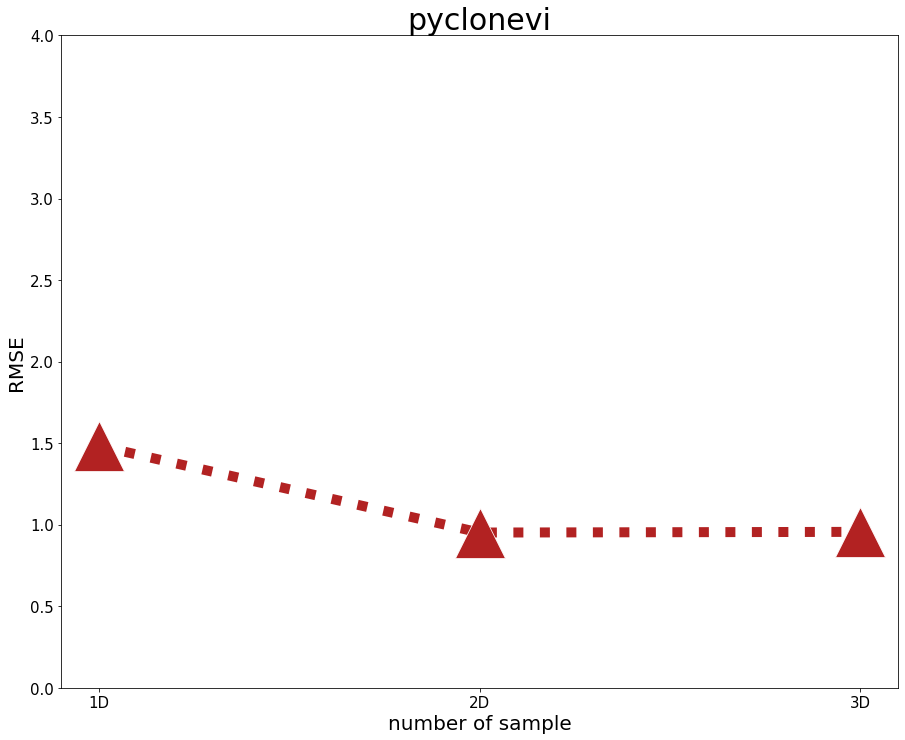

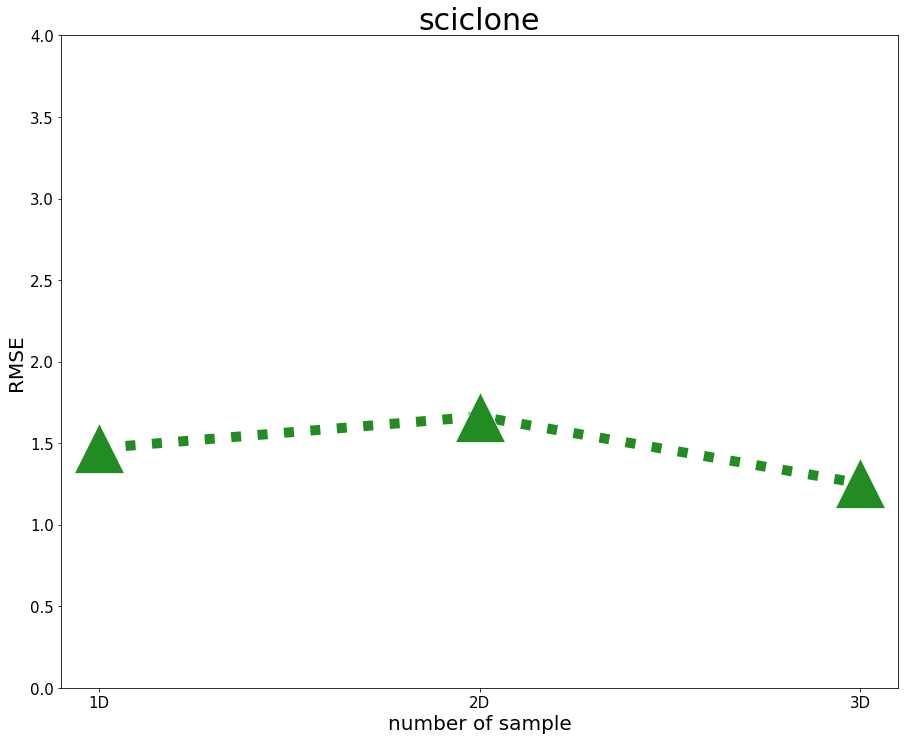

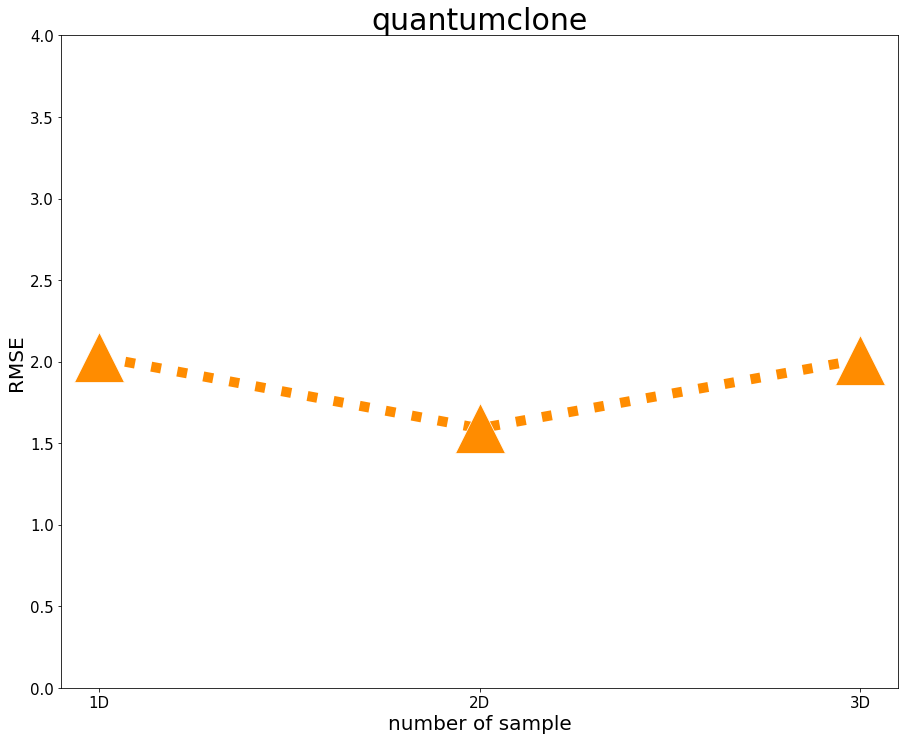

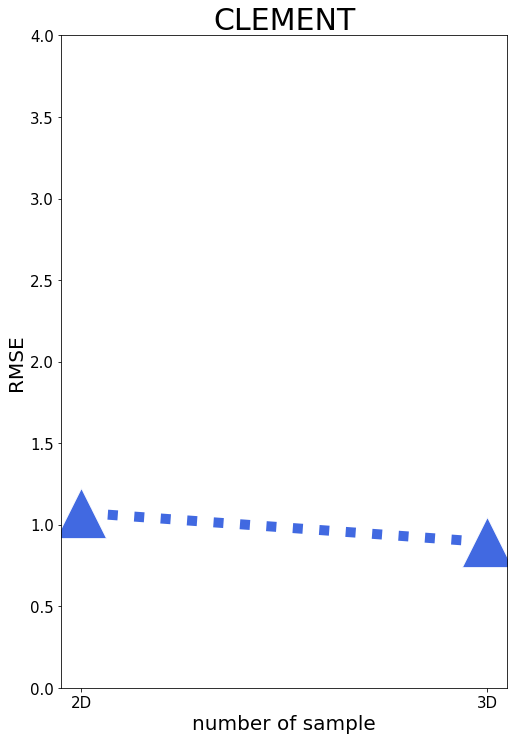

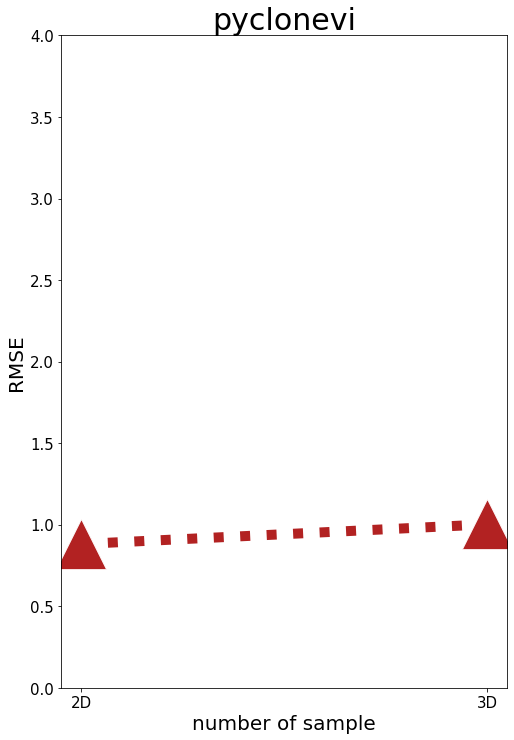

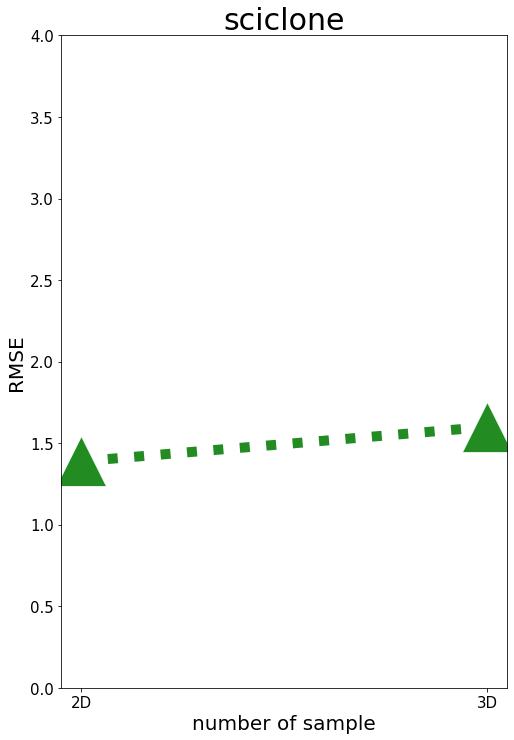

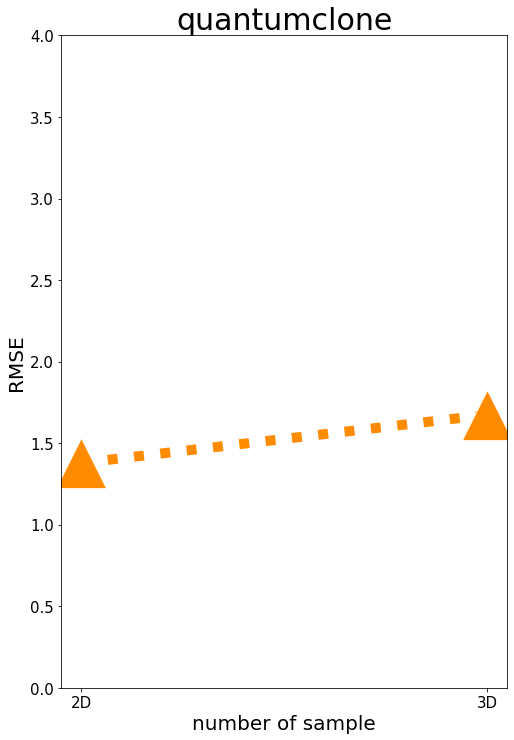

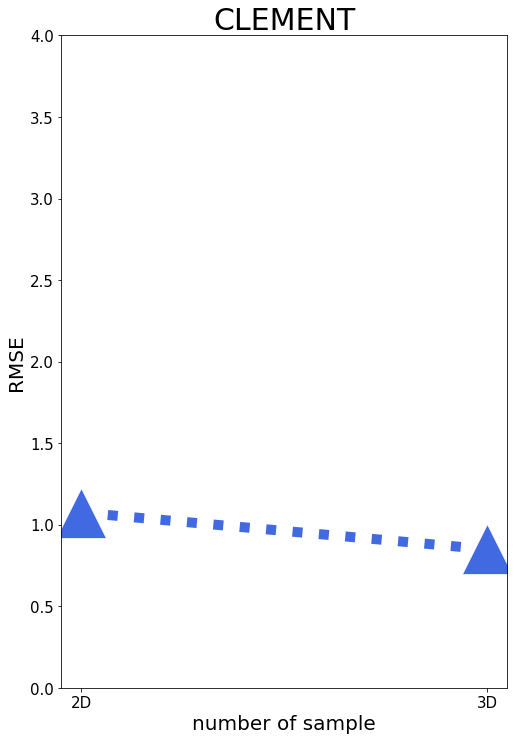

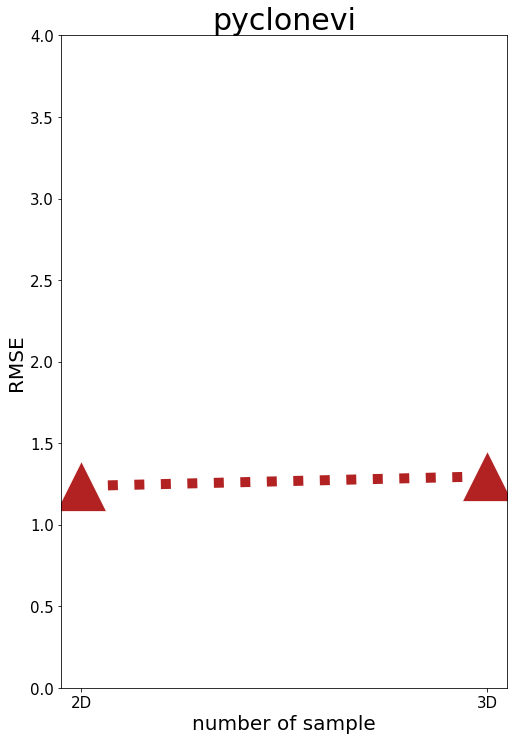

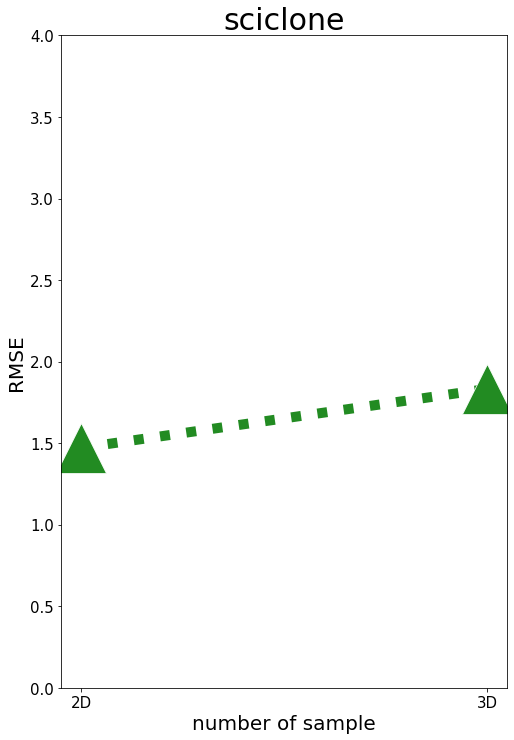

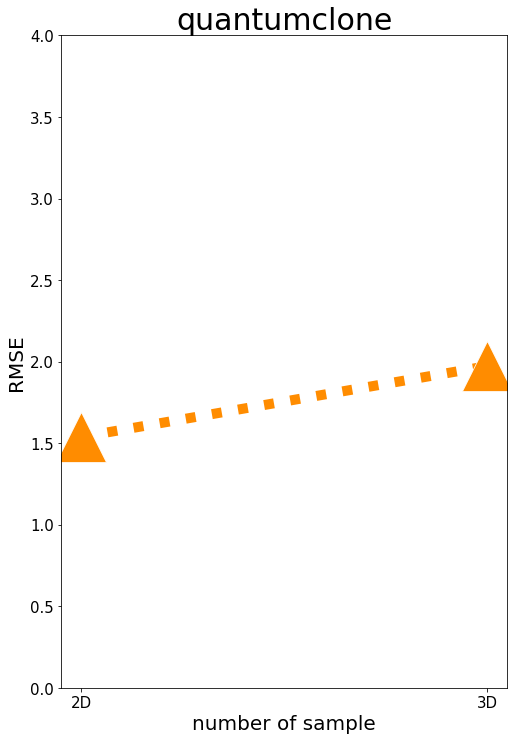

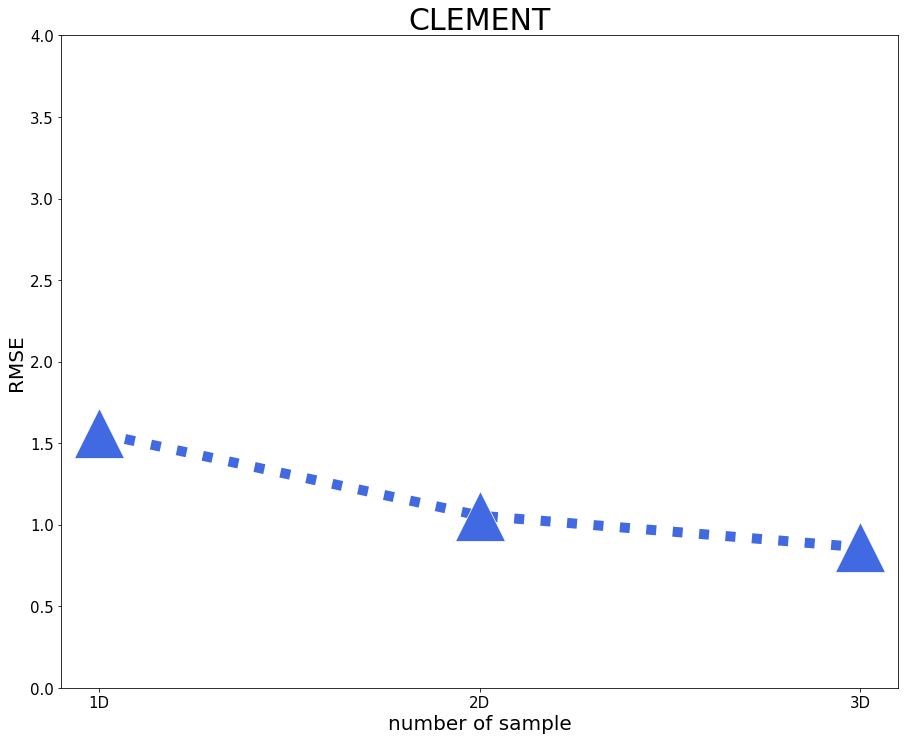

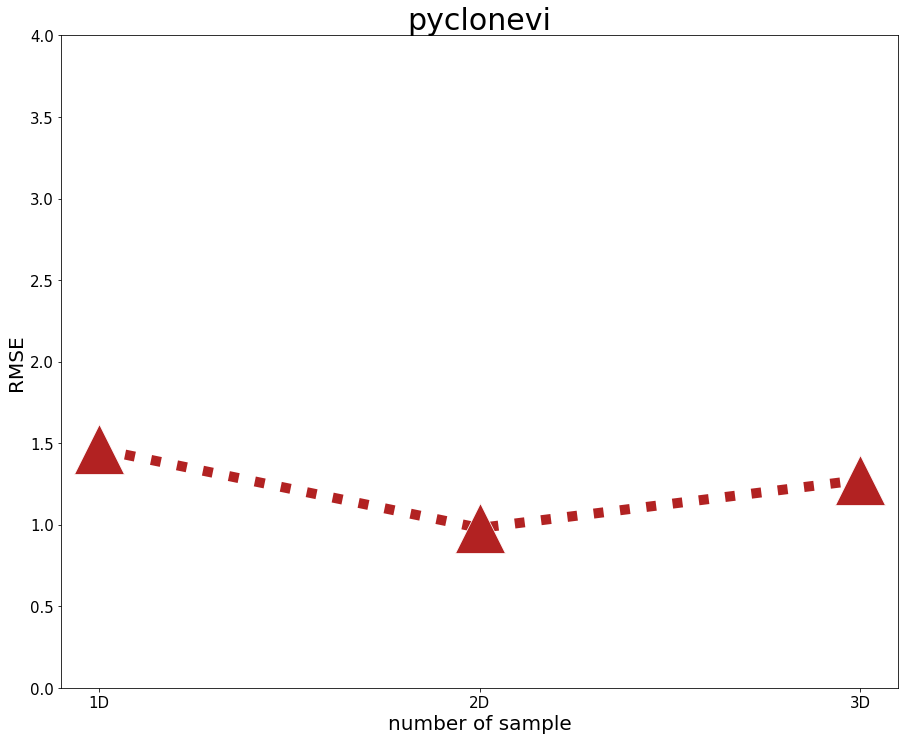

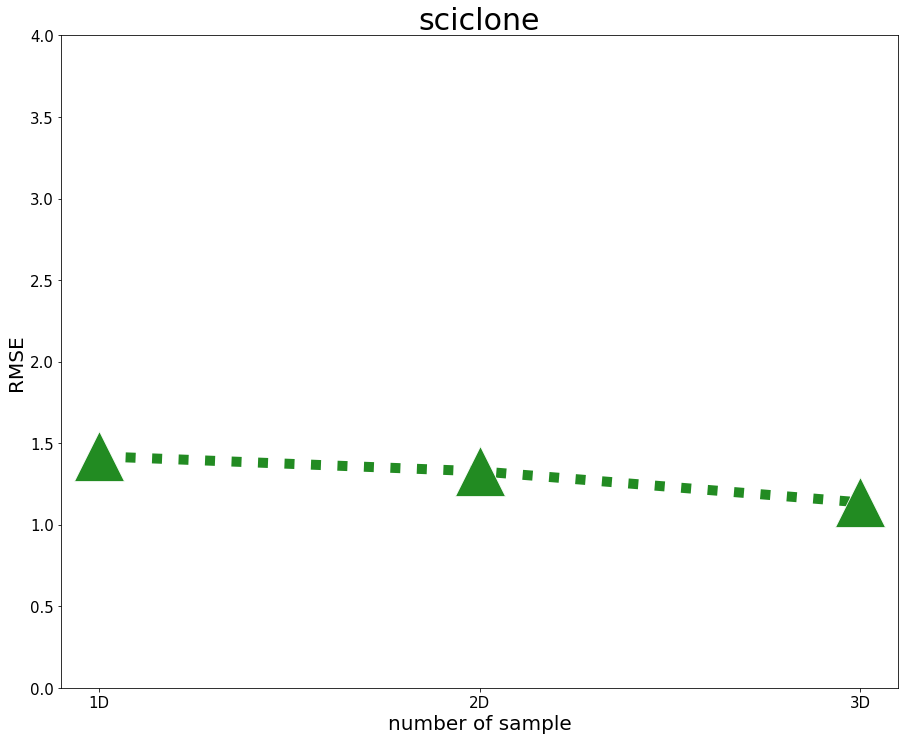

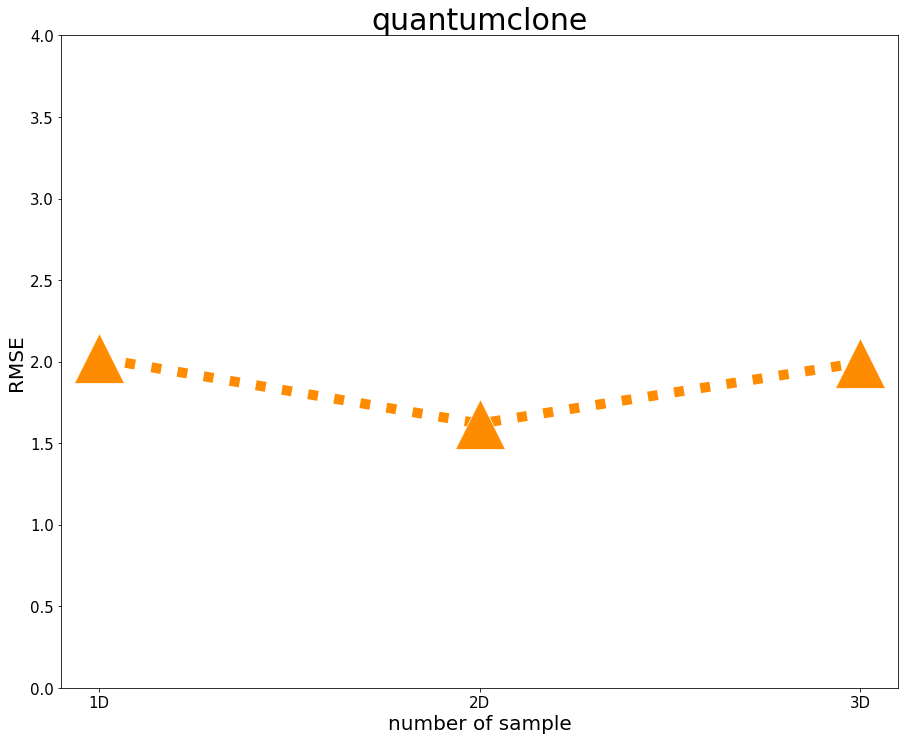

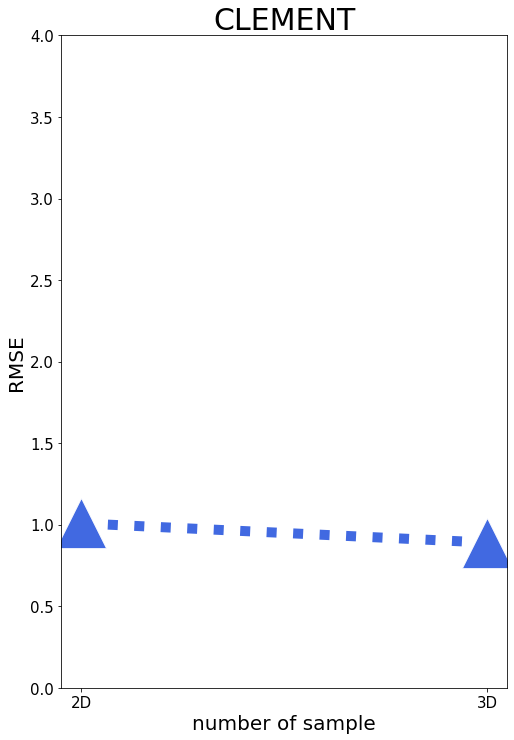

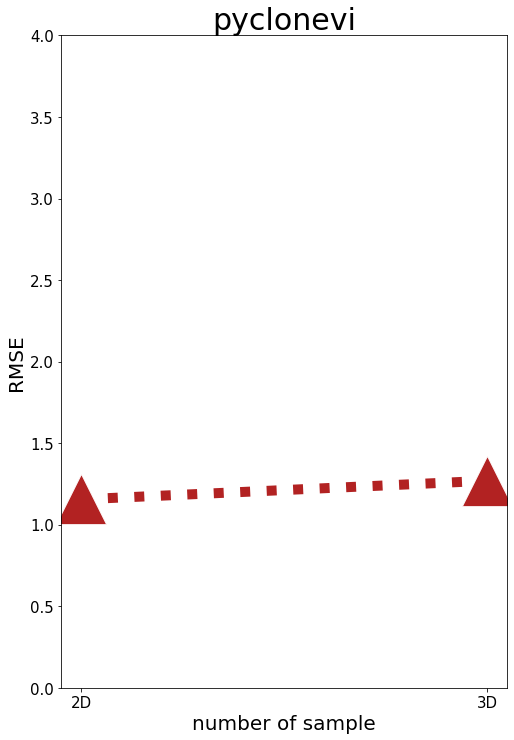

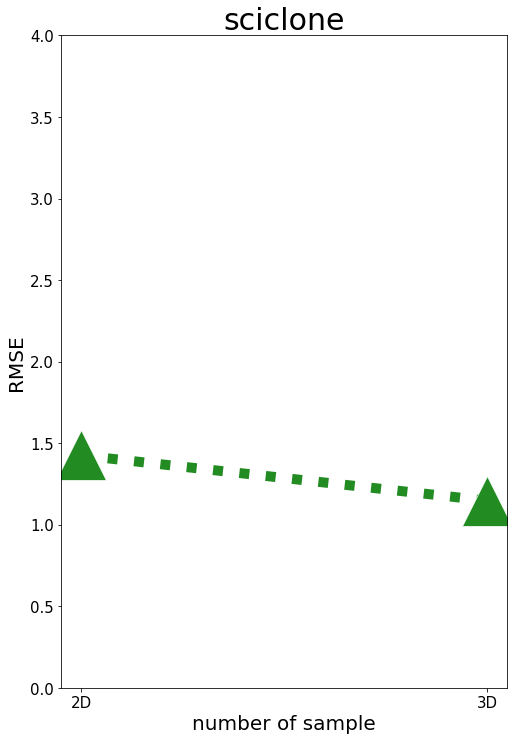

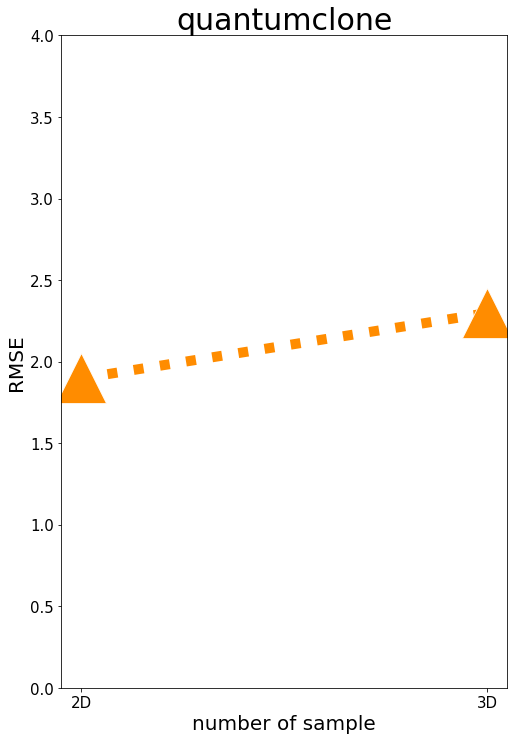

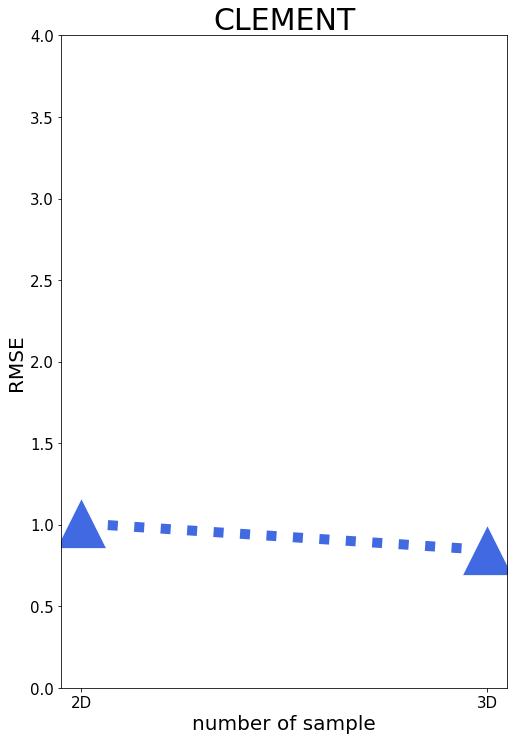

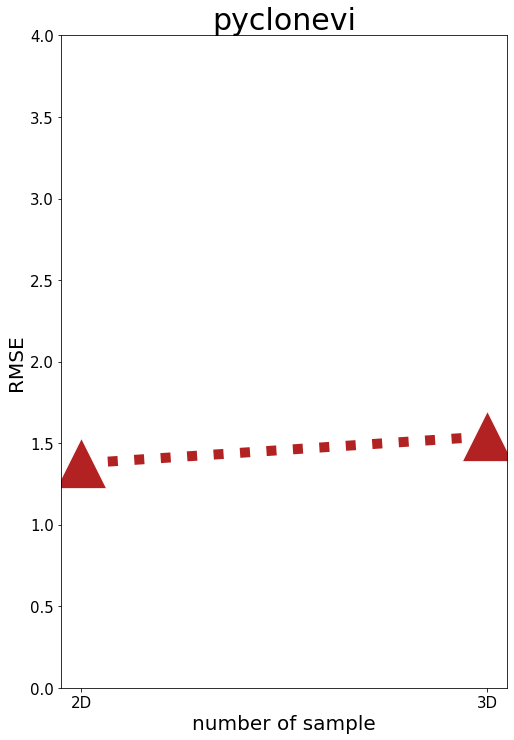

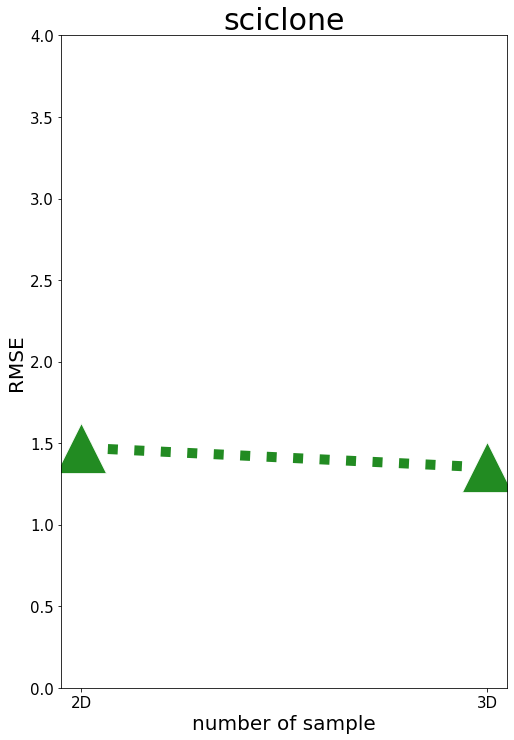

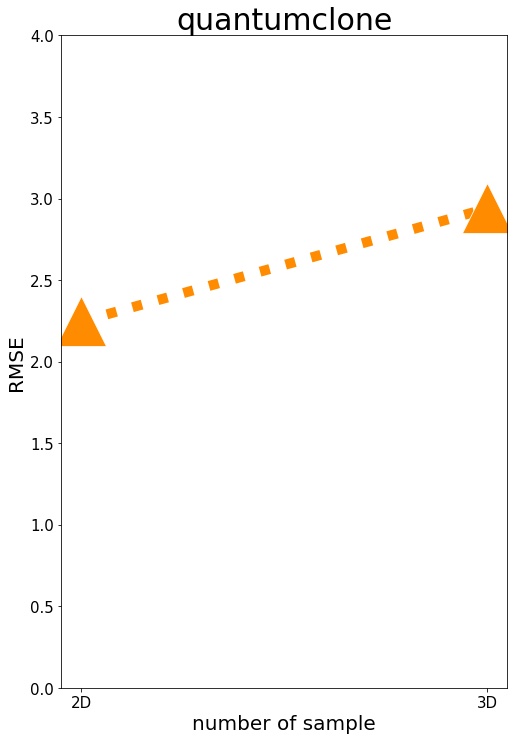

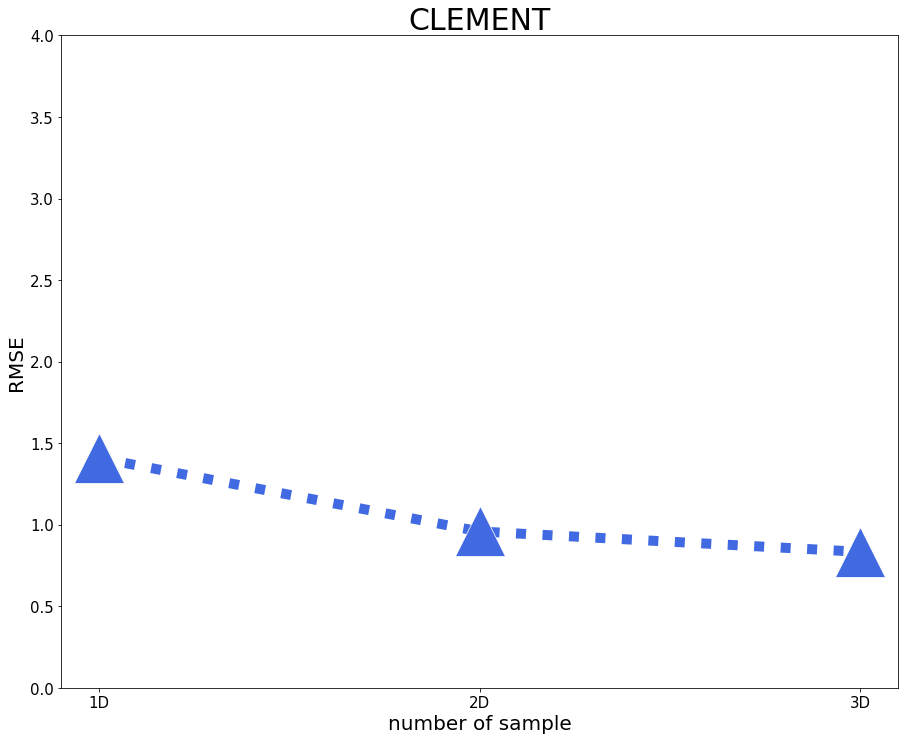

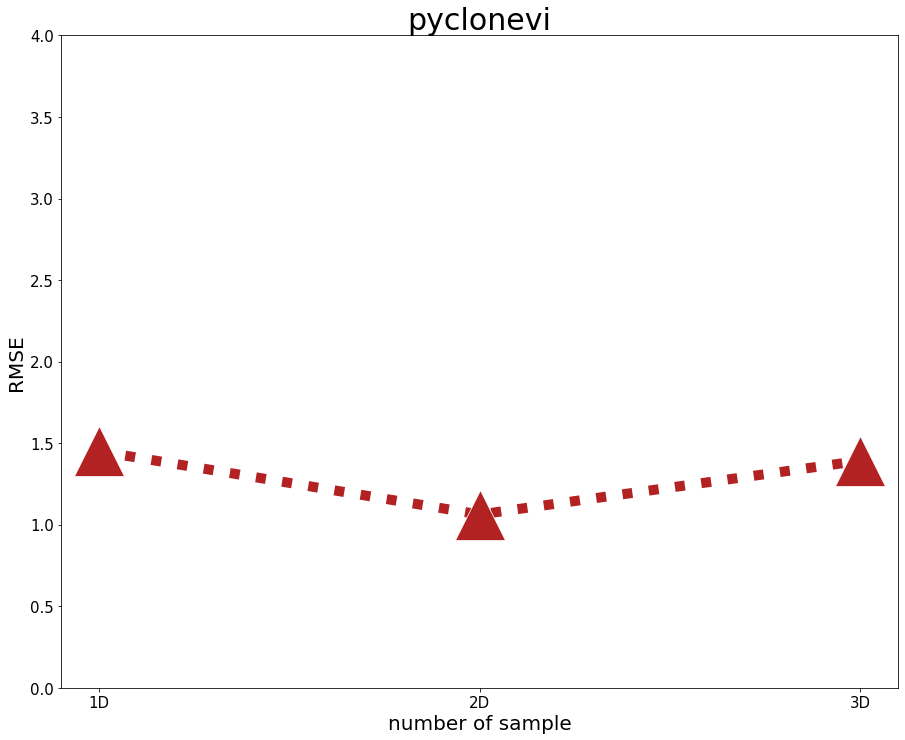

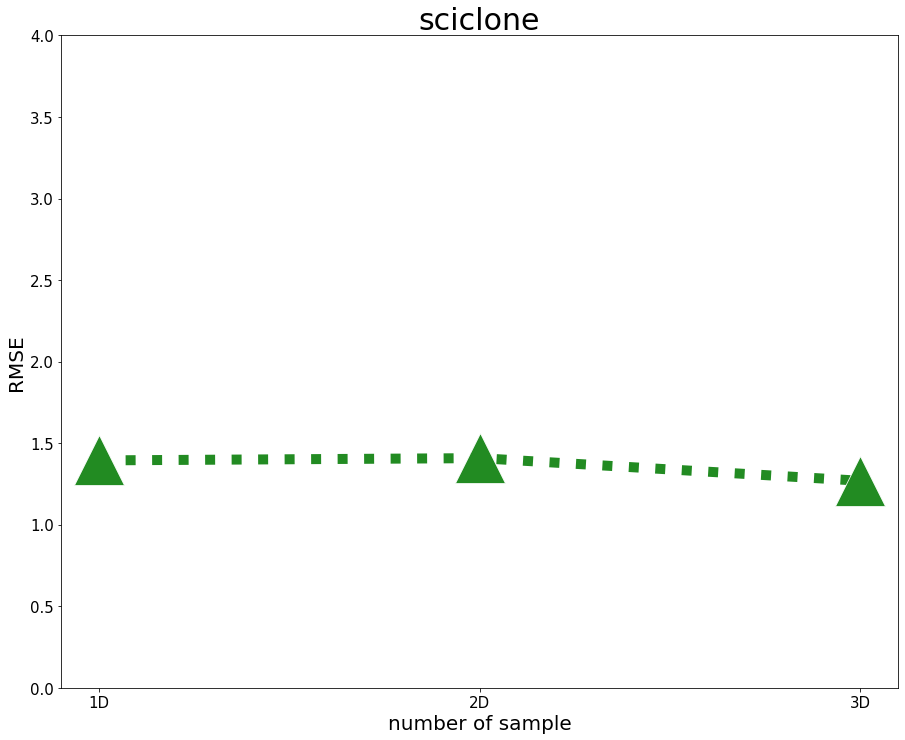

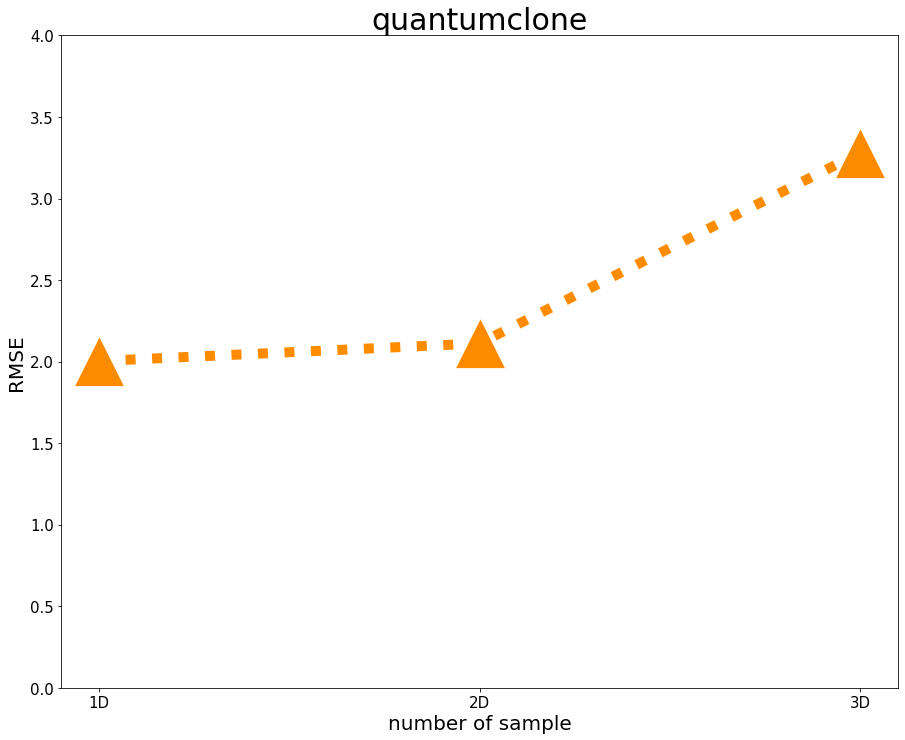

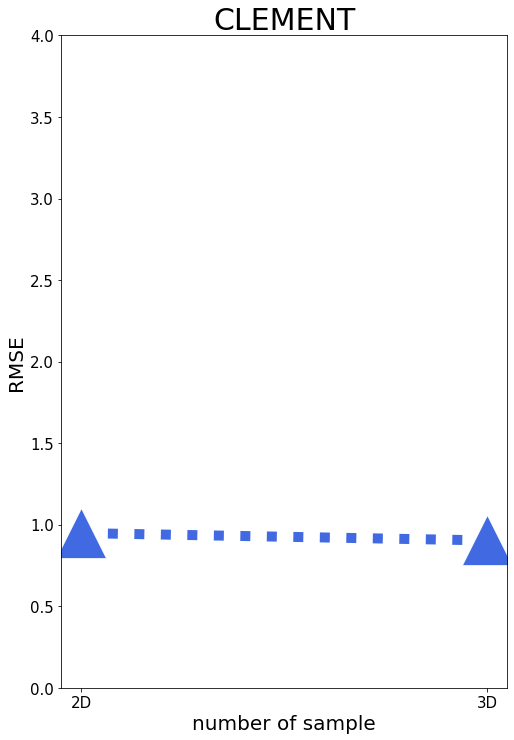

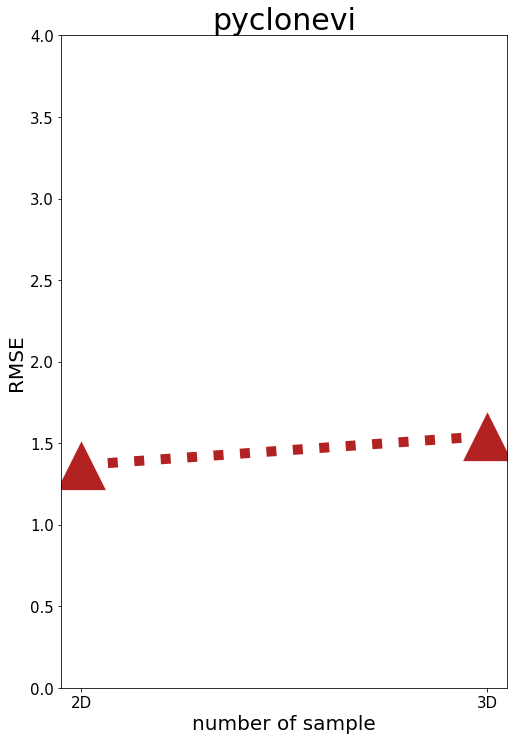

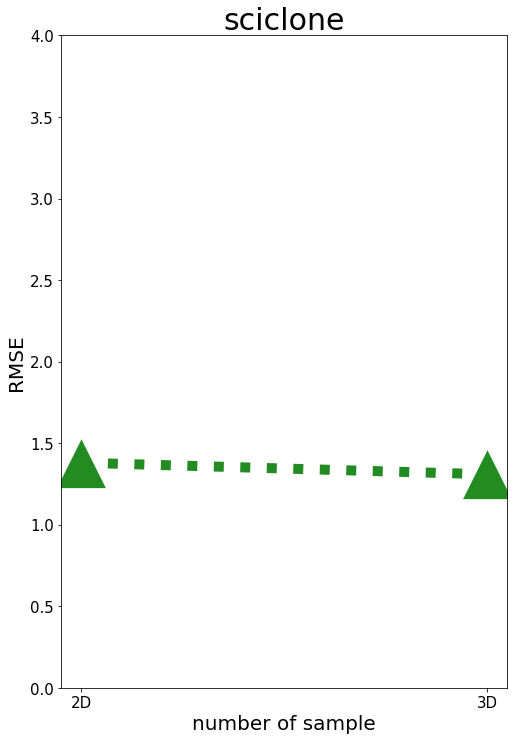

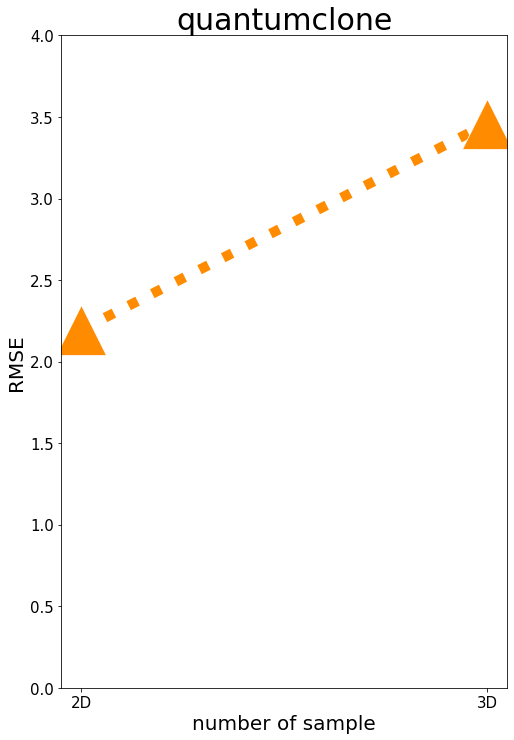

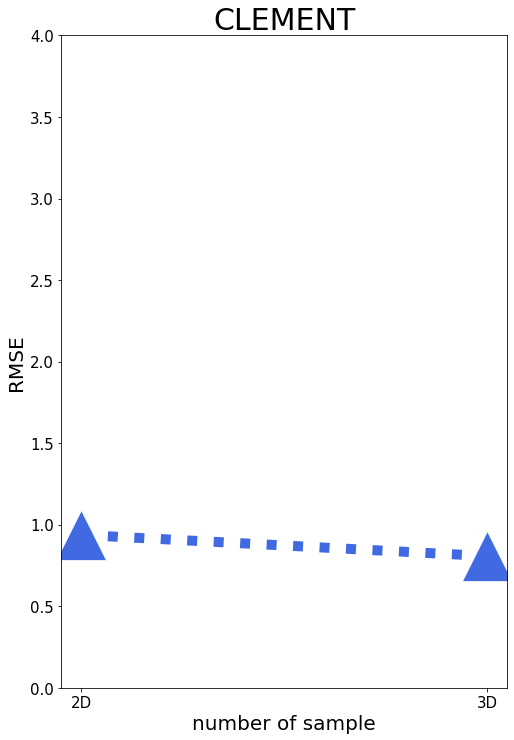

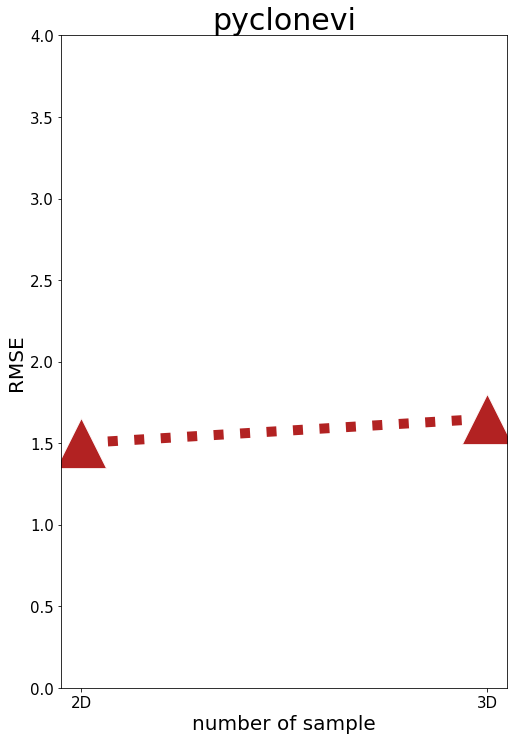

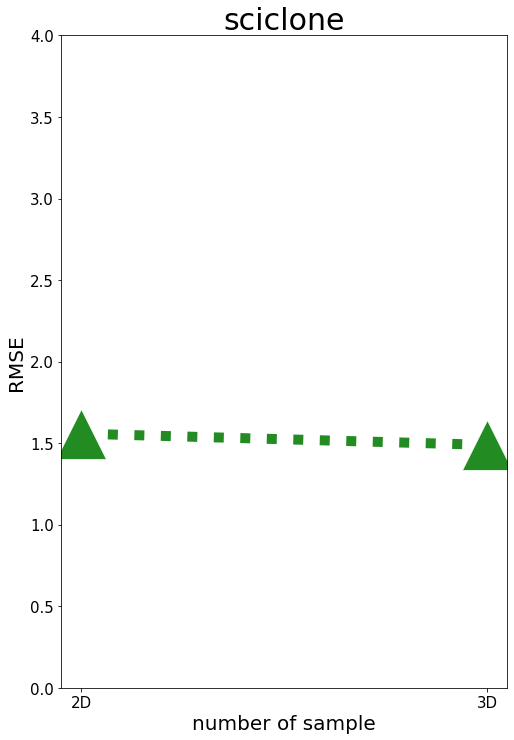

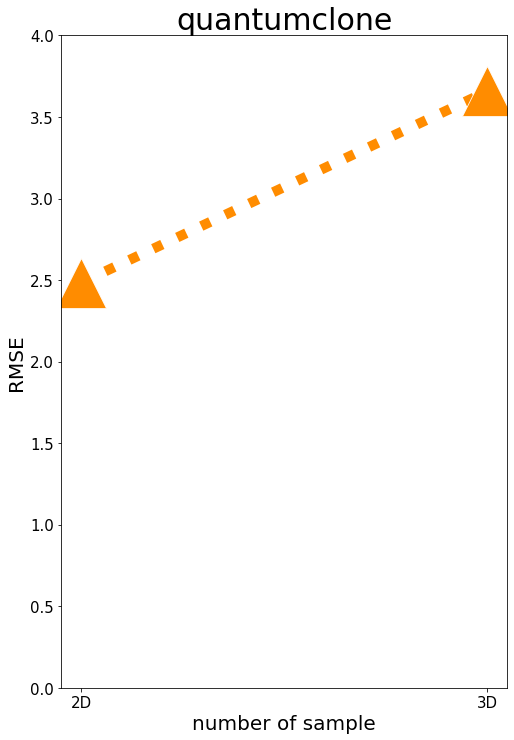

In [98]:
for clone_number in tqdm(clone_numbers):
    for FP_rate in FP_rates:
        for axis_rate in axis_rates:
            FP_axis_set = FP_rate + '_' + axis_rate + '.txt'

            input_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/01.cellData/'+clone_number
            tool_list = ['CLEMENT_decision','pyclonevi','sciclone','quantumclone']

            for tool in tool_list:
                input_file = [i for i in os.listdir(input_dir) if "EC" in i and FP_axis_set in i and 'txt' in i]
                input_file.sort()
                print(input_file)

                x_axis = []
                y_axis = []    
                for file in input_file:
                    f = open(input_dir + '/' + file, 'r')
                    for fline in f:
                        if fline.startswith('tool'):
                            continue
                        ftab = fline.rstrip().split('\t')
                        if ftab[0] == tool:
                            RMSE = float(ftab[-1])
                            sample_number = ftab[1]
                            x_axis.append(sample_number)
                            y_axis.append(RMSE)
                    f.close()
                print(tool)
                print(x_axis)
                print(y_axis)
                if axis_rate == '0.0':
                    if tool == 'CLEMENT_decision':
                        fig = plt.figure(figsize = (15,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'royalblue', linewidth = 10, linestyle = 'dotted')
                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('CLEMENT', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.CLEMENT.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'pyclonevi':
                        fig = plt.figure(figsize = (15,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'firebrick', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'firebrick', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('pyclonevi', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.pyclonevi.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'sciclone':

                        fig = plt.figure(figsize = (15,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'forestgreen', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'forestgreen', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('sciclone', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.sciclone.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'quantumclone':
                        fig = plt.figure(figsize = (15,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'darkorange', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'darkorange', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('quantumclone', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.quantumclone.'+FP_rate+'_'+axis_rate+'.pdf')        
                else:
                    if tool == 'CLEMENT_decision':
                        fig = plt.figure(figsize = (8,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'royalblue', linewidth = 10, linestyle = 'dotted')
                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('CLEMENT', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.CLEMENT.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'pyclonevi':
                        fig = plt.figure(figsize = (8,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'firebrick', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'firebrick', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('pyclonevi', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.pyclonevi.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'sciclone':

                        fig = plt.figure(figsize = (8,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'forestgreen', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'forestgreen', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('sciclone', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.sciclone.'+FP_rate+'_'+axis_rate+'.pdf')

                    elif tool == 'quantumclone':
                        fig = plt.figure(figsize = (8,12))
                        if clone_number == '0':
                            ax = sns.lineplot(x_axis, y_axis, marker = 's', markersize = 40, color = 'darkorange', linewidth = 10, linestyle = 'solid')
                        else:
                            ax = sns.lineplot(x_axis, y_axis, marker = '^', markersize = 50, color = 'darkorange', linewidth = 10, linestyle = 'dotted')

                        plt.tick_params(axis = 'x', labelsize = 15)
                        plt.tick_params(axis = 'y', labelsize = 15)
                        ax.set_xlabel('number of sample', fontsize = 20)
                        ax.set_ylabel('RMSE', fontsize = 20)
                        ax.set_title('quantumclone', fontsize=30)

                        sc = ax.set_ylim(0,4)
                        ax.figure.savefig(input_dir + '/RMSE.quantumclone.'+FP_rate+'_'+axis_rate+'.pdf')   